# **Import library**

In [ ]:
# 📌 Install
!pip install contractions --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00


In [ ]:

!pip install langchain langchain-community faiss-cpu sentence-transformers transformers deep-translator --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip -q install sentence-transformers faiss-cpu transformers accelerate pandas numpy

In [ ]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import files

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import RMSprop, Nadam, Adam
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import pickle
from tensorflow.keras.models import load_model

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import faiss
from sentence_transformers import SentenceTransformer
from transformers import pipeline
import torch


import os
import warnings as wn
wn.filterwarnings(action='ignore')

# **Upload and load dataset**

In [ ]:
# upload the data

uploaded = files.upload()

Saving claim_base_data.csv to claim_base_data.csv
Saving insurance_class_reg_data.csv to insurance_class_reg_data.csv


In [ ]:
# Create an empty dictionary to store dataframes
dataframes = {}

# Load each file into a separate DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    dataframes[file_name] = df
    print(f"Dataset '{file_name}' uploaded successfully!")

Dataset 'claim_base_data.csv' uploaded successfully!
Dataset 'insurance_class_reg_data.csv' uploaded successfully!


In [ ]:
df = dataframes["insurance_class_reg_data.csv"]

In [ ]:
df_1 = dataframes["claim_base_data.csv"]

In [ ]:
df_1= dataframes["insurance.csv"]

In [ ]:
df_2 = dataframes["extra_policies.csv"]

# **Models**

---


## **CLASSIFICATION - Risk Score classification**

### **Upload and load dataset**

In [ ]:
# upload the data

uploaded = files.upload()

Saving insurance_class_reg_data.csv to insurance_class_reg_data.csv


In [ ]:
# Create an empty dictionary to store dataframes
dataframes = {}

# Load each file into a separate DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    dataframes[file_name] = df
    print(f"Dataset '{file_name}' uploaded successfully!")

Dataset 'insurance_class_reg_data.csv' uploaded successfully!


In [ ]:
df = dataframes["insurance_class_reg_data.csv"]

### **Data Cleaning**

In [ ]:
df.head()

Customer_ID  Policy_ID  Customer_Age  Gender Policy_Type  Monthly_Income  \
0  CUST100000  POL100000            45    Male    Property        57926.04   
1  CUST100001  POL100001            52    Male        Auto        52957.88   
2  CUST100002  POL100002            27  Female        Auto        64713.71   
3  CUST100003  POL100003            33    Male        Life        50990.42   
4  CUST100004  POL100004            24  Female        Life        76379.88   

   Vehicle_or_Property_Age  Claim_History  Fraudulent_Claim  Premium_Amount  \
0                        6              0                 0         1100.36   
1                        6              0                 0         1038.41   
2                        3              2                 0         1127.81   
3                        4              1                 0         1086.71   
4                       10              0                 1         1072.40   

   Claim_Amount Risk_Score Location  Policy_Upgrade  
0        719.87        Low  Chicago               1  
1       1483.60        Low  Chicago               0  
2       2247.89        Low  Chicago               0  
3       3012.94        Low  Houston               0  
4       2710.86     Medium  Houston               0

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              10000 non-null  object 
 1   Policy_ID                10000 non-null  object 
 2   Customer_Age             10000 non-null  int64  
 3   Gender                   10000 non-null  object 
 4   Policy_Type              10000 non-null  object 
 5   Monthly_Income           10000 non-null  float64
 6   Vehicle_or_Property_Age  10000 non-null  int64  
 7   Claim_History            10000 non-null  int64  
 8   Fraudulent_Claim         10000 non-null  int64  
 9   Premium_Amount           10000 non-null  float64
 10  Claim_Amount             10000 non-null  float64
 11  Risk_Score               10000 non-null  object 
 12  Location                 10000 non-null  object 
 13  Policy_Upgrade           10000 non-null  int64  
dtypes: float64(3), int64(5)

In [ ]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['customer_id', 'policy_id', 'customer_age', 'gender', 'policy_type',
       'monthly_income', 'vehicle_or_property_age', 'claim_history',
       'fraudulent_claim', 'premium_amount', 'claim_amount', 'risk_score',
       'location', 'policy_upgrade'],
      dtype='object')

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.isnull().sum()

customer_id                0
policy_id                  0
customer_age               0
gender                     0
policy_type                0
monthly_income             0
vehicle_or_property_age    0
claim_history              0
fraudulent_claim           0
premium_amount             0
claim_amount               0
risk_score                 0
location                   0
policy_upgrade             0
dtype: int64

In [ ]:
df.describe(include="all")

customer_id  policy_id  customer_age gender policy_type  \
count        10000      10000  10000.000000  10000       10000   
unique       10000      10000           NaN      3           4   
top     CUST109983  POL109983           NaN   Male        Life   
freq             1          1           NaN   4802        2559   
mean           NaN        NaN     39.656600    NaN         NaN   
std            NaN        NaN     11.715153    NaN         NaN   
min            NaN        NaN     18.000000    NaN         NaN   
25%            NaN        NaN     31.000000    NaN         NaN   
50%            NaN        NaN     40.000000    NaN         NaN   
75%            NaN        NaN     48.000000    NaN         NaN   
max            NaN        NaN     80.000000    NaN         NaN   

        monthly_income  vehicle_or_property_age  claim_history  \
count     10000.000000             10000.000000   10000.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean      60135.977359                 4.510100       1.178800   
std       14779.314002                 2.008607       1.079327   
min        5000.000000                 0.000000       0.000000   
25%       50225.207500                 3.000000       0.000000   
50%       60212.245000                 4.000000       1.000000   
75%       70056.430000                 6.000000       2.000000   
max      124482.860000                12.000000       7.000000   

        fraudulent_claim  premium_amount  claim_amount risk_score  location  \
count         10000.0000    10000.000000  10000.000000      10000     10000   
unique               NaN             NaN           NaN          3         5   
top                  NaN             NaN           NaN        Low  New York   
freq                 NaN             NaN           NaN       6153      2048   
mean              0.2087     1137.973443   1984.201544        NaN       NaN   
std               0.4064      122.270719    855.911666        NaN       NaN   
min               0.0000      828.180000    469.420000        NaN       NaN   
25%               0.0000     1047.347500   1258.887500        NaN       NaN   
50%               0.0000     1122.950000   1945.720000        NaN       NaN   
75%               0.0000     1211.065000   2657.427500        NaN       NaN   
max               1.0000     1761.120000   4997.150000        NaN       NaN   

        policy_upgrade  
count     10000.000000  
unique             NaN  
top                NaN  
freq               NaN  
mean          0.606500  
std           0.663552  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           1.000000  
max           2.000000

In [ ]:
assert pd.notnull(df).all().all()

In [ ]:
assert pd.notnull(df.select_dtypes(include=["number"])).all().all()

In [ ]:
df.head()

customer_id  policy_id  customer_age  gender policy_type  monthly_income  \
0  CUST100000  POL100000            45    Male    Property        57926.04   
1  CUST100001  POL100001            52    Male        Auto        52957.88   
2  CUST100002  POL100002            27  Female        Auto        64713.71   
3  CUST100003  POL100003            33    Male        Life        50990.42   
4  CUST100004  POL100004            24  Female        Life        76379.88   

   vehicle_or_property_age  claim_history  fraudulent_claim  premium_amount  \
0                        6              0                 0         1100.36   
1                        6              0                 0         1038.41   
2                        3              2                 0         1127.81   
3                        4              1                 0         1086.71   
4                       10              0                 1         1072.40   

   claim_amount risk_score location  policy_upgrade  
0        719.87        Low  Chicago               1  
1       1483.60        Low  Chicago               0  
2       2247.89        Low  Chicago               0  
3       3012.94        Low  Houston               0  
4       2710.86     Medium  Houston               0

In [ ]:
df.tail()

customer_id  policy_id  customer_age  gender policy_type  monthly_income  \
9995  CUST109995  POL109995            42  Female        Auto        49669.35   
9996  CUST109996  POL109996            18  Female        Life        58772.73   
9997  CUST109997  POL109997            49    Male        Life        53191.23   
9998  CUST109998  POL109998            47    Male        Life        69057.97   
9999  CUST109999  POL109999            39    Male    Property        69660.63   

      vehicle_or_property_age  claim_history  fraudulent_claim  \
9995                        1              1                 0   
9996                        4              3                 0   
9997                        3              1                 1   
9998                        3              1                 0   
9999                        4              1                 0   

      premium_amount  claim_amount risk_score     location  policy_upgrade  
9995         1217.81       3303.48     Medium     New York               1  
9996         1318.93        931.90        Low       Dallas               2  
9997         1239.70       1613.55     Medium  Los Angeles               0  
9998         1180.61       1443.52        Low  Los Angeles               0  
9999         1124.93       2587.94     Medium     New York               2

In [ ]:
df.shape

(10000, 14)

### **Data preprocessing**

In [ ]:
df.drop(columns=['customer_id', 'policy_id'], inplace=True)
df.head()

customer_age  gender policy_type  monthly_income  vehicle_or_property_age  \
0            45    Male    Property        57926.04                        6   
1            52    Male        Auto        52957.88                        6   
2            27  Female        Auto        64713.71                        3   
3            33    Male        Life        50990.42                        4   
4            24  Female        Life        76379.88                       10   

   claim_history  fraudulent_claim  premium_amount  claim_amount risk_score  \
0              0                 0         1100.36        719.87        Low   
1              0                 0         1038.41       1483.60        Low   
2              2                 0         1127.81       2247.89        Low   
3              1                 0         1086.71       3012.94        Low   
4              0                 1         1072.40       2710.86     Medium   

  location  policy_upgrade  
0  Chicago               1  
1  Chicago               0  
2  Chicago               0  
3  Houston               0  
4  Houston               0

In [ ]:
df.shape

(10000, 12)

In [ ]:
df['vehicle_or_property_age'].value_counts()

vehicle_or_property_age
4     1956
5     1907
3     1511
6     1461
7      886
2      885
1      469
8      452
0      216
9      198
10      46
11      12
12       1
Name: count, dtype: int64

In [ ]:
df[(df['vehicle_or_property_age']==12) | (df['vehicle_or_property_age']==11)]

customer_age  gender policy_type  monthly_income  \
552             41    Male        Auto        54971.89   
553             18  Female    Property        70671.16   
644             36    Male        Auto        58407.09   
1914            28    Male      Health        55945.62   
2950            26    Male    Property        55301.08   
3637            51  Female        Life        63705.96   
4307            18    Male    Property        55775.99   
5520            36  Female        Auto        62429.88   
6490            42    Male      Health        72829.01   
6810            26    Male        Auto        53427.83   
7317            20  Female    Property        68944.52   
7682            35  Female    Property        44023.40   
7779            44  Female        Life        68366.55   

      vehicle_or_property_age  claim_history  fraudulent_claim  \
552                        11              1                 0   
553                        11              0                 0   
644                        11              0                 0   
1914                       11              0                 1   
2950                       11              2                 1   
3637                       11              0                 0   
4307                       11              2                 0   
5520                       11              1                 1   
6490                       11              0                 1   
6810                       11              2                 0   
7317                       11              1                 0   
7682                       12              0                 1   
7779                       11              0                 0   

      premium_amount  claim_amount risk_score     location  policy_upgrade  
552          1155.60       3178.65     Medium     New York               0  
553           987.62       1594.35        Low      Houston               0  
644          1004.86       3033.10     Medium       Dallas               0  
1914          934.43        942.52     Medium      Houston               1  
2950         1197.14       1649.64     Medium       Dallas               0  
3637          975.46       1627.55        Low  Los Angeles               1  
4307         1267.58       2932.26     Medium  Los Angeles               2  
5520         1135.73       2475.00     Medium      Chicago               0  
6490          966.95       1032.16     Medium      Houston               1  
6810         1238.36       2502.54     Medium  Los Angeles               1  
7317         1083.76       2072.52        Low       Dallas               1  
7682          930.56       2419.51     Medium     New York               1  
7779         1129.52        706.52        Low      Houston               0

In [ ]:
df['claim_history'].value_counts()

claim_history
1    3681
0    3040
2    2134
3     824
4     249
5      64
6       5
7       3
Name: count, dtype: int64

In [ ]:
df[(df['claim_history']==7) | (df['claim_history']==6)]

customer_age  gender policy_type  monthly_income  \
1125            46  Female        Auto        81821.24   
1201            29    Male        Auto        67221.65   
3917            41  Female        Auto        70738.69   
5340            48  Female        Life        47936.40   
6550            34    Male      Health        63419.22   
8331            18  Female        Auto        57144.70   
8442            53  Female        Auto        73170.60   
9462            18    Male    Property        76440.94   

      vehicle_or_property_age  claim_history  fraudulent_claim  \
1125                        8              6                 1   
1201                        5              6                 1   
3917                        4              7                 0   
5340                        4              7                 0   
6550                        6              7                 0   
8331                        3              6                 0   
8442                        3              6                 1   
9462                        5              6                 1   

      premium_amount  claim_amount risk_score     location  policy_upgrade  
1125         1424.74       2895.48       High  Los Angeles               0  
1201         1729.68       1405.94       High      Houston               0  
3917         1761.12       3290.87       High      Houston               0  
5340         1620.40       2911.72     Medium     New York               1  
6550         1602.35       2175.97        Low       Dallas               0  
8331         1516.51       1148.57     Medium  Los Angeles               0  
8442         1640.02       4997.15       High      Houston               1  
9462         1593.41       2870.89       High       Dallas               1

In [ ]:
df["policy_type"].value_counts()

policy_type
Life        2559
Auto        2500
Health      2490
Property    2451
Name: count, dtype: int64

In [ ]:
# Target - 1
df["risk_score"].value_counts()

risk_score
Low       6153
Medium    3203
High       644
Name: count, dtype: int64

In [ ]:
# Target - 2
df['fraudulent_claim'].value_counts()  # 0 - NO, 1 - Yes

fraudulent_claim
0    7913
1    2087
Name: count, dtype: int64

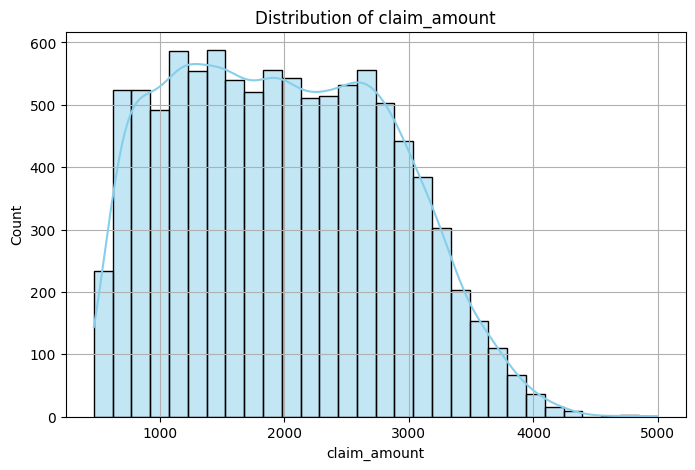

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["claim_amount"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of claim_amount")
plt.xlabel("claim_amount")
plt.ylabel('Count')
plt.grid(True)
plt.show()

The distribution is right-skewed (positively skewed) — there are many lower/mid-range claims and few high claim amounts.

Data is dense between 800 and 3000. It resembles a log-normal distribution.

### **EDA**

#### **Univariate analysis**


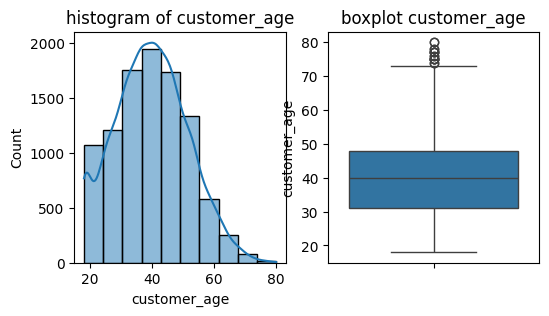

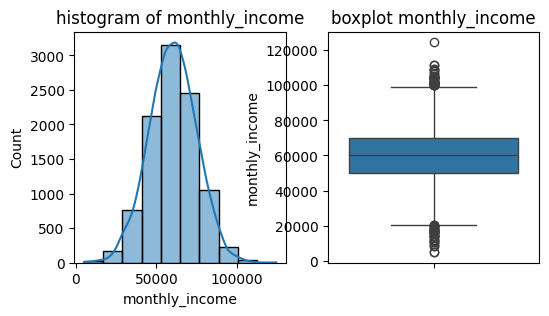

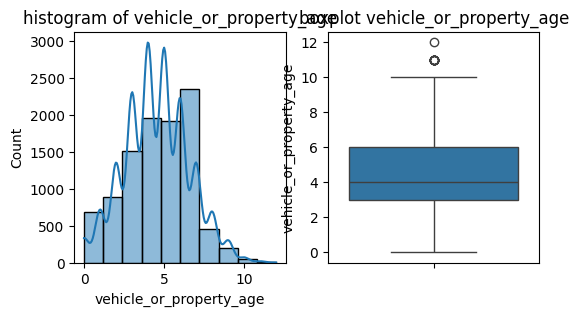

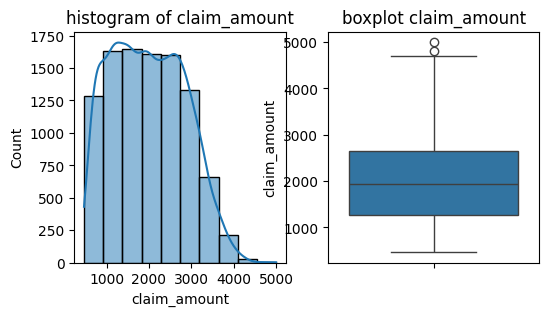

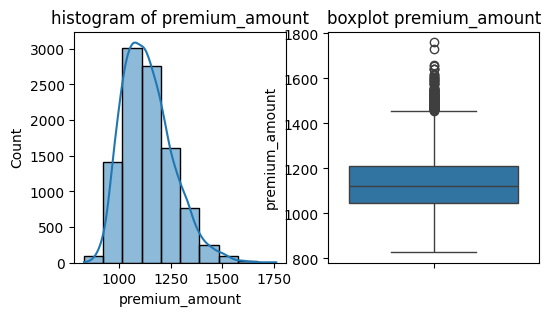

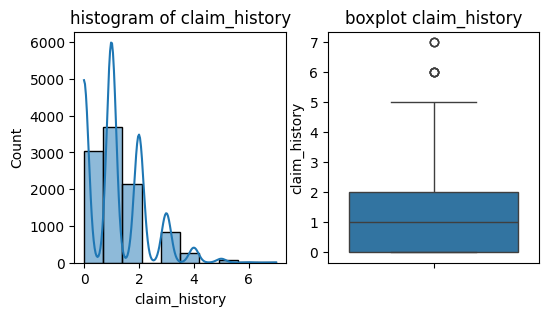

In [ ]:
num_cols = ['customer_age', 'monthly_income', 'vehicle_or_property_age', 'claim_amount', 'premium_amount', 'claim_history']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"histogram of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(y=df[col])
    plt.title(f"boxplot {col}")
    plt.show()

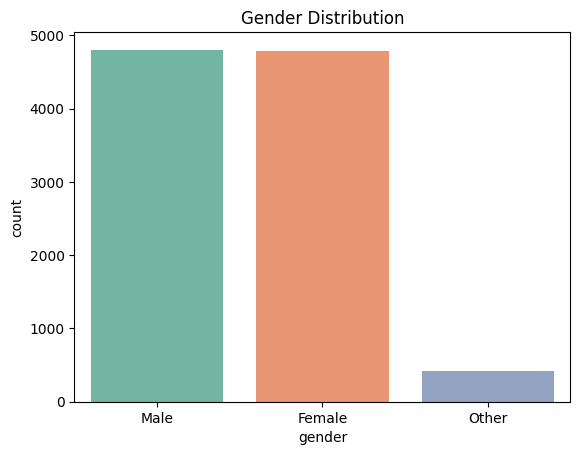

In [ ]:
# Gender Distribution
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

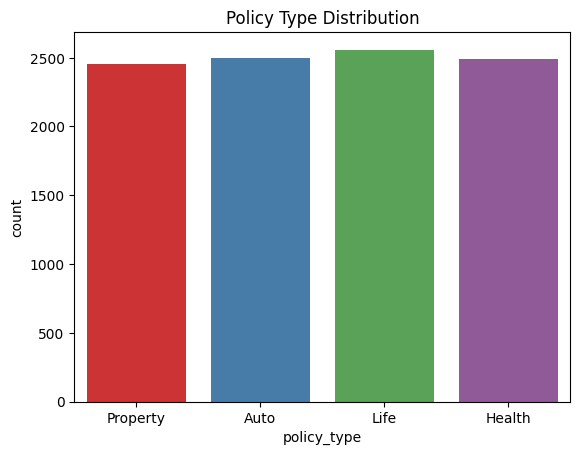

In [ ]:
# Policy Type Distribution
sns.countplot(data=df, x='policy_type', palette='Set1')
plt.title("Policy Type Distribution")
plt.show()

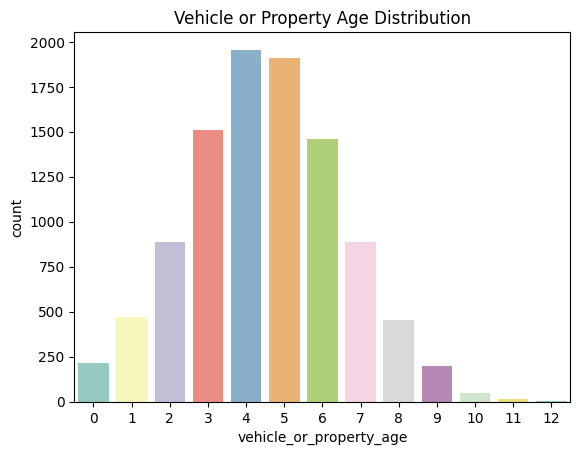

In [ ]:
# Vehicle or Property Age Distribution
sns.countplot(data=df, x='vehicle_or_property_age', palette='Set3')
plt.title("Vehicle or Property Age Distribution")
plt.show()

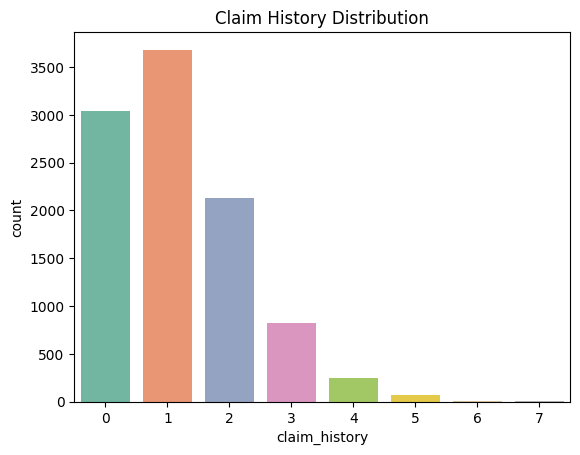

In [ ]:
# Claim History Distribution
sns.countplot(data=df, x='claim_history', palette='Set2')
plt.title("Claim History Distribution")
plt.show()

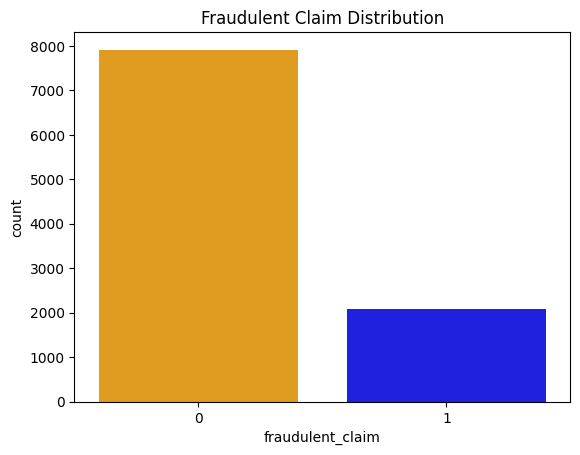

In [ ]:
# Fraudulent Claim Distribution

custom_palette = ['orange', 'blue']
sns.countplot(data=df, x='fraudulent_claim', palette=custom_palette)
plt.title("Fraudulent Claim Distribution")
plt.show()

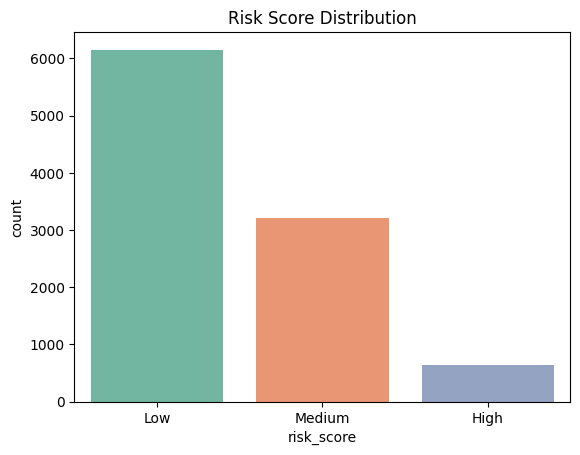

In [ ]:
# Risk Score Distribution
sns.countplot(data=df, x='risk_score', palette='Set2')
plt.title("Risk Score Distribution")
plt.show()

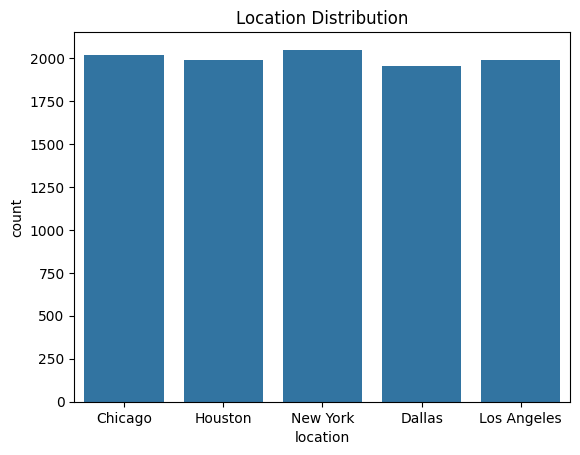

In [ ]:
# Location Distribution
sns.countplot(data=df, x='location')
plt.title("Location Distribution")
plt.show()

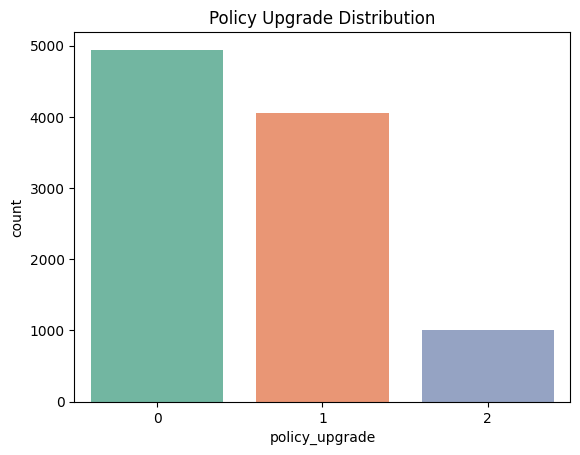

In [ ]:
# Policy Upgrade Distribution
sns.countplot(data=df, x='policy_upgrade', palette='Set2')
plt.title("Policy Upgrade Distribution")
plt.show()

#### **Bivariate analysis**

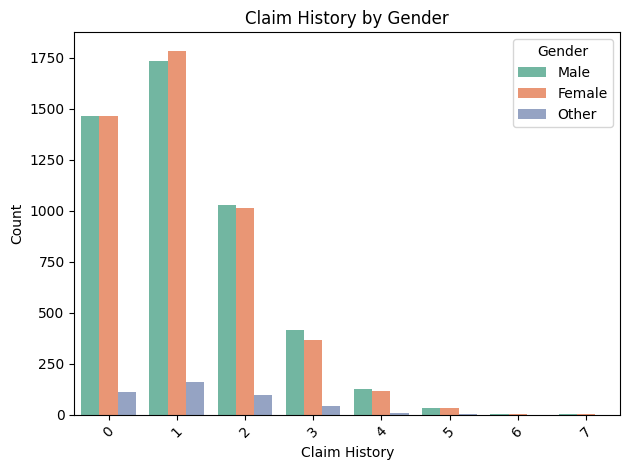

In [ ]:
sns.countplot(data=df, x='claim_history', hue='gender', palette='Set2')
plt.title("Claim History by Gender")
plt.xlabel("Claim History")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

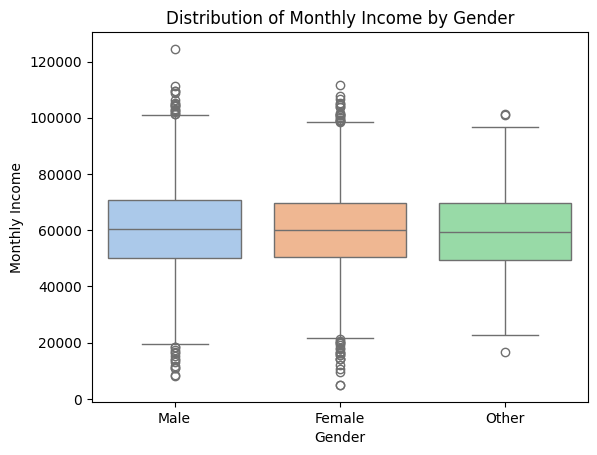

In [ ]:
sns.boxplot(x='gender', y='monthly_income', data=df, palette='pastel')
plt.title("Distribution of Monthly Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Monthly Income")
plt.show()

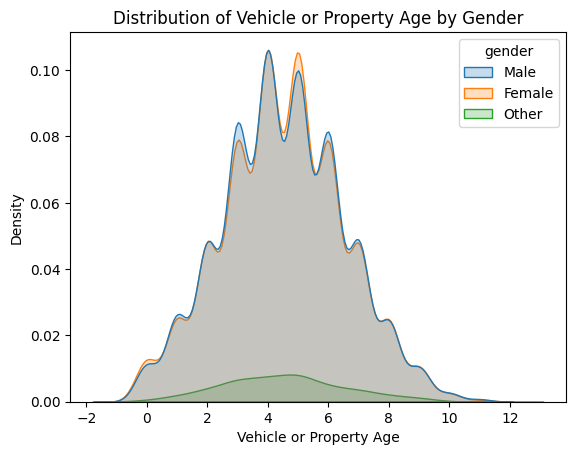

In [ ]:
sns.kdeplot(data=df, x='vehicle_or_property_age', hue='gender', fill=True)
plt.title("Distribution of Vehicle or Property Age by Gender")
plt.xlabel("Vehicle or Property Age")
plt.show()

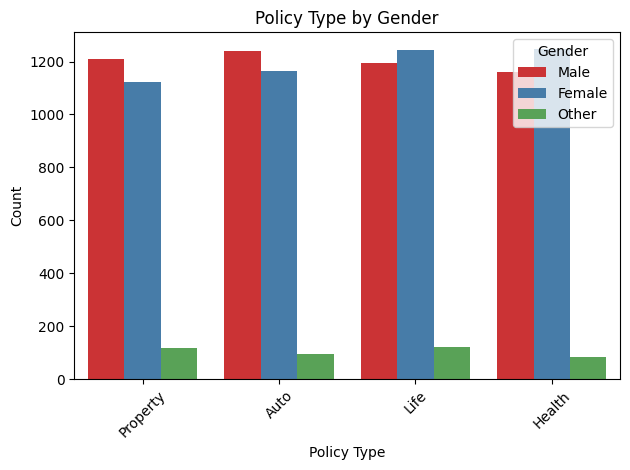

In [ ]:
sns.countplot(data=df, x='policy_type', hue='gender', palette='Set1')
plt.title("Policy Type by Gender")
plt.xlabel("Policy Type")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

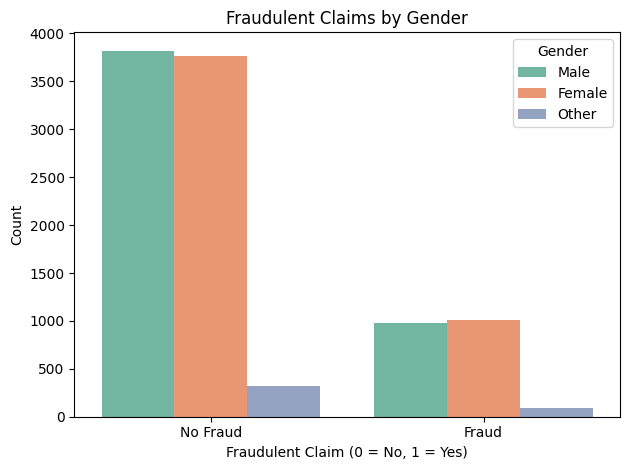

In [ ]:
sns.countplot(data=df, x='fraudulent_claim', hue='gender', palette='Set2')
plt.title("Fraudulent Claims by Gender")
plt.xlabel("Fraudulent Claim (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

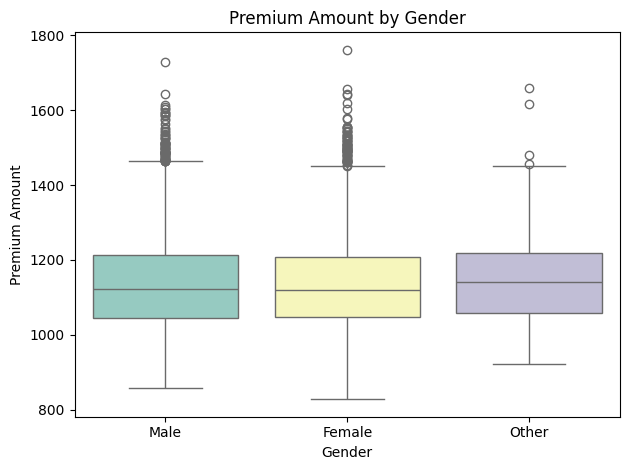

In [ ]:
sns.boxplot(data=df, x='gender', y='premium_amount', palette='Set3')
plt.title("Premium Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Premium Amount")
plt.tight_layout()
plt.show()

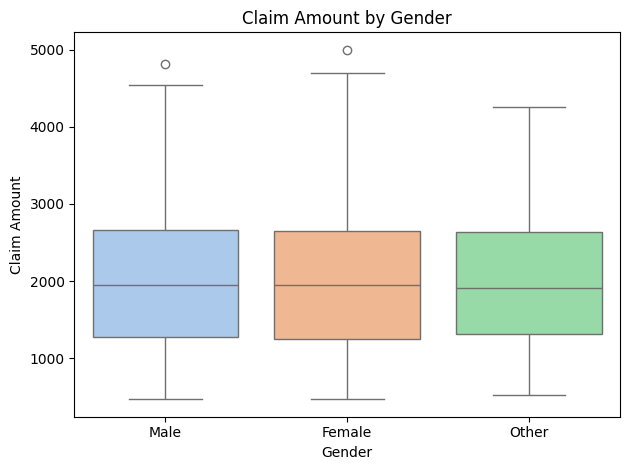

In [ ]:
sns.boxplot(data=df, x='gender', y='claim_amount', palette='pastel')
plt.title("Claim Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Claim Amount")
plt.tight_layout()
plt.show()

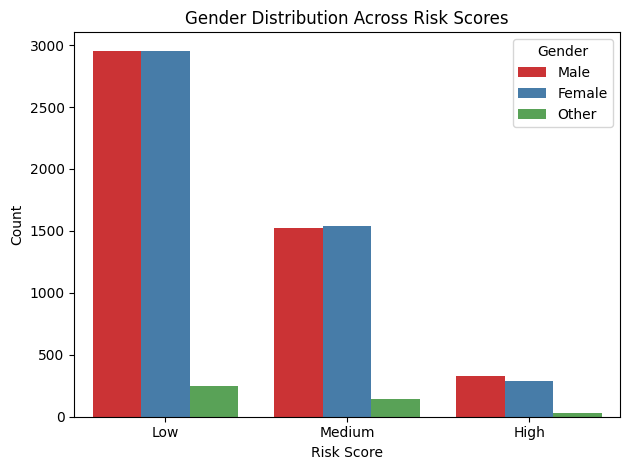

In [ ]:
sns.countplot(data=df, x='risk_score', hue='gender', palette='Set1')
plt.title("Gender Distribution Across Risk Scores")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

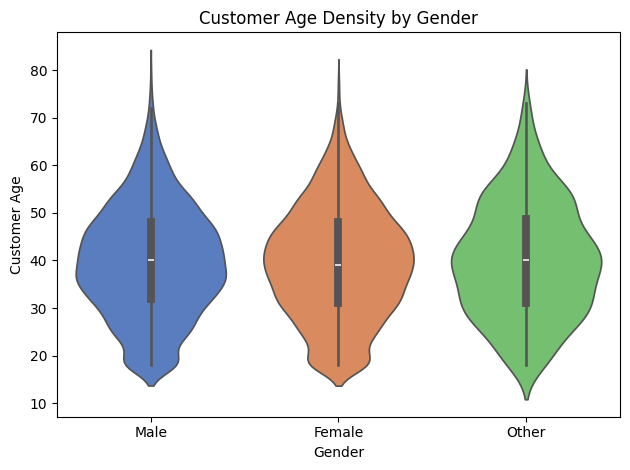

In [ ]:
sns.violinplot(data=df, x='gender', y='customer_age', palette='muted')
plt.title("Customer Age Density by Gender")
plt.xlabel("Gender")
plt.ylabel("Customer Age")
plt.tight_layout()
plt.show()

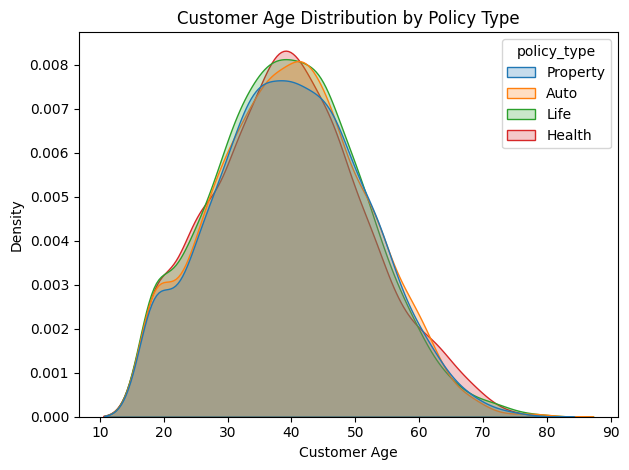

In [ ]:
sns.kdeplot(data=df, x='customer_age', hue='policy_type', fill=True)
plt.title("Customer Age Distribution by Policy Type")
plt.xlabel("Customer Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

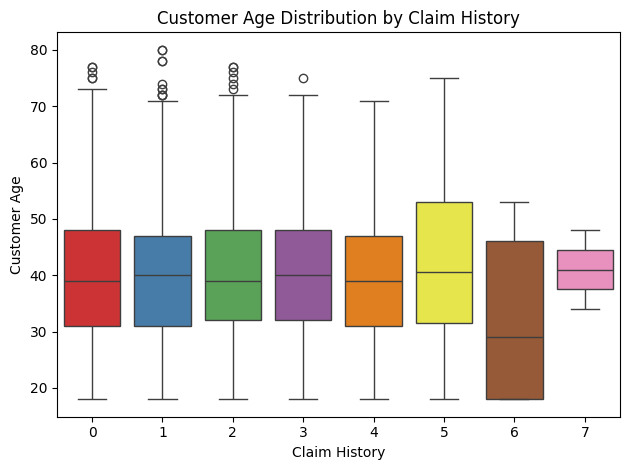

In [ ]:
sns.boxplot(data=df, x='claim_history', y='customer_age', palette='Set1')
plt.title("Customer Age Distribution by Claim History")
plt.xlabel("Claim History")
plt.ylabel("Customer Age")
plt.tight_layout()
plt.show()

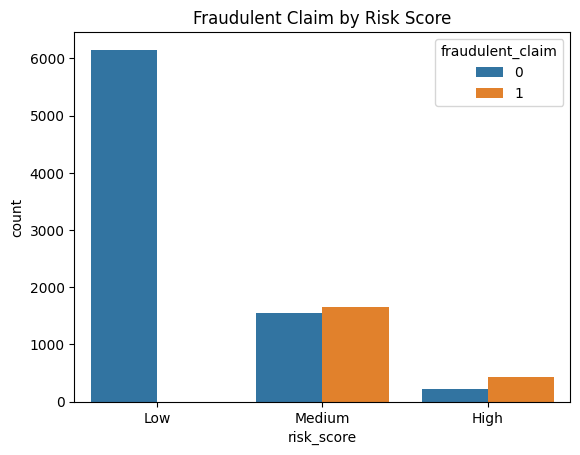

In [ ]:
# Risk Score vs Fraud
df1 = df[['risk_score','fraudulent_claim']].copy()
df1['fraudulent_claim'] = df1['fraudulent_claim'].astype(str)

sns.countplot(data=df1, x='risk_score', hue='fraudulent_claim')
plt.title('Fraudulent Claim by Risk Score')
plt.show()

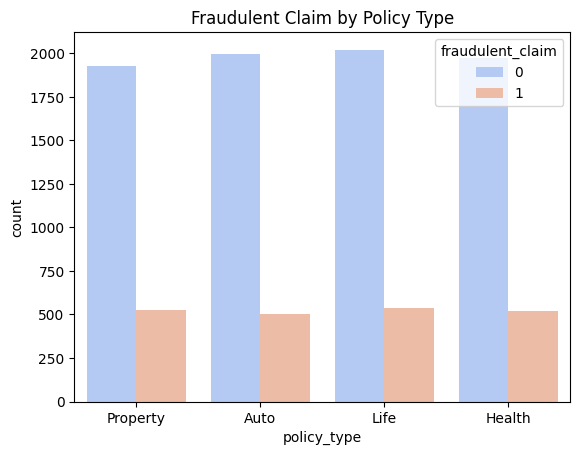

In [ ]:
# Fraud vs Policy Type
df1 = df[['fraudulent_claim', 'policy_type']].copy()
df1['fraudulent_claim'] = df1['fraudulent_claim'].astype(str)

# Plot
sns.countplot(data=df1, x='policy_type', hue='fraudulent_claim', palette='coolwarm')
plt.title('Fraudulent Claim by Policy Type')
plt.show()

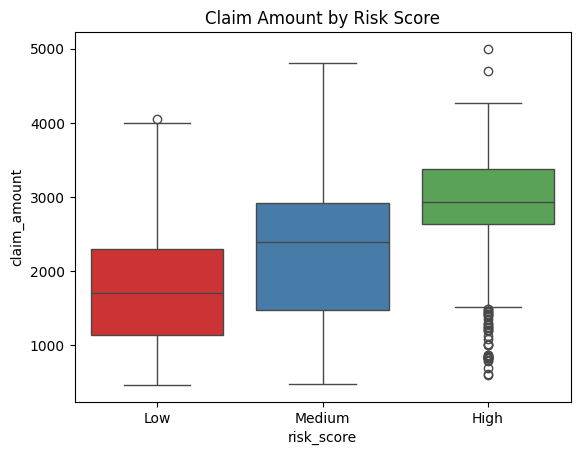

In [ ]:
sns.boxplot(data=df, x='risk_score', y='claim_amount', palette='Set1')
plt.title("Claim Amount by Risk Score")
plt.show()

#### **Multivariate analysis**

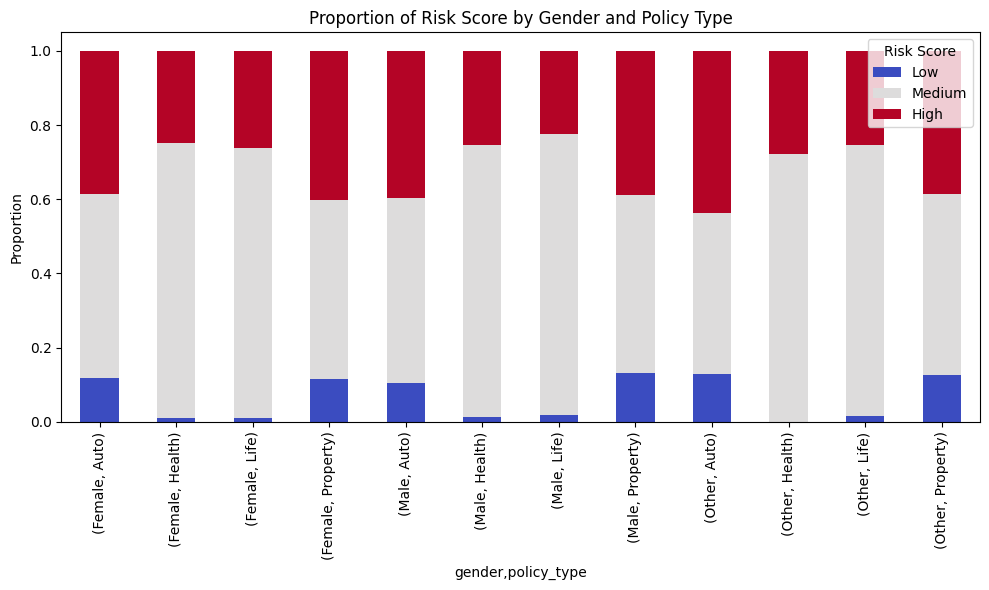

In [ ]:
grouped = df.groupby(['gender', 'policy_type', 'risk_score']).size().reset_index(name='count')

# Pivot for stacked plot
pivot_df = grouped.pivot_table(index=['gender', 'policy_type'], columns='risk_score', values='count', fill_value=0)
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Plot
pivot_df_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Proportion of Risk Score by Gender and Policy Type')
plt.ylabel('Proportion')
plt.legend(title='Risk Score', labels=['Low', 'Medium', 'High'])
plt.tight_layout()
plt.show()

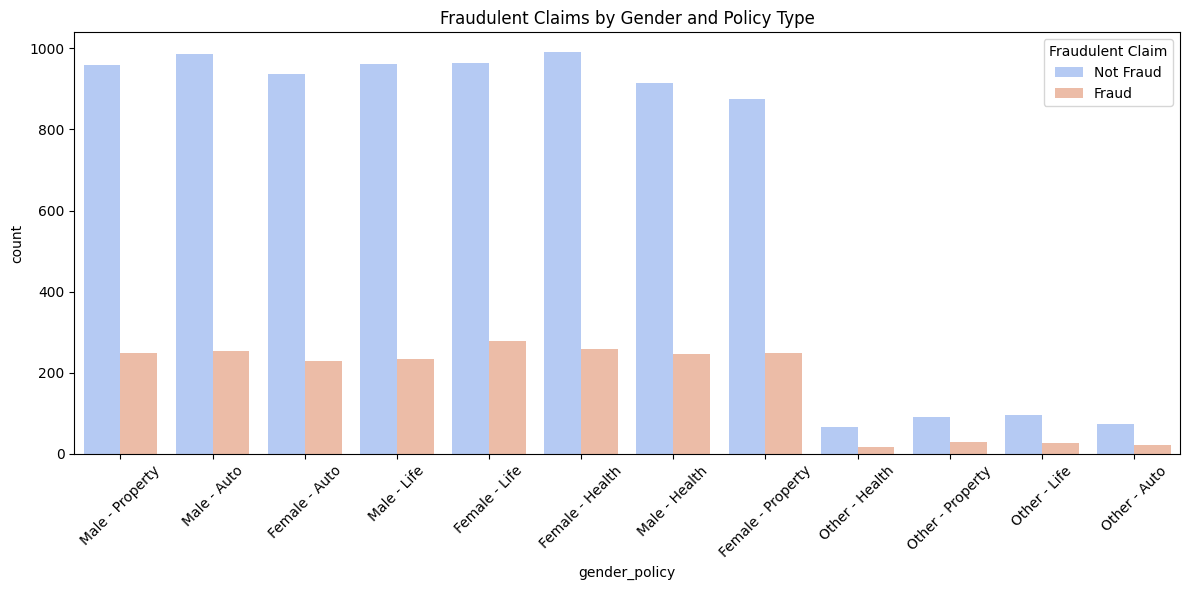

In [ ]:
# Create a combined column for gender & policy type
df1['gender_policy'] = df['gender'] + " - " + df['policy_type']
df1['fraudulent_claim'] = df1['fraudulent_claim'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='gender_policy', hue='fraudulent_claim', palette='coolwarm')
plt.title('Fraudulent Claims by Gender and Policy Type')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent Claim', labels=['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

#### **Outlayers**

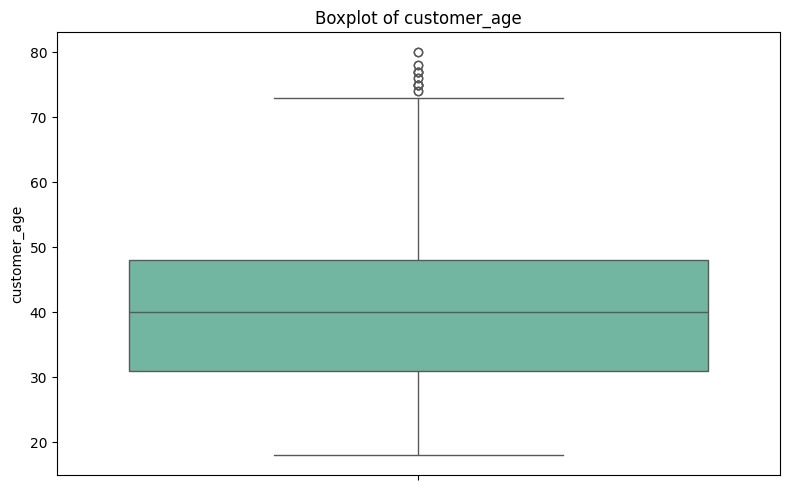

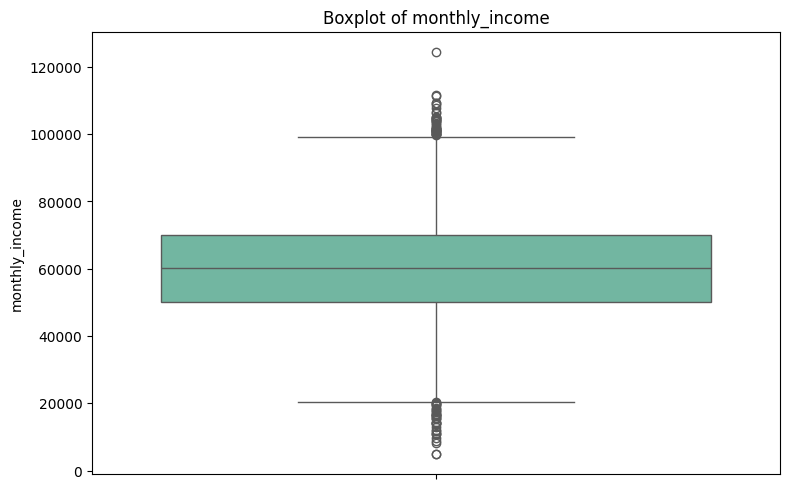

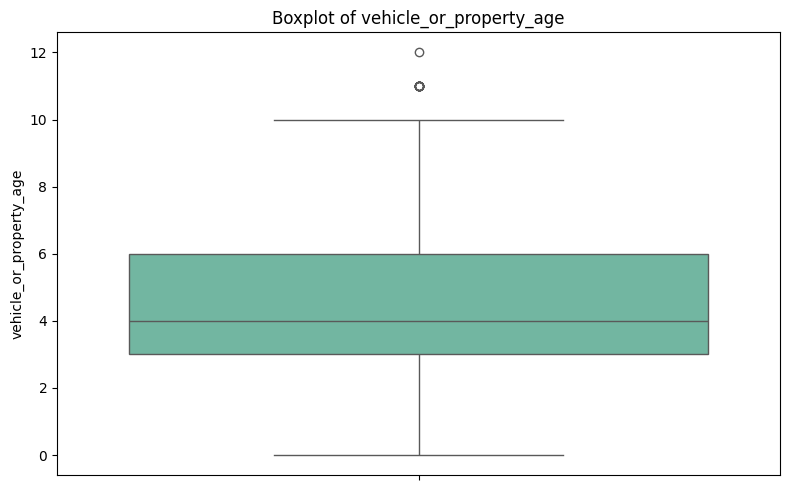

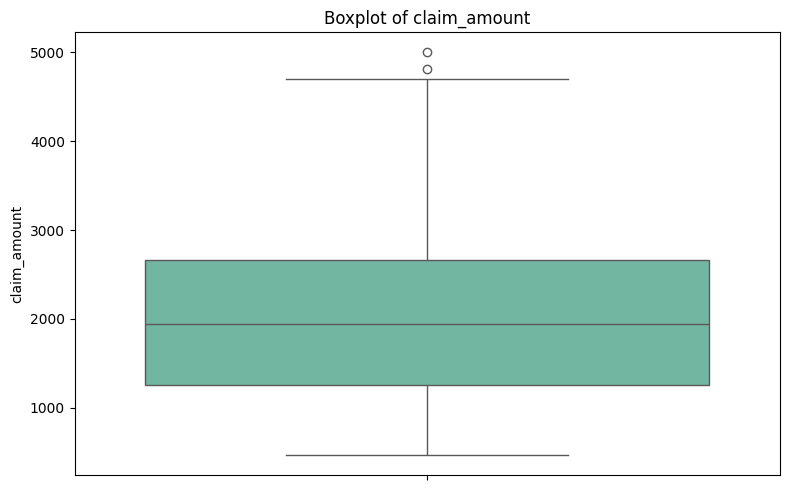

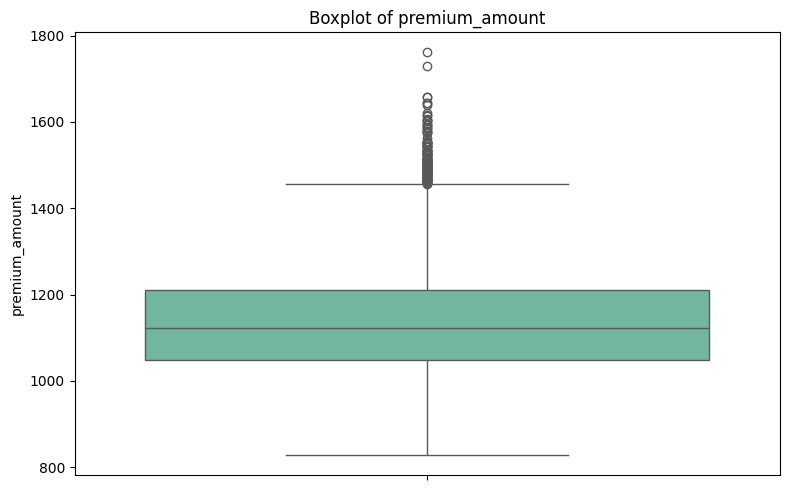

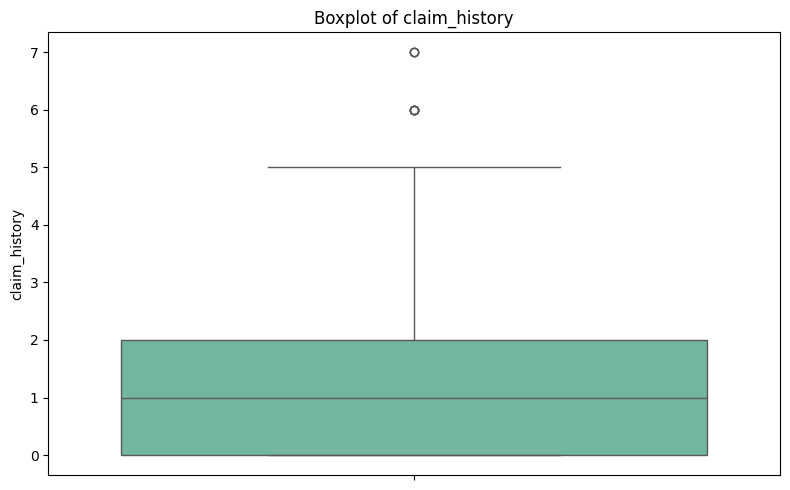

In [ ]:
numerical_cols = ['customer_age', 'monthly_income', 'vehicle_or_property_age',
                  'claim_amount', 'premium_amount', 'claim_history']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=col, palette='Set2')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

### **Feature selection & Multivariate Analysis**

In [ ]:
df.drop(columns=['location', 'policy_upgrade'], inplace=True)
df.head()

customer_age  gender policy_type  monthly_income  vehicle_or_property_age  \
0            45    Male    Property        57926.04                        6   
1            52    Male        Auto        52957.88                        6   
2            27  Female        Auto        64713.71                        3   
3            33    Male        Life        50990.42                        4   
4            24  Female        Life        76379.88                       10   

   claim_history  fraudulent_claim  premium_amount  claim_amount risk_score  
0              0                 0         1100.36        719.87        Low  
1              0                 0         1038.41       1483.60        Low  
2              2                 0         1127.81       2247.89        Low  
3              1                 0         1086.71       3012.94        Low  
4              0                 1         1072.40       2710.86     Medium

In [ ]:
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns
df[numerical_cols].corr()

customer_age  monthly_income  \
customer_age                 1.000000       -0.017205   
monthly_income              -0.017205        1.000000   
vehicle_or_property_age     -0.000987       -0.000554   
claim_history                0.012592        0.007593   
fraudulent_claim            -0.004355       -0.001712   
premium_amount               0.061155        0.003642   
claim_amount                 0.016752       -0.008391   

                         vehicle_or_property_age  claim_history  \
customer_age                           -0.000987       0.012592   
monthly_income                         -0.000554       0.007593   
vehicle_or_property_age                 1.000000      -0.003924   
claim_history                          -0.003924       1.000000   
fraudulent_claim                        0.024555       0.014329   
premium_amount                         -0.003430       0.878410   
claim_amount                            0.018016       0.210011   

                         fraudulent_claim  premium_amount  claim_amount  
customer_age                    -0.004355        0.061155      0.016752  
monthly_income                  -0.001712        0.003642     -0.008391  
vehicle_or_property_age          0.024555       -0.003430      0.018016  
claim_history                    0.014329        0.878410      0.210011  
fraudulent_claim                 1.000000        0.018220     -0.011124  
premium_amount                   0.018220        1.000000      0.240576  
claim_amount                    -0.011124        0.240576      1.000000

<Axes: >

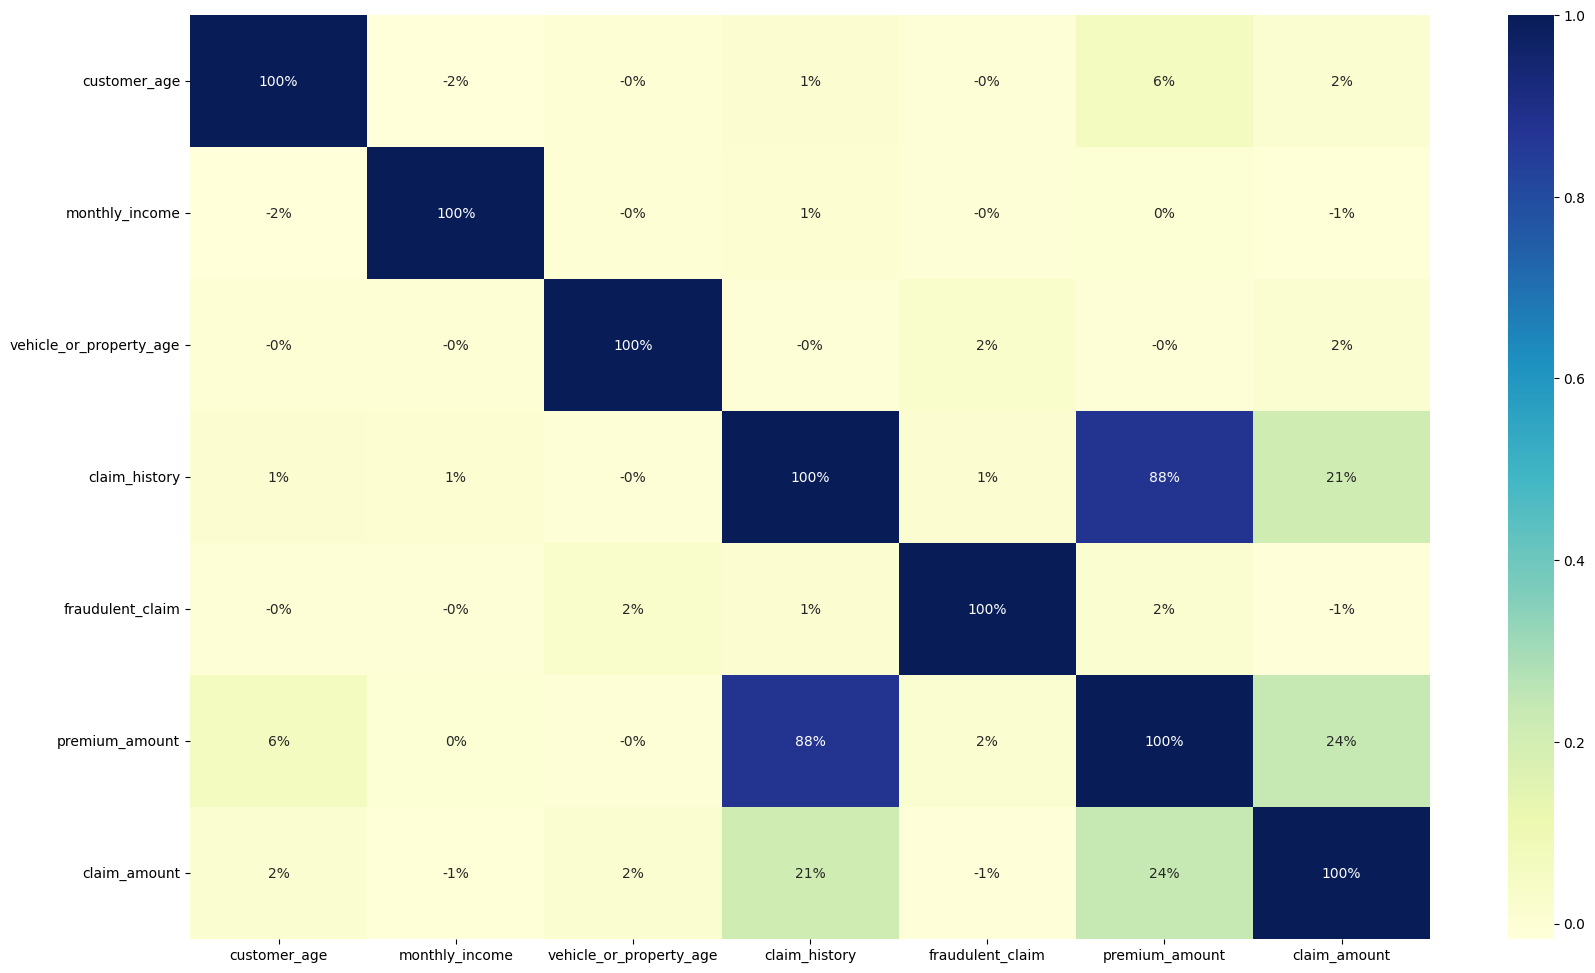

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df[numerical_cols].corr(),annot=True,fmt='.0%', cmap='YlGnBu')

1. (0.88) Strong positive correlation – more claim history -> higher premiums. (risk-based pricing)
2. (0.25) Some influence — more premium amount -> higher current claim amount.
3. (0.23) Some influence — more past claim history -> higher current claim amount.

### **Encoding**

In [ ]:
# Ordinal Encoding (Label encoding)

# target-1
risk_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['risk_score'] = df['risk_score'].str.lower().map(risk_mapping)
df.head()

customer_age  gender policy_type  monthly_income  vehicle_or_property_age  \
0            45    Male    Property        57926.04                        6   
1            52    Male        Auto        52957.88                        6   
2            27  Female        Auto        64713.71                        3   
3            33    Male        Life        50990.42                        4   
4            24  Female        Life        76379.88                       10   

   claim_history  fraudulent_claim  premium_amount  claim_amount  risk_score  
0              0                 0         1100.36        719.87           0  
1              0                 0         1038.41       1483.60           0  
2              2                 0         1127.81       2247.89           0  
3              1                 0         1086.71       3012.94           0  
4              0                 1         1072.40       2710.86           1

In [ ]:
# target-1
df["risk_score"].value_counts() # (61:32:06)

risk_score
0    6153
1    3203
2     644
Name: count, dtype: int64

In [ ]:
# one hot encoding

df= pd.get_dummies(df, columns=['gender', 'policy_type'])
df.head()

customer_age  monthly_income  vehicle_or_property_age  claim_history  \
0            45        57926.04                        6              0   
1            52        52957.88                        6              0   
2            27        64713.71                        3              2   
3            33        50990.42                        4              1   
4            24        76379.88                       10              0   

   fraudulent_claim  premium_amount  claim_amount  risk_score  gender_Female  \
0                 0         1100.36        719.87           0          False   
1                 0         1038.41       1483.60           0          False   
2                 0         1127.81       2247.89           0           True   
3                 0         1086.71       3012.94           0          False   
4                 1         1072.40       2710.86           1           True   

   gender_Male  gender_Other  policy_type_Auto  policy_type_Health  \
0         True         False             False               False   
1         True         False              True               False   
2        False         False              True               False   
3         True         False             False               False   
4        False         False             False               False   

   policy_type_Life  policy_type_Property  
0             False                  True  
1             False                 False  
2             False                 False  
3              True                 False  
4              True                 False

### **Train Test Split**

In [ ]:
x=df.drop(columns=["risk_score"])
y=df["risk_score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)

### **Smote**

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [ ]:
pd.Series(y_train).value_counts().sort_index()

risk_score
0    4922
1    4922
2    4922
Name: count, dtype: int64

### **Feature Scaling**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### **classification- MACHINE LEARNING**

In [ ]:
y.value_counts()

risk_score
0    6153
1    3203
2     644
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

risk_score
1    4922
0    4922
2    4922
Name: count, dtype: int64

####  Logistic Regression

In [ ]:
log = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

# Train the model
log.fit(x_train, y_train)
train_score = log.score(x_train, y_train)

# Pred
y_pred = log.predict(x_test)

print('Logistic Regression')
train_acc = log.score(x_train, y_train)
test_acc = log.score(x_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Logistic Regression
Train Accuracy: 0.8275
Test Accuracy: 0.8280

Confusion Matrix:
 [[1226    3    2]
 [ 155  316  169]
 [   0   15  114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1231
           1       0.95      0.49      0.65       640
           2       0.40      0.88      0.55       129

    accuracy                           0.83      2000
   macro avg       0.74      0.79      0.71      2000
weighted avg       0.87      0.83      0.82      2000

Balanced Accuracy: 0.7911


In [ ]:
cv_scores = cross_val_score(log, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.838 0.836 0.842 0.834 0.85  0.822 0.84  0.832 0.845 0.832]
Mean CV Accuracy: 0.8370999999999998


In [ ]:
log_reg = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Type of regularization
}
grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           cv=5,               # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV Accuracy):", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 100, 'penalty': 'l1'}
Best Score (CV Accuracy): 0.837195709537436

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1231
           1       0.92      0.56      0.69       640
           2       0.42      0.91      0.58       129

    accuracy                           0.84      2000
   macro avg       0.75      0.82      0.74      2000
weighted avg       0.88      0.84      0.84      2000



####  Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5, min_samples_leaf= 1, min_samples_split= 2)

# 'criterion': 'entropy', 'max_depth': 5,10 , 'min_samples_leaf': 1, 'min_samples_split': 2,5

# Train the model
dt.fit(x_train, y_train)

# Predictions
y_pred = dt.predict(x_test)

print('Decision Tree Classifier')
train_acc = dt.score(x_train, y_train)
test_acc = dt.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Decision Tree Classifier
Train Accuracy: 0.9120
Test Accuracy: 0.9790
Confusion Matrix:
 [[1231    0    0]
 [   8  599   33]
 [   0    1  128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1231
           1       1.00      0.94      0.97       640
           2       0.80      0.99      0.88       129

    accuracy                           0.98      2000
   macro avg       0.93      0.98      0.95      2000
weighted avg       0.98      0.98      0.98      2000

Balanced Accuracy: 0.9761


In [ ]:
cv_scores = cross_val_score(dt, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.994 0.991 0.995 0.991 0.992 0.992 0.993 0.99  0.989 0.992]
Mean CV Accuracy: 0.9919


In [ ]:
dtree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],         # Splitting criteria
    'max_depth': [None, 5, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Min samples required to split
    'min_samples_leaf': [1, 2, 4],            # Min samples required at a leaf
}
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-Validation Score: 0.9407415797161626

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1231
           1       0.98      0.94      0.96       640
           2       0.77      0.99      0.86       129

    accuracy                           0.97      2000
   macro avg       0.92      0.97      0.94      2000
weighted avg       0.98      0.97      0.98      2000



####  Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)

# 'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200

# Train the model
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)


print('Random Forest Classifier')
train_acc = rf.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Random Forest Classifier
Train Score: 0.9695
Test Score: 0.9850
Confusion Matrix:
 [[1231    0    0]
 [   1  612   27]
 [   0    2  127]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1231
           1       1.00      0.96      0.98       640
           2       0.82      0.98      0.90       129

    accuracy                           0.98      2000
   macro avg       0.94      0.98      0.96      2000
weighted avg       0.99      0.98      0.99      2000

Balanced Accuracy: 0.9802


In [ ]:
cv_scores = cross_val_score(rf, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.995 0.995 0.998 0.994 0.997 0.997 0.997 0.996 0.995 0.996]
Mean CV Accuracy: 0.9960000000000001


In [ ]:
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],        # number of trees
    'max_depth': [None, 10],        # depth of the tree
    'min_samples_split': [2, 5],        # minimum samples to split a node
    'min_samples_leaf': [1, 2],          # minimum samples at leaf node
    'bootstrap': [True]              # whether bootstrap samples are used
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,                      # 5-fold cross-validation
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)                 # use all processors


# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9634289722006768


####  SVC (Support Vector Classifier)

In [ ]:
svc= SVC(C= 1, gamma= 'scale', kernel= 'rbf',probability=True)
# 'kernel': 'rbf', 'gamma': 'scale', 'C': 1

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)


print('Support Vector Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = svc.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Support Vector Classifier
Accuracy: 0.95
Train Score: 0.9451
Test Score: 0.9545
Confusion Matrix:
 [[1208   23    0]
 [  13  581   46]
 [   0    9  120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1231
           1       0.95      0.91      0.93       640
           2       0.72      0.93      0.81       129

    accuracy                           0.95      2000
   macro avg       0.89      0.94      0.91      2000
weighted avg       0.96      0.95      0.96      2000

Balanced Accuracy: 0.9398


In [ ]:
cv_scores = cross_val_score(svc, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.616 0.616 0.616 0.615 0.615 0.615 0.615 0.615 0.615 0.615]
Mean CV Accuracy: 0.6153000000000001


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svc = SVC(probability=True, random_state=42)

param_dist = {
    'kernel': ['linear', 'rbf'],
    'C': [ 1, 10],
    'gamma': ['scale']
}

random_search_svc = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=10,           # Only try 10 random combinations
    scoring='accuracy',
    cv=3,                # 3-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_svc.fit(x_train, y_train)
print("Best Params:", random_search_svc.best_params_)
print("Best Score:", random_search_svc.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Best Score: 0.9271298929974265


####  K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
# 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('K-Nearest Neighbors')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = knn.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

K-Nearest Neighbors
Accuracy: 0.91
Train Score: 0.9440
Test Score: 0.9070
Confusion Matrix:
 [[1199   29    3]
 [  64  511   65]
 [   0   25  104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1231
           1       0.90      0.80      0.85       640
           2       0.60      0.81      0.69       129

    accuracy                           0.91      2000
   macro avg       0.82      0.86      0.83      2000
weighted avg       0.91      0.91      0.91      2000

Balanced Accuracy: 0.8595


In [ ]:
cv_scores = cross_val_score(knn, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.617 0.611 0.591 0.627 0.608 0.615 0.58  0.582 0.6   0.605]
Mean CV Accuracy: 0.6035999999999999


In [ ]:
knn = KNeighborsClassifier()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9158880919556462


####  Naive Bayes

In [ ]:
nb = BernoulliNB()
# 'alpha': 0.1, 'fit_prior': True

nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print("Naive Bayes")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = nb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Naive Bayes
Accuracy: 0.83
Train Score: 0.8048
Test Score: 0.8265
Confusion Matrix:
 [[1062  124   45]
 [  10  506  124]
 [   0   44   85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      1231
           1       0.75      0.79      0.77       640
           2       0.33      0.66      0.44       129

    accuracy                           0.83      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.87      0.83      0.84      2000

Balanced Accuracy: 0.7708


In [ ]:
cv_scores = cross_val_score(nb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.78  0.762 0.796 0.772 0.791 0.774 0.782 0.791 0.788 0.775]
Mean CV Accuracy: 0.7811000000000001


In [ ]:
bnb = BernoulliNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0],         # Laplace smoothing
    'fit_prior': [True, False]        # Whether to learn class prior probabilities
}

# Step 5: GridSearchCV
grid = GridSearchCV(bnb, param_grid, cv=3, scoring='accuracy')
grid.fit(x_train, y_train)

# Step 6: Evaluation
print("Best parameters:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

Best parameters: {'alpha': 1.0, 'fit_prior': True}
Best cross-val accuracy: 0.7877556548828389


####  XGBoost

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8)

# 'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2
# learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print('XGBoost Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = xgb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

XGBoost Classifier
Accuracy: 0.99
Train Score: 1.0000
Test Score: 0.9875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1231
           1       0.99      0.97      0.98       640
           2       0.86      0.97      0.91       129

    accuracy                           0.99      2000
   macro avg       0.95      0.98      0.96      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix:
 [[1230    1    0]
 [   0  620   20]
 [   0    4  125]]
Balanced Accuracy: 0.9790


In [ ]:
cv_scores = cross_val_score(xgb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.999 0.998 0.998 0.998 0.999 0.998 0.999 0.999 0.997 0.998]
Mean CV Accuracy: 0.9982999999999999


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
    param_distributions=param_dist,
    n_iter=10,  # Try only 10 random combos instead of all 81
    scoring='accuracy',
    cv=3,       # Reduce to 3-fold for speed
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2}
Best Score: 0.9589597724502235


####  Light GBM

In [ ]:
import lightgbm as lgb
lgb= lgb.LGBMClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=20)

# learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 20
# objective='binary', metric='binary_error', boosting_type='gbdt', random_state=42
# learning_rate=0.1, max_depth=7, n_estimators=200, num_leaves=50

# Train model
lgb.fit(x_train, y_train)
y_pred = lgb.predict(x_test)

print('Light GBM')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = lgb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 14766, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [ ]:
cv_scores = cross_val_score(lgb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 14
[LightGBM] [Info] Start training from score -0.485772
[LightGBM] [Info] Start training from score -1.138393
[LightGBM] [Info] Start training from score -2.741952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'num_leaves': [20, 30]
}

# Define model without metric (correct)
model = LGBMClassifier(objective='multiclass', boosting_type='gbdt', num_class=3)

# Grid search
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 14766, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

### **classification- DEEP LEARNING**

In [ ]:
y.value_counts()  # 2 => 666
                  # 1 => 3233
                  # 0 => 6101

risk_score
0    6153
1    3203
2     644
Name: count, dtype: int64

In [ ]:
y_train.value_counts()  # 4881

risk_score
1    4922
0    4922
2    4922
Name: count, dtype: int64

In [ ]:
y_train[:5] # if this is not one hot encoding then use  loss = 'sparse_categorical_crossentropy' [2,0,1,0,1]

0    1
1    0
2    1
3    1
4    0
Name: risk_score, dtype: int64

In [ ]:
# y_train and y_test are integer labels (0, 1, 2)  One-hot encode your labels for deep learning
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

print(np.bincount(y_train_cat.argmax(axis=1)))
print(np.bincount(y_test_cat.argmax(axis=1)))

[4922 4922 4922]
[1231  640  129]


In [ ]:
# Build the deep learning model
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(192, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(96, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 classes: low, medium, high
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # 'sparse_categorical_crossentropy'

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict on test set
y_pred = model.predict(x_test)
y_pred_labels = y_pred.argmax(axis=1)

# Evaluate model
print("Classification Report:\n")
print(classification_report(y_test, y_pred_labels))

cm = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(cm)

Epoch 1/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6951 - loss: 0.6367 - val_accuracy: 0.8832 - val_loss: 0.3296
Epoch 2/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8978 - loss: 0.2667 - val_accuracy: 0.8802 - val_loss: 0.3143
Epoch 3/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9183 - loss: 0.2174 - val_accuracy: 0.8592 - val_loss: 0.2911
Epoch 4/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9273 - loss: 0.1906 - val_accuracy: 0.8764 - val_loss: 0.3218
Epoch 5/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9391 - loss: 0.1683 - val_accuracy: 0.8582 - val_loss: 0.3311
Epoch 6/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9405 - loss: 0.1660 - val_accuracy: 0.8663 - val_loss: 0.2857
Epoch 7/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9482 - loss: 0.1476 - val_accuracy: 0.7830 - val_loss: 0.4923
Epoch 8/50
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9477 - loss: 0.1379 - val_accuracy: 0.

### **classification- Best Model**

In [ ]:
print("Xg boost, Random forest, Deep leaning.")

Xg boost, Random forest, Deep leaning.


### **classification- Manual Testing**

In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[45,57926,6,0,0,1100,719,True,False,False,True,False,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

y_pred = xgb.predict(new_customer_scaled)

# Output raw prediction
print("Predicted class:", y_pred[0])

# Interpret prediction
if y_pred[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif y_pred[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif y_pred[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 0
✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[45,57926,6,0,0,1100,719,True,False,False,True,False,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

y_pred = xgb.predict(new_customer_scaled)
print(y_pred)

# Output raw prediction
print("Predicted class:", y_pred[0])

# Interpret prediction
if y_pred[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif y_pred[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif y_pred[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

[0]
Predicted class: 0
✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[33,50996,6,0,0,964,1662,False,True,False,False,True,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
predicted_class = xgb.predict(new_customer_scaled)

# Output raw prediction
print("Predicted class:", predicted_class[0])

# Interpret prediction
if predicted_class[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 0
✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[36,63502,5,0,1,958,1639,True,False,False,False,True,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
predicted_class = xgb.predict(new_customer_scaled)

# Output raw prediction
print("Predicted class:", predicted_class[0])

# Interpret prediction
if predicted_class[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 1
⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[54,79490,6,1,2,1443,786,False,True,False,False,False,True,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
predicted_class = xgb.predict(new_customer_scaled)

# Output raw prediction
print("Predicted class:", predicted_class[0])

# Interpret prediction
if predicted_class[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 1
⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[39,60078,5,3,0,1229,2750,False,True,False,False,True,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
predicted_class = xgb.predict(new_customer_scaled)

# Output raw prediction
print("Predicted class:", predicted_class[0])

# Interpret prediction
if predicted_class[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 1
⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[47,57585,4,0,1,978,2741,False,True,False,False,False,False,True]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
predicted_class = xgb.predict(new_customer_scaled)

# Output raw prediction
print("Predicted class:", predicted_class[0])

# Interpret prediction
if predicted_class[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 2
❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[28,80730,6,4,0,1371,3052,False,True,False,False,False,False,True]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
predicted_class = xgb.predict(new_customer_scaled)

# Output raw prediction
print("Predicted class:", predicted_class[0])

# Interpret prediction
if predicted_class[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 2
❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[30,55442,5,3,0,1449,3702,False,True,False,False,False,False,True]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
predicted_class = xgb.predict(new_customer_scaled)

# Output raw prediction
print("Predicted class:", predicted_class[0])

# Interpret prediction
if predicted_class[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif predicted_class[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif predicted_class[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 2
❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.


### **classification- Save the model and scaler**

In [ ]:
with open('risk_score_class_xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [ ]:
files.download('risk_score_class_xgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('scaler_risk_score_class.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
files.download('scaler_risk_score_class.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **classification- Open and use it**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import pickle

In [ ]:
uploaded = files.upload()

Saving risk_score_class_xgb_model.pkl to risk_score_class_xgb_model.pkl
Saving scaler_risk_score_class.pkl to scaler_risk_score_class.pkl


In [ ]:
with open("risk_score_class_xgb_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [ ]:
with open("scaler_risk_score_class.pkl", "rb") as file:
    scaler = pickle.load(file)

In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[20,28988,4,1,0,1048,1465,False,True,False,False,False,True,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
y_pred = loaded_model.predict(new_customer_scaled)

# Output raw prediction
print("Predicted class:", y_pred[0])

# Interpret prediction
if y_pred[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif y_pred[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif y_pred[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 0
✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[45,60872,4,1,1,1092,1543,True,False,False,False,False,False,True]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
y_pred = loaded_model.predict(new_customer_scaled)

# Output raw prediction
print("Predicted class:", y_pred[0])

# Interpret prediction
if y_pred[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif y_pred[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif y_pred[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 1
⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[42,27437,4,3,1,1409,2403,False,True,False,True,False,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
y_pred = loaded_model.predict(new_customer_scaled)

# Output raw prediction
print("Predicted class:", y_pred[0])

# Interpret prediction
if y_pred[0] == 0:
    print("✅ Insurance Risk Level: LOW – This individual is likely to be a safe, low-risk customer.")
elif y_pred[0] == 1:
    print("⚠️ Insurance Risk Level: MEDIUM – This individual has a moderate risk profile.")
elif y_pred[0] == 2:
    print("❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.")
else:
    print("❓ Unknown prediction.")

Predicted class: 2
❌ Insurance Risk Level: HIGH – This individual is likely to pose a high insurance risk.


## **REGRESSION - Claim Amount Prediction**

### **Upload and load dataset**

In [ ]:
# upload the data

uploaded = files.upload()

Saving insurance_class_reg_data.csv to insurance_class_reg_data.csv


In [ ]:
# Create an empty dictionary to store dataframes
dataframes = {}

# Load each file into a separate DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    dataframes[file_name] = df
    print(f"Dataset '{file_name}' uploaded successfully!")

Dataset 'insurance_class_reg_data.csv' uploaded successfully!


In [ ]:
df = dataframes["insurance_class_reg_data.csv"]

### **Data Cleaning**

In [ ]:
df.head()

Customer_ID  Policy_ID  Customer_Age  Gender Policy_Type  Monthly_Income  \
0  CUST100000  POL100000            45    Male    Property        57926.04   
1  CUST100001  POL100001            52    Male        Auto        52957.88   
2  CUST100002  POL100002            27  Female        Auto        64713.71   
3  CUST100003  POL100003            33    Male        Life        50990.42   
4  CUST100004  POL100004            24  Female        Life        76379.88   

   Vehicle_or_Property_Age  Claim_History  Fraudulent_Claim  Premium_Amount  \
0                        6              0                 0         1100.36   
1                        6              0                 0         1038.41   
2                        3              2                 0         1127.81   
3                        4              1                 0         1086.71   
4                       10              0                 1         1072.40   

   Claim_Amount Risk_Score Location  Policy_Upgrade  
0        719.87        Low  Chicago               1  
1       1483.60        Low  Chicago               0  
2       2247.89        Low  Chicago               0  
3       3012.94        Low  Houston               0  
4       2710.86     Medium  Houston               0

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              10000 non-null  object 
 1   Policy_ID                10000 non-null  object 
 2   Customer_Age             10000 non-null  int64  
 3   Gender                   10000 non-null  object 
 4   Policy_Type              10000 non-null  object 
 5   Monthly_Income           10000 non-null  float64
 6   Vehicle_or_Property_Age  10000 non-null  int64  
 7   Claim_History            10000 non-null  int64  
 8   Fraudulent_Claim         10000 non-null  int64  
 9   Premium_Amount           10000 non-null  float64
 10  Claim_Amount             10000 non-null  float64
 11  Risk_Score               10000 non-null  object 
 12  Location                 10000 non-null  object 
 13  Policy_Upgrade           10000 non-null  int64  
dtypes: float64(3), int64(5)

In [ ]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['customer_id', 'policy_id', 'customer_age', 'gender', 'policy_type',
       'monthly_income', 'vehicle_or_property_age', 'claim_history',
       'fraudulent_claim', 'premium_amount', 'claim_amount', 'risk_score',
       'location', 'policy_upgrade'],
      dtype='object')

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.isnull().sum()

customer_id                0
policy_id                  0
customer_age               0
gender                     0
policy_type                0
monthly_income             0
vehicle_or_property_age    0
claim_history              0
fraudulent_claim           0
premium_amount             0
claim_amount               0
risk_score                 0
location                   0
policy_upgrade             0
dtype: int64

In [ ]:
df.describe(include="all")

customer_id  policy_id  customer_age gender policy_type  \
count        10000      10000  10000.000000  10000       10000   
unique       10000      10000           NaN      3           4   
top     CUST109983  POL109983           NaN   Male        Life   
freq             1          1           NaN   4802        2559   
mean           NaN        NaN     39.656600    NaN         NaN   
std            NaN        NaN     11.715153    NaN         NaN   
min            NaN        NaN     18.000000    NaN         NaN   
25%            NaN        NaN     31.000000    NaN         NaN   
50%            NaN        NaN     40.000000    NaN         NaN   
75%            NaN        NaN     48.000000    NaN         NaN   
max            NaN        NaN     80.000000    NaN         NaN   

        monthly_income  vehicle_or_property_age  claim_history  \
count     10000.000000             10000.000000   10000.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean      60135.977359                 4.510100       1.178800   
std       14779.314002                 2.008607       1.079327   
min        5000.000000                 0.000000       0.000000   
25%       50225.207500                 3.000000       0.000000   
50%       60212.245000                 4.000000       1.000000   
75%       70056.430000                 6.000000       2.000000   
max      124482.860000                12.000000       7.000000   

        fraudulent_claim  premium_amount  claim_amount risk_score  location  \
count         10000.0000    10000.000000  10000.000000      10000     10000   
unique               NaN             NaN           NaN          3         5   
top                  NaN             NaN           NaN        Low  New York   
freq                 NaN             NaN           NaN       6153      2048   
mean              0.2087     1137.973443   1984.201544        NaN       NaN   
std               0.4064      122.270719    855.911666        NaN       NaN   
min               0.0000      828.180000    469.420000        NaN       NaN   
25%               0.0000     1047.347500   1258.887500        NaN       NaN   
50%               0.0000     1122.950000   1945.720000        NaN       NaN   
75%               0.0000     1211.065000   2657.427500        NaN       NaN   
max               1.0000     1761.120000   4997.150000        NaN       NaN   

        policy_upgrade  
count     10000.000000  
unique             NaN  
top                NaN  
freq               NaN  
mean          0.606500  
std           0.663552  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           1.000000  
max           2.000000

In [ ]:
assert pd.notnull(df).all().all()

In [ ]:
assert pd.notnull(df.select_dtypes(include=["number"])).all().all()

In [ ]:
df.head()

customer_id  policy_id  customer_age  gender policy_type  monthly_income  \
0  CUST100000  POL100000            45    Male    Property        57926.04   
1  CUST100001  POL100001            52    Male        Auto        52957.88   
2  CUST100002  POL100002            27  Female        Auto        64713.71   
3  CUST100003  POL100003            33    Male        Life        50990.42   
4  CUST100004  POL100004            24  Female        Life        76379.88   

   vehicle_or_property_age  claim_history  fraudulent_claim  premium_amount  \
0                        6              0                 0         1100.36   
1                        6              0                 0         1038.41   
2                        3              2                 0         1127.81   
3                        4              1                 0         1086.71   
4                       10              0                 1         1072.40   

   claim_amount risk_score location  policy_upgrade  
0        719.87        Low  Chicago               1  
1       1483.60        Low  Chicago               0  
2       2247.89        Low  Chicago               0  
3       3012.94        Low  Houston               0  
4       2710.86     Medium  Houston               0

In [ ]:
df.tail()

customer_id  policy_id  customer_age  gender policy_type  monthly_income  \
9995  CUST109995  POL109995            42  Female        Auto        49669.35   
9996  CUST109996  POL109996            18  Female        Life        58772.73   
9997  CUST109997  POL109997            49    Male        Life        53191.23   
9998  CUST109998  POL109998            47    Male        Life        69057.97   
9999  CUST109999  POL109999            39    Male    Property        69660.63   

      vehicle_or_property_age  claim_history  fraudulent_claim  \
9995                        1              1                 0   
9996                        4              3                 0   
9997                        3              1                 1   
9998                        3              1                 0   
9999                        4              1                 0   

      premium_amount  claim_amount risk_score     location  policy_upgrade  
9995         1217.81       3303.48     Medium     New York               1  
9996         1318.93        931.90        Low       Dallas               2  
9997         1239.70       1613.55     Medium  Los Angeles               0  
9998         1180.61       1443.52        Low  Los Angeles               0  
9999         1124.93       2587.94     Medium     New York               2

In [ ]:
df.shape

(10000, 14)

### **Data preprocessing**

In [ ]:
df.drop(columns=['customer_id', 'policy_id', 'location', 'policy_upgrade'], inplace=True)
df.head()

customer_age  gender policy_type  monthly_income  vehicle_or_property_age  \
0            45    Male    Property        57926.04                        6   
1            52    Male        Auto        52957.88                        6   
2            27  Female        Auto        64713.71                        3   
3            33    Male        Life        50990.42                        4   
4            24  Female        Life        76379.88                       10   

   claim_history  fraudulent_claim  premium_amount  claim_amount risk_score  
0              0                 0         1100.36        719.87        Low  
1              0                 0         1038.41       1483.60        Low  
2              2                 0         1127.81       2247.89        Low  
3              1                 0         1086.71       3012.94        Low  
4              0                 1         1072.40       2710.86     Medium

In [ ]:
df.shape

(10000, 10)

In [ ]:
df['vehicle_or_property_age'].value_counts()

vehicle_or_property_age
4     1956
5     1907
3     1511
6     1461
7      886
2      885
1      469
8      452
0      216
9      198
10      46
11      12
12       1
Name: count, dtype: int64

In [ ]:
df[(df['vehicle_or_property_age']==12) | (df['vehicle_or_property_age']==11)]

customer_age  gender policy_type  monthly_income  \
552             41    Male        Auto        54971.89   
553             18  Female    Property        70671.16   
644             36    Male        Auto        58407.09   
1914            28    Male      Health        55945.62   
2950            26    Male    Property        55301.08   
3637            51  Female        Life        63705.96   
4307            18    Male    Property        55775.99   
5520            36  Female        Auto        62429.88   
6490            42    Male      Health        72829.01   
6810            26    Male        Auto        53427.83   
7317            20  Female    Property        68944.52   
7682            35  Female    Property        44023.40   
7779            44  Female        Life        68366.55   

      vehicle_or_property_age  claim_history  fraudulent_claim  \
552                        11              1                 0   
553                        11              0                 0   
644                        11              0                 0   
1914                       11              0                 1   
2950                       11              2                 1   
3637                       11              0                 0   
4307                       11              2                 0   
5520                       11              1                 1   
6490                       11              0                 1   
6810                       11              2                 0   
7317                       11              1                 0   
7682                       12              0                 1   
7779                       11              0                 0   

      premium_amount  claim_amount risk_score  
552          1155.60       3178.65     Medium  
553           987.62       1594.35        Low  
644          1004.86       3033.10     Medium  
1914          934.43        942.52     Medium  
2950         1197.14       1649.64     Medium  
3637          975.46       1627.55        Low  
4307         1267.58       2932.26     Medium  
5520         1135.73       2475.00     Medium  
6490          966.95       1032.16     Medium  
6810         1238.36       2502.54     Medium  
7317         1083.76       2072.52        Low  
7682          930.56       2419.51     Medium  
7779         1129.52        706.52        Low

In [ ]:
df['claim_history'].value_counts()

claim_history
1    3681
0    3040
2    2134
3     824
4     249
5      64
6       5
7       3
Name: count, dtype: int64

In [ ]:
df[(df['claim_history']==7) | (df['claim_history']==6)]

customer_age  gender policy_type  monthly_income  \
1125            46  Female        Auto        81821.24   
1201            29    Male        Auto        67221.65   
3917            41  Female        Auto        70738.69   
5340            48  Female        Life        47936.40   
6550            34    Male      Health        63419.22   
8331            18  Female        Auto        57144.70   
8442            53  Female        Auto        73170.60   
9462            18    Male    Property        76440.94   

      vehicle_or_property_age  claim_history  fraudulent_claim  \
1125                        8              6                 1   
1201                        5              6                 1   
3917                        4              7                 0   
5340                        4              7                 0   
6550                        6              7                 0   
8331                        3              6                 0   
8442                        3              6                 1   
9462                        5              6                 1   

      premium_amount  claim_amount risk_score  
1125         1424.74       2895.48       High  
1201         1729.68       1405.94       High  
3917         1761.12       3290.87       High  
5340         1620.40       2911.72     Medium  
6550         1602.35       2175.97        Low  
8331         1516.51       1148.57     Medium  
8442         1640.02       4997.15       High  
9462         1593.41       2870.89       High

In [ ]:
df["policy_type"].value_counts()

policy_type
Life        2559
Auto        2500
Health      2490
Property    2451
Name: count, dtype: int64

In [ ]:
# Target - 1
df["risk_score"].value_counts()

risk_score
Low       6153
Medium    3203
High       644
Name: count, dtype: int64

In [ ]:
# Target - 2
df['fraudulent_claim'].value_counts()  # 0 - NO, 1 - Yes

fraudulent_claim
0    7913
1    2087
Name: count, dtype: int64

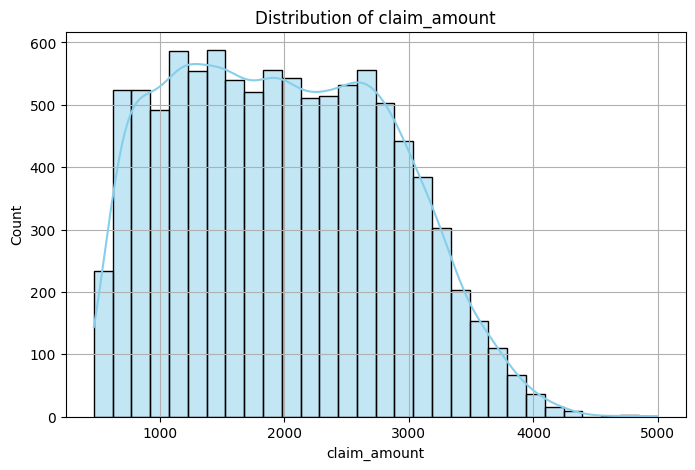

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["claim_amount"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of claim_amount")
plt.xlabel("claim_amount")
plt.ylabel('Count')
plt.grid(True)
plt.show()

The distribution is right-skewed (positively skewed) — there are many lower/mid-range claims and few high claim amounts.

Data is dense between 800 and 3000. It resembles a log-normal distribution.

### **Feature selection & Multivariate Analysis**

In [ ]:
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns
df[numerical_cols].corr()

customer_age  monthly_income  \
customer_age                 1.000000       -0.017205   
monthly_income              -0.017205        1.000000   
vehicle_or_property_age     -0.000987       -0.000554   
claim_history                0.012592        0.007593   
fraudulent_claim            -0.004355       -0.001712   
premium_amount               0.061155        0.003642   
claim_amount                 0.016752       -0.008391   

                         vehicle_or_property_age  claim_history  \
customer_age                           -0.000987       0.012592   
monthly_income                         -0.000554       0.007593   
vehicle_or_property_age                 1.000000      -0.003924   
claim_history                          -0.003924       1.000000   
fraudulent_claim                        0.024555       0.014329   
premium_amount                         -0.003430       0.878410   
claim_amount                            0.018016       0.210011   

                         fraudulent_claim  premium_amount  claim_amount  
customer_age                    -0.004355        0.061155      0.016752  
monthly_income                  -0.001712        0.003642     -0.008391  
vehicle_or_property_age          0.024555       -0.003430      0.018016  
claim_history                    0.014329        0.878410      0.210011  
fraudulent_claim                 1.000000        0.018220     -0.011124  
premium_amount                   0.018220        1.000000      0.240576  
claim_amount                    -0.011124        0.240576      1.000000

<Axes: >

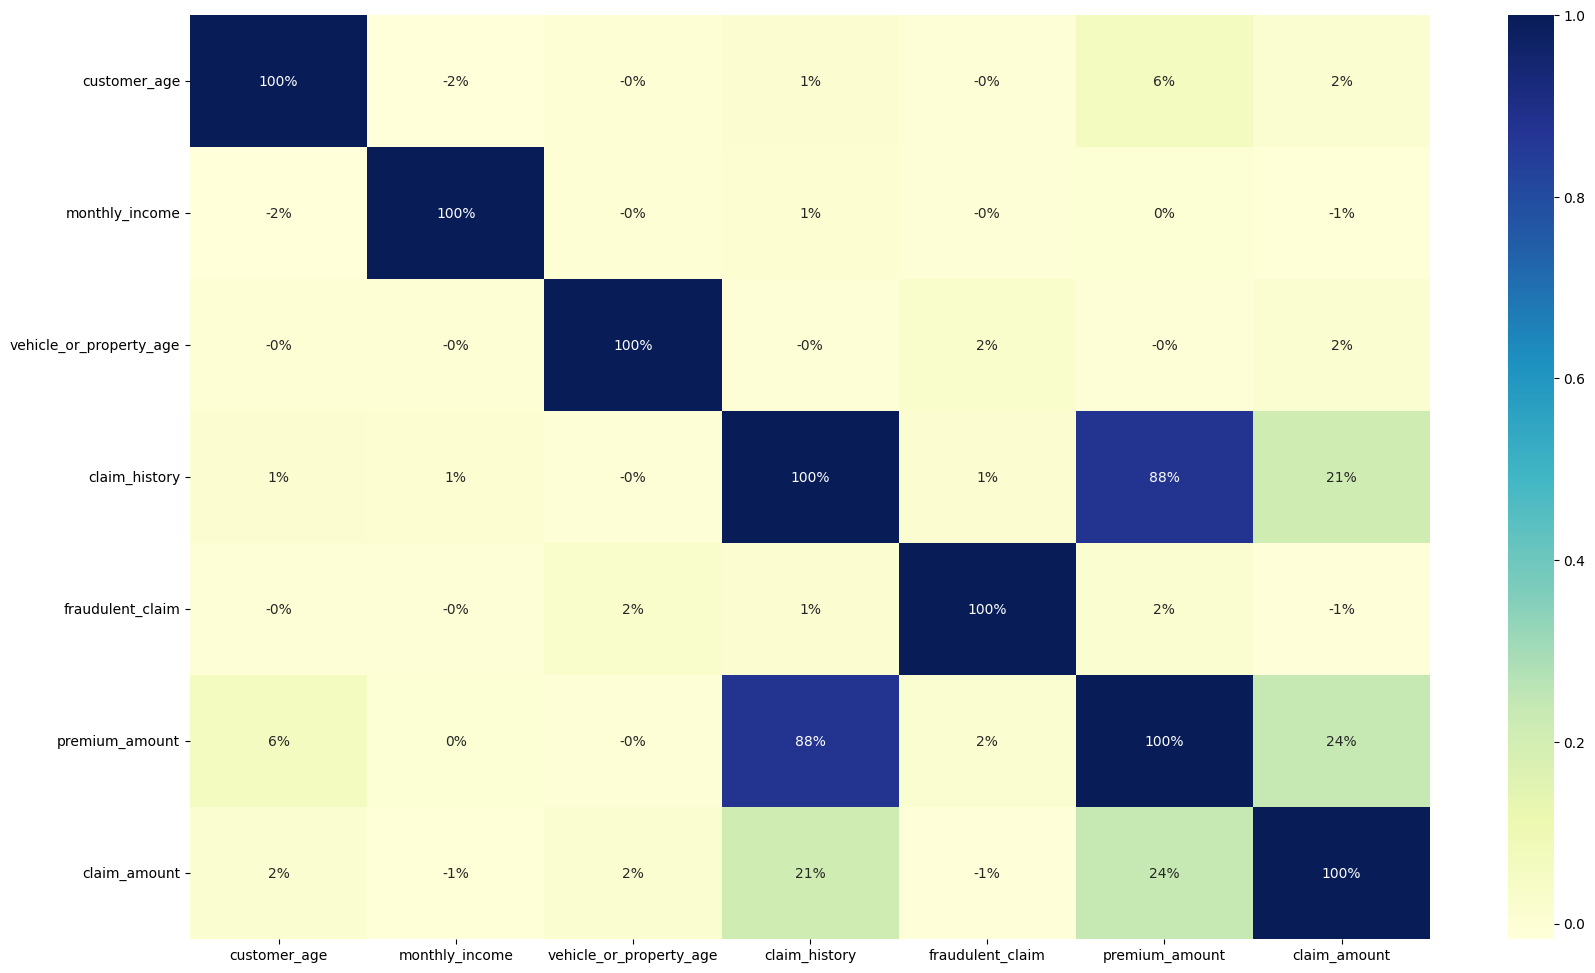

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df[numerical_cols].corr(),annot=True,fmt='.0%', cmap='YlGnBu')

1. (0.88) Strong positive correlation – more claim history -> higher premiums. (risk-based pricing)
2. (0.25) Some influence — more premium amount -> higher current claim amount.
3. (0.23) Some influence — more past claim history -> higher current claim amount.

### **Encoding**

In [ ]:
# Ordinal Encoding (Label encoding)

risk_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['risk_score'] = df['risk_score'].str.lower().map(risk_mapping)
df.head()

customer_age  gender policy_type  monthly_income  vehicle_or_property_age  \
0            45    Male    Property        57926.04                        6   
1            52    Male        Auto        52957.88                        6   
2            27  Female        Auto        64713.71                        3   
3            33    Male        Life        50990.42                        4   
4            24  Female        Life        76379.88                       10   

   claim_history  fraudulent_claim  premium_amount  claim_amount  risk_score  
0              0                 0         1100.36        719.87           0  
1              0                 0         1038.41       1483.60           0  
2              2                 0         1127.81       2247.89           0  
3              1                 0         1086.71       3012.94           0  
4              0                 1         1072.40       2710.86           1

In [ ]:
# one hot encoding

df= pd.get_dummies(df, columns=['gender', 'policy_type'])
df.head()

customer_age  monthly_income  vehicle_or_property_age  claim_history  \
0            45        57926.04                        6              0   
1            52        52957.88                        6              0   
2            27        64713.71                        3              2   
3            33        50990.42                        4              1   
4            24        76379.88                       10              0   

   fraudulent_claim  premium_amount  claim_amount  risk_score  gender_Female  \
0                 0         1100.36        719.87           0          False   
1                 0         1038.41       1483.60           0          False   
2                 0         1127.81       2247.89           0           True   
3                 0         1086.71       3012.94           0          False   
4                 1         1072.40       2710.86           1           True   

   gender_Male  gender_Other  policy_type_Auto  policy_type_Health  \
0         True         False             False               False   
1         True         False              True               False   
2        False         False              True               False   
3         True         False             False               False   
4        False         False             False               False   

   policy_type_Life  policy_type_Property  
0             False                  True  
1             False                 False  
2             False                 False  
3              True                 False  
4              True                 False

### **Train Test Split**

In [ ]:
x=df.drop(columns=["claim_amount"])
y=df["claim_amount"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### **Feature Scaling**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### **Regression- MACHINE LEARNING**

####  Logistic Regression

In [ ]:
lr = LinearRegression()

# Train the model
lr.fit(x_train, y_train)
train_score = lr.score(x_train, y_train)

# Pred
y_pred = lr.predict(x_test)

print(f"Linear Regression Performance","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Linear Regression Performance 

Train R² Score: 0.3141689409700973
MAE: 577.3218376027975
RMSE: 702.4672857170158
R² Score: 0.3008637038896764


In [ ]:
cv_scores = cross_val_score(lr, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.31135053 0.30408266 0.31051716 0.31317563 0.31151714]
Average R²: 0.3101286257736218


In [ ]:
lr = LinearRegression()

# Grid of hyperparameters
param_grid = {
    'fit_intercept': [True, False],
    'positive': [False, True]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(lr, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

Best Params: {'fit_intercept': True, 'positive': False}
Best Cross-Validation R²: 0.31095569510715687


####  Ridge Regression (L2 Regularization)

In [ ]:
rl2 = Ridge(alpha=1.0, fit_intercept= True, solver= 'svd')

# Train the model
rl2.fit(x_train, y_train)
train_score = rl2.score(x_train, y_train)

# Pred
y_pred = rl2.predict(x_test)

print("Ridge Regression (L2) Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Ridge Regression (L2) Performance: 

Train R² Score: 0.31416887101818236
MAE: 577.3298677393286
RMSE: 702.4644668773454
R² Score: 0.30086931482476875


In [ ]:
cv_scores = cross_val_score(rl2, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.31131657 0.3041182  0.31051489 0.3131351  0.31156125]
Average R²: 0.3101292007602435


In [ ]:
# Define hyperparameter grid
rl2 = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

# Step 5: Grid search with 5-fold cross-validation
grid = GridSearchCV(rl2, param_grid, cv=5, scoring='r2',  n_jobs=-1)
grid.fit(x_train, y_train)

# Step 6: Evaluate best model
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation R² Score:", grid.best_score_)

Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'solver': 'auto'}
Best Cross-Validation R² Score: 0.31095627127131314


####  Lasso (L1 regularization)

In [ ]:
l1 = Lasso(alpha=1, fit_intercept = True)

# Train the model
l1.fit(x_train, y_train)
train_score = l1.score(x_train, y_train)

# Pred
y_pred = l1.predict(x_test)
print("Lasso Regression (L1) Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Lasso Regression (L1) Performance: 

Train R² Score: 0.31411828350890203
MAE: 577.3112046537767
RMSE: 702.3034057625
R² Score: 0.3011898715620831


In [ ]:
cv_scores = cross_val_score(l1, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.31077356 0.30461296 0.31035833 0.31273024 0.31211297]
Average R²: 0.31011761273862015


In [ ]:
l1 = Lasso(alpha=0.1, max_iter=10000)

# Step 4: Grid search parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False]
}

# Step 5: GridSearchCV
grid = GridSearchCV(l1, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

# Step 6: Best model info
print("✅ Best Hyperparameters:", grid.best_params_)
print("✅ Best Cross-Validation R² Score:", grid.best_score_)

✅ Best Hyperparameters: {'alpha': 1, 'fit_intercept': True}
✅ Best Cross-Validation R² Score: 0.3109778430126341


####  ElasticNet (L1 + L2)

In [ ]:
el = ElasticNet(max_iter=10000, alpha=0.01, fit_intercept=True, l1_ratio=0.9)

# Train the model
el.fit(x_train, y_train)
train_score = el.score(x_train, y_train)

# Pred
y_pred = el.predict(x_test)

print("ElasticNet (L1 + L2) Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

ElasticNet (L1 + L2) Performance: 

Train R² Score: 0.3141642685933438
MAE: 577.388862877993
RMSE: 702.4453672836667
R² Score: 0.300907332208176


In [ ]:
cv_scores = cross_val_score(el, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.31102736 0.30431873 0.3104533  0.31279943 0.31182084]
Average R²: 0.3100839313235336


In [ ]:
elastic = ElasticNet(max_iter=10000)

param_grid = {
    'alpha': [0.01, 0.1, 1, 10],          # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9],              # Mix of L1 (lasso) and L2 (ridge)
    'fit_intercept': [True, False]
}

# Step 5: Grid search
grid = GridSearchCV(elastic, param_grid, cv=5, scoring='r2', verbose=1)
grid.fit(x_train, y_train)

# Step 6: Best parameters
print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Cross-Val R² Score:", grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Best Parameters: {'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.9}
✅ Best Cross-Val R² Score: 0.3109560671541885


####  Support Vector Regression

In [ ]:
svr = SVR(C=100, epsilon=5, gamma='auto', kernel='rbf')

# Train the model
svr.fit(x_train, y_train)
train_score = svr.score(x_train, y_train)

# Pred
y_pred = svr.predict(x_test)

print("Support Vector Regression Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Support Vector Regression Performance: 

Train R² Score: 0.36107722197521464
MAE: 565.1240604773989
RMSE: 691.5897219843779
R² Score: 0.3223480337838307


In [ ]:
cv_scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [-3.80717473e-03 -4.02204151e-03 -2.97111014e-03  9.42670716e-05
 -9.69296704e-04]
Average R²: -0.0023350712032074615


In [ ]:
# Define hyperparameter grid
svr = SVR()

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100],         # Regularization
    'epsilon': [0.1, 1, 5],    # Epsilon-tube
    'gamma': ['scale', 'auto'] # Only used with RBF
}

# Step 5: Grid search with 5-fold cross-validation
grid = GridSearchCV(svr, param_grid, cv=5, scoring='r2',  verbose=1, n_jobs=-1)
grid.fit(x_train, y_train)

# Step 6: Evaluate best model
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation R² Score:", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'C': 100, 'epsilon': 5, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation R² Score: 0.32593390099850833


####  Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor(random_state=42, max_depth= 5, min_samples_leaf= 2, min_samples_split= 10)

# Train the model
dt.fit(x_train, y_train)
train_score = dt.score(x_train, y_train)

# Pred
y_pred = dt.predict(x_test)

print("Decision Tree Regressor Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Decision Tree Regressor Performance: 

Train R² Score: 0.3573977159369428
MAE: 557.5491312980892
RMSE: 684.0150252630868
R² Score: 0.337110827691556


In [ ]:
cv_scores = cross_val_score(dt, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.31788904 0.33025118 0.34542392 0.34209648 0.34337004]
Average R²: 0.33580613230751544


In [ ]:
# Define hyperparameter grid
dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 5: Grid search with 5-fold cross-validation
grid = GridSearchCV(dt, param_grid, cv=5, scoring='r2',  n_jobs=-1)
grid.fit(x_train, y_train)

# Step 6: Evaluate best model
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation R² Score:", grid.best_score_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation R² Score: 0.32281422736229415


####  Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(random_state=42, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

# Train the model
rf.fit(x_train, y_train)
train_score = rf.score(x_train, y_train)

# Pred
y_pred = rf.predict(x_test)

print("Random Forest Regressor Performance:","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Random Forest Regressor Performance: 

Train R² Score: 0.5391523468666295
MAE: 546.052121183838
RMSE: 665.8587434138483
R² Score: 0.37183482515958777


In [ ]:
cv_scores = cross_val_score(rf, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.37431626 0.38015697 0.38382936 0.37246527 0.38235683]
Average R²: 0.3786249386430653


In [ ]:
# Define hyperparameter grid
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Step 5: Grid search with 5-fold cross-validation
grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2',  n_jobs=-1)
grid.fit(x_train, y_train)

# Step 6: Evaluate best model
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation R² Score:", grid.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation R² Score: 0.37543330949757114


####  Gradient Boosting Regressor

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.1, max_depth=3, min_samples_leaf=1,
                                min_samples_split=5, n_estimators=100)

# Train the model
gbr.fit(x_train, y_train)
train_score = gbr.score(x_train, y_train)

# Pred
y_pred = gbr.predict(x_test)

print("Gradient Boosting Regressor Performance","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Gradient Boosting Regressor Performance 

Train R² Score: 0.4135259686011117
MAE: 543.9179869539281
RMSE: 662.8932457896079
R² Score: 0.3774176133364857


In [ ]:
cv_scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.38834843 0.38326684 0.38764619 0.38171164 0.38218436]
Average R²: 0.3846314912950823


In [ ]:
gbr = GradientBoostingRegressor(random_state=42)

# Grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(gbr, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation R²: 0.38614185902360043


####  XGBoost Regressor

In [ ]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate=0.1,
                   max_depth=3, n_estimators=100, subsample=1)

# Train the model
xgb.fit(x_train, y_train)
train_score = xgb.score(x_train, y_train)

# Pred
y_pred = xgb.predict(x_test)

print("XGBoost Regressor Performance","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

XGBoost Regressor Performance 

Train R² Score: 0.4098859566304853
MAE: 543.651567779541
RMSE: 661.5724417000218
R² Score: 0.379896112396668


In [ ]:
cv_scores = cross_val_score(xgb, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [0.38880359 0.38302341 0.38855868 0.38359167 0.3827456 ]
Average R²: 0.38534459298822316


In [ ]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation R²: 0.387812608444737


####  K-Nearest Neighbors Regression (KNNRegressor)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=11, p=1, weights='distance')

# Train the model
knn.fit(x_train, y_train)
train_score = knn.score(x_train, y_train)

# Pred
y_pred = knn.predict(x_test)

print("KNN Regressor Performance","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

KNN Regressor Performance 

Train R² Score: 1.0
MAE: 584.8553803741688
RMSE: 719.5977298677226
R² Score: 0.2663495113366714


In [ ]:
cv_scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

R² scores: [-0.04765195 -0.0181914  -0.0591835  -0.06533231 -0.057548  ]
Average R²: -0.04958143210870607


In [ ]:
knn = KNeighborsRegressor()

# Grid of hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation R²: 0.28469095936306565


####  LightGBM

In [ ]:
lgbm = LGBMRegressor(random_state=42, learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=15)

# Train the model
lgbm.fit(x_train, y_train)
train_score = lgbm.score(x_train, y_train)

# Pred
y_pred = lgbm.predict(x_test)

print("LightGBM Regressor Performance","\n")

print("Train R² Score:", train_score)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 14
[LightGBM] [Info] Start training from score 1980.813813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
cv_scores = cross_val_score(lgbm, x, y, cv=5, scoring='r2')
print("R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 14
[LightGBM] [Info] Start training from score 1981.729979
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
lgbm = LGBMRegressor(random_state=42)

# Grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 50]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(lgbm, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best Cross-Validation R²:", grid.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 14
[LightGBM] [Info] Start training from score 1980.813813
Best Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'num_leaves': 15}
Best Cross-Validation R²: 0.3875876388580451


### **Regression - DEEP LEARNING**

In [ ]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

####  DL - 1

In [ ]:
# Build the deep learning model
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Regression → linear activation

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', rmse])

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model
y_pred = model.predict(x_test).flatten()

print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))



Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4219823.0000 - mae: 1855.9064 - rmse: 2033.0189 - val_loss: 657419.1875 - val_mae: 681.1462 - val_rmse: 806.1311
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 724761.1875 - mae: 709.3408 - rmse: 846.2863 - val_loss: 573704.3750 - val_mae: 639.1804 - val_rmse: 753.8035
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 629965.8125 - mae: 660.2450 - rmse: 789.0063 - val_loss: 547341.0000 - val_mae: 619.5243 - val_rmse: 736.3844
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 592201.4375 - mae: 632.7811 - rmse: 766.3388 - val_loss: 524110.7500 - val_mae: 601.7488 - val_rmse: 720.7946
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 593174.0000 - mae: 635.9728 - rmse: 765.1582 - val_loss: 518483.3125 - val_mae: 597.3093 - val_rmse: 716.9355
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 593775.9375 - mae: 632.0986 - rmse: 764.7570 - val_loss: 514534.2500 - val_mae: 5

####  DL - 2

In [ ]:
# Build the deep learning model
model_1 = Sequential()
model_1.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.3))
model_1.add(Dense(128, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.3))
model_1.add(Dense(64, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.3))
model_1.add(Dense(32, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation='linear'))  # Regression → linear activation

# Compile the model
model_1.compile(optimizer='adam', loss='mse', metrics=['mae', rmse])

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)


history = model_1.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate the model
y_pred = model_1.predict(x_test).flatten()

print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4646269.0000 - mae: 1976.7847 - rmse: 2149.8972 - val_loss: 4713023.5000 - val_mae: 1987.0027 - val_rmse: 2164.8838 - learning_rate: 0.0010
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4629871.0000 - mae: 1976.2966 - rmse: 2147.7812 - val_loss: 4663407.0000 - val_mae: 1980.4650 - val_rmse: 2153.7112 - learning_rate: 0.0010
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4545825.0000 - mae: 1958.5363 - rmse: 2127.1670 - val_loss: 4592651.5000 - val_mae: 1968.7010 - val_rmse: 2137.5354 - learning_rate: 0.0010
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4554436.0000 - mae: 1969.0217 - rmse: 2126.9514 - val_loss: 4486808.0000 - val_mae: 1947.8508 - val_rmse: 2112.9302 - learning_rate: 0.0010
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4308803.0000 - mae: 1912.4285 - rmse: 2071.2168 - val_loss: 4365222.5000 - val_mae: 1924.8627 - val_rmse: 2084.4343 - learning_rate: 0.

####  DL - 3

In [ ]:
# Build the deep learning model
model_2 = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')]) # Regression → linear activation

# Compile the model
optimizer = Adam(learning_rate=0.001)

model_2.compile(optimizer=optimizer, loss='mse', metrics=['mae', rmse])



# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)


history = model_2.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate the model
y_pred = model_2.predict(x_test).flatten()

print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4604579.5000 - mae: 1968.0742 - rmse: 2140.4028 - val_loss: 4716651.5000 - val_mae: 1987.8916 - val_rmse: 2165.7163 - learning_rate: 0.0010
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4688620.0000 - mae: 1989.0258 - rmse: 2159.6897 - val_loss: 4652111.5000 - val_mae: 1977.7756 - val_rmse: 2151.0823 - learning_rate: 0.0010
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4588088.5000 - mae: 1970.7119 - rmse: 2136.0208 - val_loss: 4601747.5000 - val_mae: 1970.4731 - val_rmse: 2139.6274 - learning_rate: 0.0010
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4471069.5000 - mae: 1945.0829 - rmse: 2109.0278 - val_loss: 4469864.5000 - val_mae: 1943.5095 - val_rmse: 2108.9749 - learning_rate: 0.0010
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4300715.0000 - mae: 1912.7631 - rmse: 2068.0237 - val_loss: 4364139.0000 - val_mae: 1923.2039 - val_rmse: 2084.0349 - learning_rate: 0.

####  DL - 4

In [ ]:
# Build the deep learning model
model_3 = Sequential([
    Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')]) # Regression → linear activation


# Compile the model
optimizer = Adam(learning_rate=0.001)
model_3.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

history = model_3.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate the model
y_pred = model_3.predict(x_test).flatten()

print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 4666944.0000 - mae: 1983.5425 - val_loss: 4707196.5000 - val_mae: 1985.7037 - learning_rate: 0.0010
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 4682073.0000 - mae: 1989.8861 - val_loss: 4689672.0000 - val_mae: 1987.5264 - learning_rate: 0.0010
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4619238.5000 - mae: 1974.8292 - val_loss: 4608292.0000 - val_mae: 1973.5330 - learning_rate: 0.0010
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4421269.0000 - mae: 1931.8534 - val_loss: 4498047.5000 - val_mae: 1950.2466 - learning_rate: 0.0010
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4308293.0000 - mae: 1911.2244 - val_loss: 4379521.0000 - val_mae: 1928.1106 - learning_rate: 0.0010
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4277681.0000 - mae: 1910.8055 - val_loss: 4255712.5000 - val_mae: 1901.9591 - learning_rate: 0.0010
Epoch 7/200
200/200 ━━━━━━━━━━━━

In [ ]:
## Build the improved model
model_3_improved = Sequential([
    Dense(512, kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')  # Output layer for regression
])

# Compile
optimizer = Adam(learning_rate=0.001)
model_3_improved.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

# Train
history = model_3_improved.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate
y_pred = model_3_improved.predict(x_test).flatten()

print("\nDeep Learning Regression Performance (Improved Model 4):")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 4563656.0000 - mae: 1959.0048 - val_loss: 4704551.5000 - val_mae: 1985.8214 - learning_rate: 0.0010
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4646174.5000 - mae: 1978.4493 - val_loss: 4657727.5000 - val_mae: 1979.7823 - learning_rate: 0.0010
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 4598950.5000 - mae: 1977.2811 - val_loss: 4580990.0000 - val_mae: 1965.7178 - learning_rate: 0.0010
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4585116.0000 - mae: 1972.7271 - val_loss: 4448308.0000 - val_mae: 1940.7122 - learning_rate: 0.0010
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4435213.0000 - mae: 1942.0605 - val_loss: 4312456.5000 - val_mae: 1914.4263 - learning_rate: 0.0010
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4362434.0000 - mae: 1927.3274 - val_loss: 4184453.5000 - val_mae: 1888.5576 - learning_rate: 0.0010
Epoch 7/200
200/200 ━━━━━━━━━━━

In [ ]:
# Build the improved model
model_3_improved1 = Sequential([
    Dense(512, kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')  # Output layer for regression
])

# Compile
optimizer = Adam(learning_rate=0.001)
model_3_improved1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

# Train
history = model_3_improved1.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate
y_pred = model_3_improved1.predict(x_test).flatten()

print("\nDeep Learning Regression Performance (Improved Model 4):")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 4658358.5000 - mae: 1980.9242 - val_loss: 4713672.5000 - val_mae: 1987.9664 - learning_rate: 0.0010
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4672370.5000 - mae: 1988.6062 - val_loss: 4664945.5000 - val_mae: 1982.0892 - learning_rate: 0.0010
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4569714.5000 - mae: 1962.9861 - val_loss: 4562274.0000 - val_mae: 1963.8704 - learning_rate: 0.0010
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 4467591.5000 - mae: 1945.7738 - val_loss: 4477220.0000 - val_mae: 1947.1617 - learning_rate: 0.0010
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4398054.5000 - mae: 1935.0330 - val_loss: 4335764.0000 - val_mae: 1919.0073 - learning_rate: 0.0010
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4233790.5000 - mae: 1899.9902 - val_loss: 4182563.2500 - val_mae: 1884.9999 - learning_rate: 0.0010
Epoch 7/200
200/200 ━━━━━━━━━━━━━

####  DL - 5

In [ ]:
# Build the deep learning model
model_4 = Sequential([
    Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')]) # Regression → linear activation


# Compile the model
optimizer = RMSprop(learning_rate=0.0005)
model_4.compile(optimizer=optimizer, loss='mse', metrics=['mae', rmse])

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

history = model_4.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate the model
y_pred = model_4.predict(x_test).flatten()

print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 4670090.5000 - mae: 1985.3607 - rmse: 2156.3677 - val_loss: 4727767.5000 - val_mae: 1989.3683 - val_rmse: 2168.2146 - learning_rate: 5.0000e-04
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 4608174.5000 - mae: 1966.0660 - rmse: 2140.5159 - val_loss: 4715030.5000 - val_mae: 1988.2214 - val_rmse: 2165.3770 - learning_rate: 5.0000e-04
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 4653646.0000 - mae: 1985.5063 - rmse: 2152.2698 - val_loss: 4702765.5000 - val_mae: 1986.9139 - val_rmse: 2162.6384 - learning_rate: 5.0000e-04
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4644504.0000 - mae: 1982.0837 - rmse: 2150.7739 - val_loss: 4682094.0000 - val_mae: 1983.2493 - val_rmse: 2157.9385 - learning_rate: 5.0000e-04
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4591102.0000 - mae: 1971.1776 - rmse: 2137.3987 - val_loss: 4664761.0000 - val_mae: 1980.1350 - val_rmse: 2153.9924

####  DL - 6

In [ ]:
#log-transform the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [ ]:
# Build the deep learning model
model_5 = Sequential([
    Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')]) # Regression → linear activation


# Compile the model
optimizer = RMSprop(learning_rate=0.0005)
model_5.compile(optimizer=optimizer, loss='mse', metrics=['mae', rmse])

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

history = model_5.fit(
    x_train, y_train_log,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Predict and inverse transform the target
y_pred_log = model_5.predict(x_test).flatten()

# Handle bad predictions: clip upper bound to prevent overflow
y_pred_log = np.clip(y_pred_log, a_min=None, a_max=15)  # np.expm1(15) ≈ 3.2e6
y_pred = np.expm1(y_pred_log)


y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test_log)

# Evaluation
print("\nDeep Learning Regression Performance:")
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("R² Score:", r2_score(y_true, y_pred))

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 54.4626 - mae: 7.2455 - rmse: 7.3755 - val_loss: 41.2772 - val_mae: 6.4029 - val_rmse: 6.4242 - learning_rate: 5.0000e-04
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 41.0838 - mae: 6.2725 - rmse: 6.4022 - val_loss: 28.3396 - val_mae: 5.2799 - val_rmse: 5.3223 - learning_rate: 5.0000e-04
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 24.5693 - mae: 4.7370 - rmse: 4.9392 - val_loss: 12.2670 - val_mae: 3.4288 - val_rmse: 3.5006 - learning_rate: 5.0000e-04
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.7661 - mae: 2.7400 - rmse: 3.0894 - val_loss: 2.0113 - val_mae: 1.2708 - val_rmse: 1.4148 - learning_rate: 5.0000e-04
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.3047 - mae: 1.4123 - rmse: 1.7940 - val_loss: 0.4522 - val_mae: 0.5519 - val_rmse: 0.6693 - learning_rate: 5.0000e-04
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3514 - mae: 1.1847 - rmse

####  ML & DL - 7 (compare)

In [ ]:
# α controls how much weight to give to ML vs DL (try 0.5 first)
alpha = 0.5

y_pred_ml = gbr.predict(x_test)
y_pred_dl = model_3_improved.predict(x_test).flatten()

# Blended predictions
y_pred_blend = alpha * y_pred_ml + (1 - alpha) * y_pred_dl

# Evaluate
print("\nBlended Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_blend))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_blend)))
print("R² Score:", r2_score(y_test, y_pred_blend))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Blended Model Performance:
MAE: 541.3413612657524
RMSE: 660.9017347863263
R² Score: 0.3811528066395826


In [ ]:
best_alpha = 0
best_r2 = -np.inf

for alpha in np.arange(0, 1.05, 0.05):
    y_blend = alpha * y_pred_ml + (1 - alpha) * y_pred_dl
    r2 = r2_score(y_test, y_blend)
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha

print(f"\n✅ Best alpha: {best_alpha}")
print(f"Best Blended R² Score: {best_r2}")


✅ Best alpha: 0.65
Best Blended R² Score: 0.3817632706139461


In [ ]:
## α controls how much weight to give to ML vs DL (try 0.65)
alpha = 0.65

y_pred_ml = gbr.predict(x_test)
y_pred_dl = model_3_improved.predict(x_test).flatten()

# Blended predictions
y_pred_blend_1 = alpha * y_pred_ml + (1 - alpha) * y_pred_dl

# Evaluate
print("\nBlended Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_blend_1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_blend_1)))
print("R² Score:", r2_score(y_test, y_pred_blend_1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Blended Model Performance:
MAE: 541.563486223551
RMSE: 660.5756801568573
R² Score: 0.3817632702177952


### **Regression- Best Model**

In [ ]:
print("Gradient Boosting, LightGBM, XGBoost, Random Forest")

In [ ]:
print("model_3_improved") ## dl-4, ml & dl-7

### **Regression- Manual Testing**

In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[45,57926,6,0,0,1100,0,True,False,False,True,False,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
prediction = gbr.predict(new_customer_scaled)

print(f"The claim amount (ML) is Rs {prediction[0]:.2f}")

prediction_dl = model_3_improved.predict(new_customer_scaled).flatten()
print("DL Prediction: ₹",prediction_dl[0])

alpha = 0.65
prediction_blend = alpha * y_pred_ml + (1 - alpha) * y_pred_dl

print("Blended Prediction: ₹",prediction_blend[0])

The claim amount (ML) is Rs 1525.74
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
DL Prediction: ₹ 1515.5978
Blended Prediction: ₹ 1736.9831380018425


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[49,41687,5,1,1,1014,2,True,False,False,False,False,False,True]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)
prediction = gbr.predict(new_customer_scaled)


print(f"The claim amount (ML) is Rs {prediction[0]:.2f}")

prediction_dl = model_3_improved.predict(new_customer_scaled).flatten()
print("DL Prediction: ₹",prediction_dl[0])

alpha = 0.65
prediction_blend = alpha * y_pred_ml + (1 - alpha) * y_pred_dl

print("Blended Prediction: ₹",prediction_blend[0])


The claim amount (ML) is Rs 2786.40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
DL Prediction: ₹ 2800.3535
Blended Prediction: ₹ 1736.9831380018425


### **Regression - Save the model and scaler**

#### Save the model

In [ ]:
# Save Gradient Boosting Regressor (ML model)
with open('claim_amount_reg_gbr_model.pkl', 'wb') as f:
    pickle.dump(gbr, f)

# Save alpha value
with open('claim_amount_reg_alpha_value.pkl', 'wb') as f:
    pickle.dump(alpha, f)

# Save HDF5 format (.h5)
model_3_improved.save('claim_amount_reg_deep_model_3_improved.h5')

In [ ]:
# Save HDF5 format (.keras)
model_3_improved.save("claim_amount_reg_deep_model_3_improved.keras")

In [ ]:
with open('scaler_claim_reg.pkl', 'wb') as f:
    pickle.dump(scaler, f)

#### download the model

In [ ]:
files.download('claim_amount_reg_gbr_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('claim_amount_reg_alpha_value.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# files.download('claim_amount_reg_deep_model_3_improved.h5')

In [ ]:
files.download("claim_amount_reg_deep_model_3_improved.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('scaler_claim_reg.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Regression - Open and use it**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import pickle

In [ ]:
uploaded = files.upload()

Saving claim_amount_reg_alpha_value.pkl to claim_amount_reg_alpha_value.pkl
Saving claim_amount_reg_deep_model_3_improved.h5 to claim_amount_reg_deep_model_3_improved.h5
Saving claim_amount_reg_deep_model_3_improved.keras to claim_amount_reg_deep_model_3_improved.keras
Saving claim_amount_reg_gbr_model.pkl to claim_amount_reg_gbr_model.pkl
Saving scaler_claim_reg.pkl to scaler_claim_reg.pkl


In [ ]:
#from keras.losses import MeanSquaredError
#loss=MeanSquaredError()

In [ ]:
# loaded_model_dl = load_model("claim_amount_reg_deep_model_3_improved.h5", custom_objects={'LeakyReLU': LeakyReLU})

In [ ]:
with open("claim_amount_reg_gbr_model.pkl", "rb") as file:
    loaded_model_gbr = pickle.load(file)

In [ ]:
# Load from .h5 or .keras file
loaded_model_dl = load_model("claim_amount_reg_deep_model_3_improved.keras", custom_objects={'LeakyReLU': LeakyReLU})

In [ ]:
with open("claim_amount_reg_alpha_value.pkl", "rb") as file:
    loaded_model_alpha = pickle.load(file)

In [ ]:
with open("scaler_claim_reg.pkl", "rb") as file:
    scaler= pickle.load(file)

In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[45,57926.04,6,0,0,1100.36,0,True,False,False,True,False,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

In [ ]:
y_pred_ml = loaded_model_gbr.predict(new_customer_scaled)
print("ML Prediction: ₹",y_pred_ml[0])

ML Prediction: ₹ 1919.8298008190013


In [ ]:
y_pred_dl = loaded_model_dl.predict(new_customer_scaled).flatten()
print("DL Prediction: ₹",y_pred_dl[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
DL Prediction: ₹ 1487.2373


In [ ]:
alpha = loaded_model_alpha
y_pred_blend = alpha * y_pred_ml + (1 - alpha) * y_pred_dl

print("Blended Prediction: ₹",y_pred_blend[0])

Blended Prediction: ₹ 1790.0520641865821


In [ ]:
 def predict_claim(customer_input, scaler, gbr_model, dl_model, alpha):
    customer_input = np.array(customer_input).reshape(1, -1)
    scaled_input = scaler.transform(customer_input)

    pred_ml = gbr_model.predict(customer_input)[0]
    pred_dl = dl_model.predict(scaled_input).flatten()[0]
    blended_pred = alpha * pred_ml + (1 - alpha) * pred_dl

    return {
        "ML Prediction": pred_ml,
        "DL Prediction": pred_dl,
        "Blended Prediction": blended_pred
    }

# Example usage:
customer_data = [33,50996,6,0,0,964,0,False,True,False,False,True,False,False]  # must match feature order
result = predict_claim(customer_data, scaler, loaded_model_gbr, loaded_model_dl, loaded_model_alpha)

for k, v in result.items():
    print(f"{k}: ₹{v:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
ML Prediction: ₹2223.58
DL Prediction: ₹1702.96
Blended Prediction: ₹2067.39


## **CLASSIFICATION - Fraudulent Claim**

### **Upload and load dataset**

In [ ]:
# upload the data

uploaded = files.upload()

Saving claim_base_data.csv to claim_base_data.csv
Saving insurance_class_reg_data.csv to insurance_class_reg_data.csv


In [ ]:
# Create an empty dictionary to store dataframes
dataframes = {}

# Load each file into a separate DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    dataframes[file_name] = df
    print(f"Dataset '{file_name}' uploaded successfully!")

Dataset 'claim_base_data.csv' uploaded successfully!
Dataset 'insurance_class_reg_data.csv' uploaded successfully!


In [ ]:
df = dataframes["insurance_class_reg_data.csv"]

In [ ]:
df_1 = dataframes["claim_base_data.csv"]

### **Data Cleaning**

In [ ]:
df.head()

Customer_ID  Policy_ID  Customer_Age  Gender Policy_Type  Monthly_Income  \
0  CUST100000  POL100000            45    Male    Property        57926.04   
1  CUST100001  POL100001            52    Male        Auto        52957.88   
2  CUST100002  POL100002            27  Female        Auto        64713.71   
3  CUST100003  POL100003            33    Male        Life        50990.42   
4  CUST100004  POL100004            24  Female        Life        76379.88   

   Vehicle_or_Property_Age  Claim_History  Fraudulent_Claim  Premium_Amount  \
0                        6              0                 0         1100.36   
1                        6              0                 0         1038.41   
2                        3              2                 0         1127.81   
3                        4              1                 0         1086.71   
4                       10              0                 1         1072.40   

   Claim_Amount Risk_Score Location  Policy_Upgrade  
0        719.87        Low  Chicago               1  
1       1483.60        Low  Chicago               0  
2       2247.89        Low  Chicago               0  
3       3012.94        Low  Houston               0  
4       2710.86     Medium  Houston               0

In [ ]:
df_1.head()

Claim_ID Policyholder_ID  Claim_Date
0  CLM100000      CUST101824  2024-09-04
1  CLM100001      CUST100409  2023-08-23
2  CLM100002      CUST104506  2023-05-20
3  CLM100003      CUST104012  2023-06-07
4  CLM100004      CUST103657  2024-12-24

In [ ]:
df.shape

(10000, 14)

In [ ]:
df_1.shape

(6000, 3)

In [ ]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['customer_id', 'policy_id', 'customer_age', 'gender', 'policy_type',
       'monthly_income', 'vehicle_or_property_age', 'claim_history',
       'fraudulent_claim', 'premium_amount', 'claim_amount', 'risk_score',
       'location', 'policy_upgrade'],
      dtype='object')

In [ ]:
df_1.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_1.columns

Index(['claim_id', 'policyholder_id', 'claim_date'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              10000 non-null  object 
 1   policy_id                10000 non-null  object 
 2   customer_age             10000 non-null  int64  
 3   gender                   10000 non-null  object 
 4   policy_type              10000 non-null  object 
 5   monthly_income           10000 non-null  float64
 6   vehicle_or_property_age  10000 non-null  int64  
 7   claim_history            10000 non-null  int64  
 8   fraudulent_claim         10000 non-null  int64  
 9   premium_amount           10000 non-null  float64
 10  claim_amount             10000 non-null  float64
 11  risk_score               10000 non-null  object 
 12  location                 10000 non-null  object 
 13  policy_upgrade           10000 non-null  int64  
dtypes: float64(3), int64(5)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   claim_id         6000 non-null   object
 1   policyholder_id  6000 non-null   object
 2   claim_date       6000 non-null   object
dtypes: object(3)
memory usage: 140.8+ KB


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df_1.duplicated().sum())

0


In [ ]:
df.isnull().sum()

customer_id                0
policy_id                  0
customer_age               0
gender                     0
policy_type                0
monthly_income             0
vehicle_or_property_age    0
claim_history              0
fraudulent_claim           0
premium_amount             0
claim_amount               0
risk_score                 0
location                   0
policy_upgrade             0
dtype: int64

In [ ]:
df_1.isnull().sum()

claim_id           0
policyholder_id    0
claim_date         0
dtype: int64

In [ ]:
print("df columns:", df.columns.tolist())
print("df_1 columns:", df_1.columns.tolist())

df columns: ['customer_id', 'policy_id', 'customer_age', 'gender', 'policy_type', 'monthly_income', 'vehicle_or_property_age', 'claim_history', 'fraudulent_claim', 'premium_amount', 'claim_amount', 'risk_score', 'location', 'policy_upgrade']
df_1 columns: ['claim_id', 'policyholder_id', 'claim_date']


In [ ]:
df_combined=pd.merge(df_1,df, left_on="policyholder_id", right_on="customer_id", how="right")
df_combined.drop(columns=["policyholder_id"], inplace=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11484 entries, 0 to 11483
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              11484 non-null  object 
 3   policy_id                11484 non-null  object 
 4   customer_age             11484 non-null  int64  
 5   gender                   11484 non-null  object 
 6   policy_type              11484 non-null  object 
 7   monthly_income           11484 non-null  float64
 8   vehicle_or_property_age  11484 non-null  int64  
 9   claim_history            11484 non-null  int64  
 10  fraudulent_claim         11484 non-null  int64  
 11  premium_amount           11484 non-null  float64
 12  claim_amount             11484 non-null  float64
 13  risk_score               11484 non-null  object 
 14  location              

In [ ]:
df_combined.to_csv("insurance_af_fraud.csv", index=False)

In [ ]:
files.download('insurance_af_fraud.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_combined['customer_id'].value_counts()

customer_id
CUST104067    5
CUST109383    5
CUST109977    5
CUST106939    5
CUST106609    5
             ..
CUST103527    1
CUST103528    1
CUST103529    1
CUST103530    1
CUST103518    1
Name: count, Length: 10000, dtype: int64

In [ ]:
data=pd.merge(df_1,df, left_on="policyholder_id", right_on="customer_id", how="left")
data.drop(columns=["policyholder_id"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              6000 non-null   object 
 3   policy_id                6000 non-null   object 
 4   customer_age             6000 non-null   int64  
 5   gender                   6000 non-null   object 
 6   policy_type              6000 non-null   object 
 7   monthly_income           6000 non-null   float64
 8   vehicle_or_property_age  6000 non-null   int64  
 9   claim_history            6000 non-null   int64  
 10  fraudulent_claim         6000 non-null   int64  
 11  premium_amount           6000 non-null   float64
 12  claim_amount             6000 non-null   float64
 13  risk_score               6000 non-null   object 
 14  location                

In [ ]:
data.head()

claim_id  claim_date customer_id  policy_id  customer_age  gender  \
0  CLM100000  2024-09-04  CUST101824  POL101824            32    Male   
1  CLM100001  2023-08-23  CUST100409  POL100409            38    Male   
2  CLM100002  2023-05-20  CUST104506  POL104506            35  Female   
3  CLM100003  2023-06-07  CUST104012  POL104012            40    Male   
4  CLM100004  2024-12-24  CUST103657  POL103657            30  Female   

  policy_type  monthly_income  vehicle_or_property_age  claim_history  \
0    Property        69479.81                        4              2   
1      Health        36698.58                        8              2   
2        Life        66889.64                        9              0   
3        Auto        42658.93                        3              1   
4    Property        62521.39                        6              2   

   fraudulent_claim  premium_amount  claim_amount risk_score  location  \
0                 1         1198.76       2471.04     Medium  New York   
1                 1         1158.33       2079.63     Medium   Houston   
2                 1         1081.79       2518.72     Medium   Houston   
3                 0         1153.52       1135.85        Low   Chicago   
4                 0         1273.48       3154.80     Medium    Dallas   

   policy_upgrade  
0               1  
1               0  
2               1  
3               0  
4               1

In [ ]:
data.shape

(6000, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              6000 non-null   object 
 3   policy_id                6000 non-null   object 
 4   customer_age             6000 non-null   int64  
 5   gender                   6000 non-null   object 
 6   policy_type              6000 non-null   object 
 7   monthly_income           6000 non-null   float64
 8   vehicle_or_property_age  6000 non-null   int64  
 9   claim_history            6000 non-null   int64  
 10  fraudulent_claim         6000 non-null   int64  
 11  premium_amount           6000 non-null   float64
 12  claim_amount             6000 non-null   float64
 13  risk_score               6000 non-null   object 
 14  location                

In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.isnull().sum()

claim_id                   0
claim_date                 0
customer_id                0
policy_id                  0
customer_age               0
gender                     0
policy_type                0
monthly_income             0
vehicle_or_property_age    0
claim_history              0
fraudulent_claim           0
premium_amount             0
claim_amount               0
risk_score                 0
location                   0
policy_upgrade             0
dtype: int64

In [ ]:
data.describe(include="all")

claim_id  claim_date customer_id  policy_id  customer_age gender  \
count        6000        6000        6000       6000   6000.000000   6000   
unique       6000         730        4516       4516           NaN      3   
top     CLM105983  2024-08-29  CUST104067  POL104067           NaN   Male   
freq            1          17           5          5           NaN   2912   
mean          NaN         NaN         NaN        NaN     39.414333    NaN   
std           NaN         NaN         NaN        NaN     11.686050    NaN   
min           NaN         NaN         NaN        NaN     18.000000    NaN   
25%           NaN         NaN         NaN        NaN     31.000000    NaN   
50%           NaN         NaN         NaN        NaN     39.000000    NaN   
75%           NaN         NaN         NaN        NaN     47.000000    NaN   
max           NaN         NaN         NaN        NaN     80.000000    NaN   

       policy_type  monthly_income  vehicle_or_property_age  claim_history  \
count         6000     6000.000000              6000.000000    6000.000000   
unique           4             NaN                      NaN            NaN   
top           Auto             NaN                      NaN            NaN   
freq          1567             NaN                      NaN            NaN   
mean           NaN    60123.735278                 4.511333       1.178833   
std            NaN    14555.055542                 2.006459       1.076590   
min            NaN     5000.000000                 0.000000       0.000000   
25%            NaN    50324.015000                 3.000000       0.000000   
50%            NaN    60108.580000                 5.000000       1.000000   
75%            NaN    70077.750000                 6.000000       2.000000   
max            NaN   111405.460000                12.000000       7.000000   

        fraudulent_claim  premium_amount  claim_amount risk_score location  \
count        6000.000000     6000.000000   6000.000000       6000     6000   
unique               NaN             NaN           NaN          3        5   
top                  NaN             NaN           NaN        Low  Chicago   
freq                 NaN             NaN           NaN       3691     1264   
mean            0.209667     1138.193122   1975.394988        NaN      NaN   
std             0.407105      122.157951    852.721212        NaN      NaN   
min             0.000000      828.180000    469.420000        NaN      NaN   
25%             0.000000     1047.092500   1271.827500        NaN      NaN   
50%             0.000000     1122.580000   1935.205000        NaN      NaN   
75%             0.000000     1212.380000   2640.317500        NaN      NaN   
max             1.000000     1658.840000   4997.150000        NaN      NaN   

        policy_upgrade  
count      6000.000000  
unique             NaN  
top                NaN  
freq               NaN  
mean          0.609500  
std           0.665395  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           1.000000  
max           2.000000

In [ ]:
assert pd.notnull(data).all().all()

In [ ]:
assert pd.notnull(data.select_dtypes(include=["number"])).all().all()

### **Data preprocessing**

In [ ]:
data.drop(columns=['customer_id', 'policy_id','claim_id', 'claim_date','location', 'policy_upgrade'  ], inplace=True)
data.head()

customer_age  gender policy_type  monthly_income  vehicle_or_property_age  \
0            32    Male    Property        69479.81                        4   
1            38    Male      Health        36698.58                        8   
2            35  Female        Life        66889.64                        9   
3            40    Male        Auto        42658.93                        3   
4            30  Female    Property        62521.39                        6   

   claim_history  fraudulent_claim  premium_amount  claim_amount risk_score  
0              2                 1         1198.76       2471.04     Medium  
1              2                 1         1158.33       2079.63     Medium  
2              0                 1         1081.79       2518.72     Medium  
3              1                 0         1153.52       1135.85        Low  
4              2                 0         1273.48       3154.80     Medium

In [ ]:
data.shape

(6000, 10)

In [ ]:
# Target-2
data['fraudulent_claim'].value_counts()

fraudulent_claim
0    4742
1    1258
Name: count, dtype: int64

<Axes: title={'center': 'Monthly Claim Counts'}, xlabel='Month'>

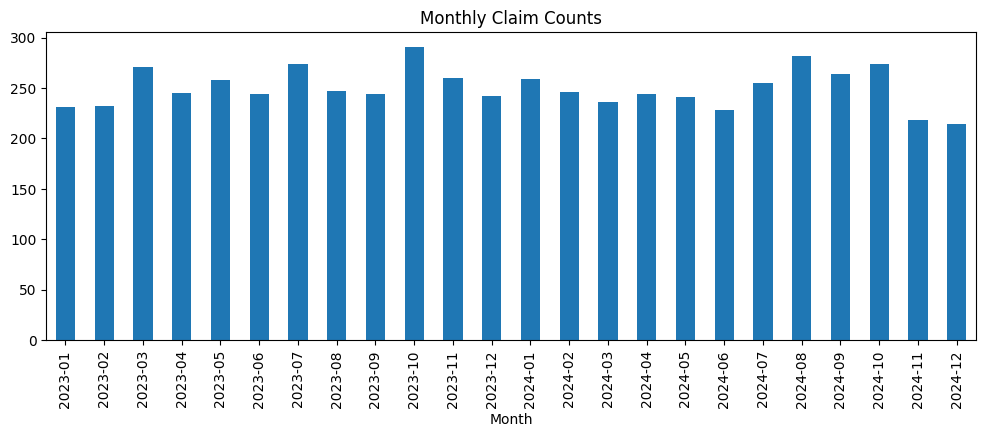

In [ ]:
df_1['claim_date'] = pd.to_datetime(df_1['claim_date'])
df_1['Month'] = df_1['claim_date'].dt.to_period('M')

monthly_counts = df_1.groupby('Month').size()

monthly_counts.plot(kind='bar', figsize=(12, 4), title='Monthly Claim Counts')

### **Feature selection & Multivariate Analysis**

In [ ]:
numerical_cols = data.select_dtypes(include=["int64","float64"]).columns
data[numerical_cols].corr()

customer_age  monthly_income  \
customer_age                 1.000000       -0.027143   
monthly_income              -0.027143        1.000000   
vehicle_or_property_age     -0.004786        0.013885   
claim_history                0.001066        0.013310   
fraudulent_claim            -0.023940       -0.004696   
premium_amount               0.053892        0.008974   
claim_amount                 0.030689        0.003154   

                         vehicle_or_property_age  claim_history  \
customer_age                           -0.004786       0.001066   
monthly_income                          0.013885       0.013310   
vehicle_or_property_age                 1.000000      -0.021272   
claim_history                          -0.021272       1.000000   
fraudulent_claim                        0.036885       0.003434   
premium_amount                         -0.010725       0.881417   
claim_amount                            0.019027       0.234964   

                         fraudulent_claim  premium_amount  claim_amount  
customer_age                    -0.023940        0.053892      0.030689  
monthly_income                  -0.004696        0.008974      0.003154  
vehicle_or_property_age          0.036885       -0.010725      0.019027  
claim_history                    0.003434        0.881417      0.234964  
fraudulent_claim                 1.000000        0.009567     -0.019279  
premium_amount                   0.009567        1.000000      0.262808  
claim_amount                    -0.019279        0.262808      1.000000

<Axes: >

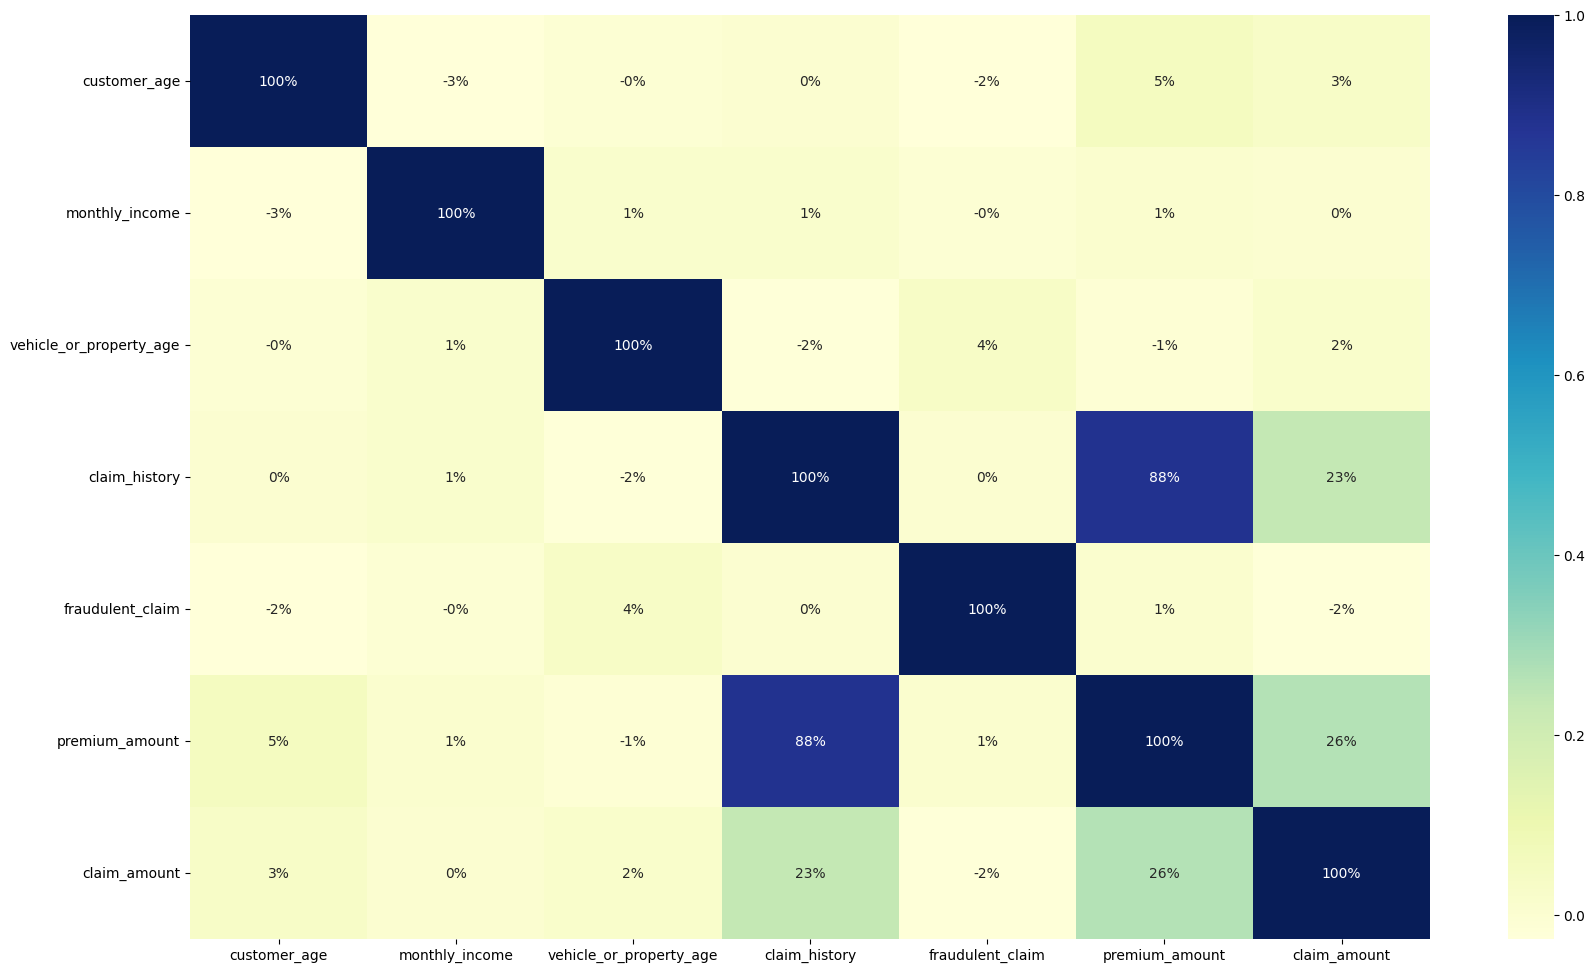

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(data[numerical_cols].corr(),annot=True,fmt='.0%', cmap='YlGnBu')

1. (0.88) Strong positive correlation – more claim history -> higher premiums. (risk-based pricing)
2. (0.26) Some influence — more premium amount -> higher current claim amount.
3. (0.21) Some influence — more past claim history -> higher current claim amount.

### **Encoding**

In [ ]:
# Ordinal Encoding (Label encoding)

risk_mapping = {'low': 0, 'medium': 1, 'high': 2}
data['risk_score'] = data['risk_score'].str.lower().map(risk_mapping)
data.head()


customer_age  gender policy_type  monthly_income  vehicle_or_property_age  \
0            32    Male    Property        69479.81                        4   
1            38    Male      Health        36698.58                        8   
2            35  Female        Life        66889.64                        9   
3            40    Male        Auto        42658.93                        3   
4            30  Female    Property        62521.39                        6   

   claim_history  fraudulent_claim  premium_amount  claim_amount  risk_score  
0              2                 1         1198.76       2471.04           1  
1              2                 1         1158.33       2079.63           1  
2              0                 1         1081.79       2518.72           1  
3              1                 0         1153.52       1135.85           0  
4              2                 0         1273.48       3154.80           1

In [ ]:
# target-2
data["fraudulent_claim"].value_counts()

fraudulent_claim
0    4742
1    1258
Name: count, dtype: int64

In [ ]:
# One Hot Encoding

data= pd.get_dummies(data, columns=['gender', 'policy_type'])
data.head()

customer_age  monthly_income  vehicle_or_property_age  claim_history  \
0            32        69479.81                        4              2   
1            38        36698.58                        8              2   
2            35        66889.64                        9              0   
3            40        42658.93                        3              1   
4            30        62521.39                        6              2   

   fraudulent_claim  premium_amount  claim_amount  risk_score  gender_Female  \
0                 1         1198.76       2471.04           1          False   
1                 1         1158.33       2079.63           1          False   
2                 1         1081.79       2518.72           1           True   
3                 0         1153.52       1135.85           0          False   
4                 0         1273.48       3154.80           1           True   

   gender_Male  gender_Other  policy_type_Auto  policy_type_Health  \
0         True         False             False               False   
1         True         False             False                True   
2        False         False             False               False   
3         True         False              True               False   
4        False         False             False               False   

   policy_type_Life  policy_type_Property  
0             False                  True  
1             False                 False  
2              True                 False  
3             False                 False  
4             False                  True

### **Train Test Split**

In [ ]:
x=data.drop(columns=["fraudulent_claim"])
y=data["fraudulent_claim"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### **Smote**

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [ ]:
pd.Series(y_train).value_counts().sort_index()

fraudulent_claim
0    3787
1    3787
Name: count, dtype: int64

### **Feature Scaling**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### **classification- MACHINE LEARNING**

####  Logistic Regression

In [ ]:
log = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
# 'C': 1, 'penalty': 'l1'

# Train the model
log.fit(x_train, y_train)
train_score = log.score(x_train, y_train)

# Pred
y_pred = log.predict(x_test)

print('Logistic Regression')
train_acc = log.score(x_train, y_train)
test_acc = log.score(x_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Evaluate the Model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = log.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Logistic Regression
Train Accuracy: 0.9530
Test Accuracy: 0.9200

Confusion Matrix:
 [[873  82]
 [ 14 231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       955
           1       0.74      0.94      0.83       245

    accuracy                           0.92      1200
   macro avg       0.86      0.93      0.89      1200
weighted avg       0.93      0.92      0.92      1200

AUC Score: 0.9704
Balanced Accuracy: 0.9285


In [ ]:
cv_scores = cross_val_score(log, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.89       0.91666667 0.92333333 0.91666667 0.90166667 0.91333333
 0.91666667 0.90166667 0.91       0.90333333]
Mean CV Accuracy: 0.9093333333333333


In [ ]:
log_reg = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Type of regularization
}
grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           cv=5,               # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV Accuracy):", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score (CV Accuracy): 0.9543202933239163

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       955
           1       0.82      0.89      0.85       245

    accuracy                           0.94      1200
   macro avg       0.89      0.92      0.91      1200
weighted avg       0.94      0.94      0.94      1200



####  Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10)

# Train the model
dt.fit(x_train, y_train)

# Predictions
y_pred = dt.predict(x_test)

print('Decision Tree Classifier')
train_acc = dt.score(x_train, y_train)
test_acc = dt.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = dt.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Decision Tree Classifier
Train Accuracy: 0.9916
Test Accuracy: 0.9875
Confusion Matrix:
 [[945  10]
 [  5 240]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.96      0.98      0.97       245

    accuracy                           0.99      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.99      0.99      0.99      1200

AUC Score: 0.9981
Balanced Accuracy: 0.9846


In [ ]:
cv_scores = cross_val_score(dt, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.99666667 0.99       0.99333333 0.98833333 0.99666667 0.99166667
 0.99666667 0.99166667 0.995      0.99666667]
Mean CV Accuracy: 0.9936666666666666


In [ ]:
dtree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],         # Splitting criteria
    'max_depth': [None, 5, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Min samples required to split
    'min_samples_leaf': [1, 2, 4],            # Min samples required at a leaf
}
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Score: 0.9848161275836963

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       955
           1       0.98      1.00      0.99       245

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



####  Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(max_depth= 20, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)
#'bootstrap': False

# Train the model
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)

print('Random Forest Classifier')
train_acc = rf.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Random Forest Classifier
Train Score: 0.9999
Test Score: 0.9867
Confusion Matrix:
 [[945  10]
 [  6 239]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.96      0.98      0.97       245

    accuracy                           0.99      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.99      0.99      0.99      1200

AUC Score: 0.9993
Balanced Accuracy: 0.9825


In [ ]:
cv_scores = cross_val_score(rf, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.995      0.99166667 0.99       0.98833333 0.99833333 0.99666667
 0.995      0.99166667 0.995      0.99166667]
Mean CV Accuracy: 0.9933333333333334


In [ ]:
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 10, 20, 30],        # depth of the tree
    'min_samples_split': [2, 5, 10],        # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],          # minimum samples at leaf node
    'bootstrap': [True, False]              # whether bootstrap samples are used
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,                      # 5-fold cross-validation
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)                 # use all processors


# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.9893057099633346


####  SVC (Support Vector Classifier)

In [ ]:
svc= SVC(C= 10, gamma= 'scale', kernel= 'rbf',probability=True)

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

print('Support Vector Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = svc.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = svc.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Support Vector Classifier
Accuracy: 0.97
Train Score: 0.9949
Test Score: 0.9750
Confusion Matrix:
 [[936  19]
 [ 11 234]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       955
           1       0.92      0.96      0.94       245

    accuracy                           0.97      1200
   macro avg       0.96      0.97      0.96      1200
weighted avg       0.98      0.97      0.98      1200

AUC Score: 0.9959
Balanced Accuracy: 0.9676


In [ ]:
cv_scores = cross_val_score(svc, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.79       0.79       0.79       0.79       0.79       0.79
 0.79       0.79       0.79166667 0.79166667]
Mean CV Accuracy: 0.7903333333333334


In [ ]:
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},
]
# Initialize SVC model
svc = SVC(random_state=42)

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on training data
grid_search_svc.fit(x_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search_svc.best_params_)
print("Best Score:", grid_search_svc.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9770283078506001


####  K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors= 5, weights= 'distance')

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('K-Nearest Neighbors')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = knn.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

K-Nearest Neighbors
Accuracy: 0.96
Train Score: 1.0000
Test Score: 0.9567
Confusion Matrix:
 [[929  26]
 [ 26 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       955
           1       0.89      0.89      0.89       245

    accuracy                           0.96      1200
   macro avg       0.93      0.93      0.93      1200
weighted avg       0.96      0.96      0.96      1200

AUC Score: 0.9814
Balanced Accuracy: 0.9333


In [ ]:
cv_scores = cross_val_score(knn, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.82       0.84833333 0.84333333 0.82666667 0.84666667 0.83833333
 0.84333333 0.81833333 0.84833333 0.82333333]
Mean CV Accuracy: 0.8356666666666668


In [ ]:
knn = KNeighborsClassifier()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9696346094318811


####  Naive Bayes

In [ ]:
nb = BernoulliNB()
# alpha': 0.1, 'fit_prior': True

nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print("Naive Bayes")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = nb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = nb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Naive Bayes
Accuracy: 0.81
Train Score: 0.8919
Test Score: 0.8067
Confusion Matrix:
 [[723 232]
 [  0 245]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86       955
           1       0.51      1.00      0.68       245

    accuracy                           0.81      1200
   macro avg       0.76      0.88      0.77      1200
weighted avg       0.90      0.81      0.82      1200

AUC Score: 0.9023
Balanced Accuracy: 0.8785


In [ ]:
cv_scores = cross_val_score(nb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.79166667 0.83833333 0.785      0.83666667 0.79833333 0.81333333
 0.82833333 0.79166667 0.825      0.82666667]
Mean CV Accuracy: 0.8135


In [ ]:
bnb = BernoulliNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0],         # Laplace smoothing
    'fit_prior': [True, False]        # Whether to learn class prior probabilities
}

# Step 5: GridSearchCV
grid = GridSearchCV(bnb, param_grid, cv=3, scoring='accuracy')
grid.fit(x_train, y_train)

# Step 6: Evaluation
print("Best parameters:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

Best parameters: {'alpha': 0.1, 'fit_prior': True}
Best cross-val accuracy: 0.8918662294121646


####  XGBoost

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7)

# 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7
# learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8
# objective='binary:logistic', eval_metric='logloss', use_label_encoder=False,random_state=42

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print('XGBoost Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = xgb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_probs = xgb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

XGBoost Classifier
Accuracy: 0.92
Train Score: 0.9502
Test Score: 0.9158

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       955
           1       0.71      1.00      0.83       245

    accuracy                           0.92      1200
   macro avg       0.85      0.95      0.89      1200
weighted avg       0.94      0.92      0.92      1200


Confusion Matrix:
 [[854 101]
 [  0 245]]
AUC Score: 0.9857
Balanced Accuracy: 0.9471


In [ ]:
cv_scores = cross_val_score(xgb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.91833333 0.91333333 0.91833333 0.925      0.92833333 0.93
 0.91666667 0.92       0.94333333 0.93166667]
Mean CV Accuracy: 0.9244999999999999


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(
    XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best cross-val accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best cross-val accuracy: 0.9931342671915804


####  Light GBM

In [ ]:
import lightgbm as lgb
lgb= lgb.LGBMClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=20)

# learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 20
# objective='binary', metric='binary_error', boosting_type='gbdt', random_state=42
# learning_rate=0.1, max_depth=7, n_estimators=200, num_leaves=50

# Train model
lgb.fit(x_train, y_train)
y_pred = lgb.predict(x_test)

print('Light GBM')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = lgb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_probs = lgb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

[LightGBM] [Info] Number of positive: 3787, number of negative: 3787
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 7574, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [ ]:
cv_scores = cross_val_score(lgb, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

[LightGBM] [Info] Number of positive: 1132, number of negative: 4268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 5400, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.209630 -> initscore=-1.327159
[LightGBM] [Info] Start training from score -1.327159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 30, 50]
}

# Define model without metric (correct)
model = LGBMClassifier(objective='multiclass', boosting_type='gbdt', num_class=3)

# Grid search
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best cross-val accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 15
[LightGBM] [Info] Start training from score -0.237042
[LightGBM] [Info] Start training from score -1.555700
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

### **classification- DEEP LEARNING**

In [ ]:
# Build the binary classification model
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(192, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(96, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary output for fraud detection
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict on test set
y_pred_probs = model.predict(x_test)
y_pred_labels = (y_pred_probs > 0.5).astype(int)  # Threshold at 0.5

# Evaluate model
print("Classification Report:\n")
print(classification_report(y_test, y_pred_labels))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(cm)

Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7953 - loss: 0.3822 - val_accuracy: 0.9690 - val_loss: 0.0652
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9659 - loss: 0.1009 - val_accuracy: 0.9875 - val_loss: 0.0250
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9649 - loss: 0.0948 - val_accuracy: 0.9868 - val_loss: 0.0304
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9679 - loss: 0.0782 - val_accuracy: 0.9782 - val_loss: 0.0398
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9729 - loss: 0.0736 - val_accuracy: 0.9842 - val_loss: 0.0325
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9765 - loss: 0.0538 - val_accuracy: 0.9848 - val_loss: 0.0393
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9787 - loss: 0.0552 - val_accuracy: 0.9901 - val_loss: 0.0217
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9768 - loss: 0.0573 - val_accuracy: 0.

### **classification- Best Model**

In [ ]:
print("lgb, rf")

lgb, rf


### **classification- Manual Testing**

In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[32,52352,5,0,980,1408,0,False,True,False,False,False,True,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

# Make prediction
prediction = lgb.predict(new_customer_scaled)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[23,80996,6,0,1964,62,0,False,True,False,False,False,False,True]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

# Make prediction
prediction = lgb.predict(new_customer_scaled)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
# 45,57926,6,0,1100,719,0,False,True,False,False,False,False,True

# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[45,57926,6,0,1100,719,0,True,False,False,True,False,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

# Make prediction
prediction = lgb.predict(new_customer_scaled)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[52,51286,3,0,891,1147,0,False,True,False,True,False,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

# Make prediction
prediction = lgb.predict(new_customer_scaled)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[49,41687,5,0,1014,564,2,True,False,False,False,False,False,True]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

# Make prediction
prediction = lgb.predict(new_customer_scaled)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[36,63502,5,0,0,958,1639,False,True,False,False,True,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

# Make prediction
prediction = lgb.predict(new_customer_scaled)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[48,72869,2,0,0,1007,824,True,False,False,False,False,False,True]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

# Make prediction
prediction = lgb.predict(new_customer_scaled)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[30,55169,6,0,0,1540,1275,False,True,False,True,False,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

# Make prediction
prediction = lgb.predict(new_customer_scaled)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


### **classification- Save the model and scaler**

In [ ]:
with open('fraud_claim_class_lgb_model.pkl', 'wb') as file:
    pickle.dump(lgb, file)

In [ ]:
files.download('fraud_claim_class_lgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('scaler_fraud_claim_class.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
files.download('scaler_fraud_claim_class.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **classification- Open and use it**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import pickle

In [ ]:
uploaded = files.upload()

Saving fraud_claim_class_lgb_model.pkl to fraud_claim_class_lgb_model.pkl
Saving scaler_fraud_claim_class.pkl to scaler_fraud_claim_class.pkl


In [ ]:
with open("fraud_claim_class_lgb_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [ ]:
with open("scaler_fraud_claim_class.pkl", "rb") as file:
    scaler = pickle.load(file)

In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[45,57926.04,6,0,1100,719,0,False,True,False,False,False,False,True]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

y_pred = loaded_model.predict(new_customer_scaled)
print("Predicted class:", y_pred[0])

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if y_pred[0] == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Predicted class: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[30,55169,6,0,0,1540,1275,False,True,False,True,False,False,False]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

y_pred = loaded_model.predict(new_customer_scaled)
print("Predicted class:", y_pred[0])

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if y_pred[0] == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Predicted class: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


### **Unsupervised Learning - Anomaly Detection**

####  Isolation Forest

In [ ]:
x.head(17)

customer_age  monthly_income  vehicle_or_property_age  claim_history  \
0             32        69479.81                        4              2   
1             38        36698.58                        8              2   
2             35        66889.64                        9              0   
3             40        42658.93                        3              1   
4             30        62521.39                        6              2   
5             56        55047.48                        3              0   
6             41        60220.01                        3              1   
7             44        38120.34                        6              1   
8             31        50623.39                        6              1   
9             38        59014.35                        4              2   
10            34        59925.49                        6              1   
11            28        38321.92                        6              2   
12            30        54382.02                        4              3   
13            44        79725.72                        3              2   
14            46        32538.41                        6              1   
15            47        39869.13                        4              0   
16            32        43721.39                        6              2   

    premium_amount  claim_amount  risk_score  gender_Female  gender_Male  \
0          1198.76       2471.04           1          False         True   
1          1158.33       2079.63           1          False         True   
2          1081.79       2518.72           1           True        False   
3          1153.52       1135.85           0          False         True   
4          1273.48       3154.80           1           True        False   
5           983.30       2225.69           0          False         True   
6          1149.74       1090.54           0           True        False   
7          1123.01       1022.25           0           True        False   
8          1115.01       2452.78           0          False         True   
9          1174.77       2019.04           0          False        False   
10         1097.88       1866.96           0          False         True   
11         1249.08       2187.87           0          False         True   
12         1322.15        961.07           0          False         True   
13         1248.09       3214.19           1          False         True   
14         1042.09        959.93           0          False         True   
15         1042.80       2503.24           1           True        False   
16         1137.17       1253.29           0           True        False   

    gender_Other  policy_type_Auto  policy_type_Health  policy_type_Life  \
0          False             False               False             False   
1          False             False                True             False   
2          False             False               False              True   
3          False              True               False             False   
4          False             False               False             False   
5          False             False               False             False   
6          False             False                True             False   
7          False              True               False             False   
8          False             False                True             False   
9           True             False               False             False   
10         False             False               False             False   
11         False             False               False             False   
12         False             False               False              True   
13         False             False               False             False   
14         False             False               False             False   
15         False             False               F

In [ ]:
y.head(17)

0     1
1     1
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
Name: fraudulent_claim, dtype: int64

In [ ]:
#Train Isolation Forest with contamination=0.30
iso_model = IsolationForest(contamination=0.3, random_state=42)
anomaly_labels = iso_model.fit_predict(x)

# Convert -1 to 1 (anomaly), 1 to 0 (normal)
anomaly_flags = np.where(anomaly_labels == -1, 1, 0)

# Compare against actual fraud labels
y_true = y  # This is the 'fraudulent_claim' column
y_pred = anomaly_flags  # Predicted by Isolation Forest

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

print("IsolationForest")
# Print Confusion Matrix
print("Fraud vs Anomaly Confusion Matrix:")
print(pd.DataFrame(conf_matrix,
                   index=["Actual: Not Fraud (0)", "Actual: Fraud (1)"],
                   columns=["Predicted: Not Anomaly (0)", "Predicted: Anomaly (1)"]))

# Evaluation Metrics
print("\nEvaluation Metrics:")
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN):", tn)
print("False Negatives (FN):", fn)

print(f"\n Precision: {precision_score(y_true, y_pred):.4f}")
print(f" Recall: {recall_score(y_true, y_pred):.4f}")
print(f" F1 Score: {f1_score(y_true, y_pred):.4f}")
print(f" Accuracy: {accuracy_score(y_true, y_pred):.4f}")

# Classification Report
print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Not Fraud", "Fraud"]))

IsolationForest
Fraud vs Anomaly Confusion Matrix:
                       Predicted: Not Anomaly (0)  Predicted: Anomaly (1)
Actual: Not Fraud (0)                        3554                    1188
Actual: Fraud (1)                             646                     612

Evaluation Metrics:
True Positives (TP): 612
False Positives (FP): 1188
True Negatives (TN): 3554
False Negatives (FN): 646

 Precision: 0.3400
 Recall: 0.4865
 F1 Score: 0.4003
 Accuracy: 0.6943

🧾 Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.85      0.75      0.79      4742
       Fraud       0.34      0.49      0.40      1258

    accuracy                           0.69      6000
   macro avg       0.59      0.62      0.60      6000
weighted avg       0.74      0.69      0.71      6000



In [ ]:
# Apply Local Outlier Factor (LOF)
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.3)
lof_labels = lof_model.fit_predict(x)  # -1 = anomaly, 1 = normal

# Convert LOF output to binary: 1 = anomaly, 0 = normal
anomaly_flags_lof = np.where(lof_labels == -1, 1, 0)

# Compare against actual fraud labels
y_true = y
y_pred = anomaly_flags_lof

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

print("LocalOutlierFactor")
# Print Confusion Matrix
print("Fraud vs Anomaly Confusion Matrix (LOF):")
print(pd.DataFrame(conf_matrix,
                   index=["Actual: Not Fraud (0)", "Actual: Fraud (1)"],
                   columns=["Predicted: Not Anomaly (0)", "Predicted: Anomaly (1)"]))

# Evaluation Metrics
print("\n Evaluation Metrics:")
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN):", tn)
print("False Negatives (FN):", fn)

print(f"\n Precision: {precision_score(y_true, y_pred):.4f}")
print(f" Recall: {recall_score(y_true, y_pred):.4f}")
print(f" F1 Score: {f1_score(y_true, y_pred):.4f}")
print(f" Accuracy: {accuracy_score(y_true, y_pred):.4f}")

# Classification Report
print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Not Fraud", "Fraud"]))

LocalOutlierFactor
Fraud vs Anomaly Confusion Matrix (LOF):
                       Predicted: Not Anomaly (0)  Predicted: Anomaly (1)
Actual: Not Fraud (0)                        3317                    1425
Actual: Fraud (1)                             884                     374

 Evaluation Metrics:
True Positives (TP): 374
False Positives (FP): 1425
True Negatives (TN): 3317
False Negatives (FN): 884

 Precision: 0.2079
 Recall: 0.2973
 F1 Score: 0.2447
 Accuracy: 0.6152

🧾 Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.79      0.70      0.74      4742
       Fraud       0.21      0.30      0.24      1258

    accuracy                           0.62      6000
   macro avg       0.50      0.50      0.49      6000
weighted avg       0.67      0.62      0.64      6000



In [ ]:
# Train One-Class SVM on the full feature set
svm_model = OneClassSVM(kernel='rbf', nu=0.3, gamma='auto')  # nu ≈ contamination
svm_model.fit(x)  # Unsupervised: fit only on X (not y)

# Predict anomaly labels: -1 = anomaly, 1 = normal
svm_labels = svm_model.predict(x)

# Convert to binary flag: 1 = anomaly, 0 = normal
anomaly_flags_svm = np.where(svm_labels == -1, 1, 0)

# Compare to actual fraud labels
y_true = y
y_pred = anomaly_flags_svm

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

print("OneClassSVM")
# Print Confusion Matrix
print("Fraud vs Anomaly Confusion Matrix (One-Class SVM):")
print(pd.DataFrame(conf_matrix,
                   index=["Actual: Not Fraud (0)", "Actual: Fraud (1)"],
                   columns=["Predicted: Not Anomaly (0)", "Predicted: Anomaly (1)"]))

# Evaluation Metrics
print("\n Evaluation Metrics:")
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN):", tn)
print("False Negatives (FN):", fn)

print(f"\n Precision: {precision_score(y_true, y_pred):.4f}")
print(f" Recall: {recall_score(y_true, y_pred):.4f}")
print(f" F1 Score: {f1_score(y_true, y_pred):.4f}")
print(f" Accuracy: {accuracy_score(y_true, y_pred):.4f}")

# Classification Report
print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Not Fraud", "Fraud"]))

OneClassSVM
Fraud vs Anomaly Confusion Matrix (One-Class SVM):
                       Predicted: Not Anomaly (0)  Predicted: Anomaly (1)
Actual: Not Fraud (0)                         829                    3913
Actual: Fraud (1)                             248                    1010

 Evaluation Metrics:
True Positives (TP): 1010
False Positives (FP): 3913
True Negatives (TN): 829
False Negatives (FN): 248

 Precision: 0.2052
 Recall: 0.8029
 F1 Score: 0.3268
 Accuracy: 0.3065

🧾 Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.77      0.17      0.28      4742
       Fraud       0.21      0.80      0.33      1258

    accuracy                           0.31      6000
   macro avg       0.49      0.49      0.31      6000
weighted avg       0.65      0.31      0.29      6000



In [ ]:
# Add Anomaly_Flag to features
x['anomaly_flag'] = anomaly_flags

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale features
scaler_1 = StandardScaler()
x_train = scaler_1.fit_transform(x_train)
x_test = scaler_1.transform(x_test)

####  Combining Anomaly Detection with Supervised Learning

In [ ]:
# Train classifier (Random Forest)
cm1_model = RandomForestClassifier(class_weight='balanced', random_state=42)
cm1_model.fit(x_train, y_train)

# Evaluate
y_pred = cm1_model.predict(x_test)
y_proba = cm1_model.predict_proba(x_test)[:, 1]

print("Combining Anomaly Detection with Supervised Learning\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Combining Anomaly Detection with Supervised Learning

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.98      0.97      0.98       245

    accuracy                           0.99      1200
   macro avg       0.99      0.98      0.98      1200
weighted avg       0.99      0.99      0.99      1200

Confusion Matrix:
[[950   5]
 [  7 238]]
ROC AUC Score: 0.999378138690031


In [ ]:
import lightgbm as lgb
cm2_model= lgb.LGBMClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=20)
cm2_model.fit(x_train, y_train)

# Evaluate
y_pred = cm2_model.predict(x_test)
y_proba = cm2_model.predict_proba(x_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

[LightGBM] [Info] Number of positive: 1013, number of negative: 3787
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211042 -> initscore=-1.318658
[LightGBM] [Info] Start training from score -1.318658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Recall will go up (you catch more frauds!)

False positives may reduce, because weird-but-legit claims can be ignored by supervised learning

####  Manual Testing

In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[40,72924,5,1,1107,2076,0,True,False,False,False,False,True,False]], dtype=float)

# Make prediction
prediction = iso_model.predict(input_data)
anomaly_status = prediction[0]
# Convert -1 to 1 (anomaly), 1 to 0 (normal)
anomaly_flags = np.where(anomaly_status == -1, 1, 0)

# Output raw prediction
print("Anomaly Status:", anomaly_flags)

# Interpret prediction
print("✅ Anomaly Status: No Anomaly Detected." if anomaly_flags == 0 else "⚠️ Anomaly Status: Anomaly Detected!")

Anomaly Status: 0
✅ Anomaly Status: No Anomaly Detected.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[40,72924,5,1,1107,2076,0,True,False,False,False,False,True,False,0]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler_1.transform(input_data)

# Make prediction
prediction = cm2_model.predict(new_customer_scaled)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[49,41687,5,1,1014,2564,2,True,False,False,False,False,False,True]], dtype=float)

# Make prediction
prediction = iso_model.predict(input_data)
anomaly_status = prediction[0]
# Convert -1 to 1 (anomaly), 1 to 0 (normal)
anomaly_flags = np.where(anomaly_status == -1, 1, 0)

# Output raw prediction
print("Anomaly Status:", anomaly_flags)

# Interpret prediction
print("✅ Anomaly Status: No Anomaly Detected." if anomaly_flags == 0 else "⚠️ Anomaly Status: Anomaly Detected!")

Anomaly Status: 1
⚠️ Anomaly Status: Anomaly Detected!


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[49,41687,5,1,1014,2564,2,True,False,False,False,False,False,True,1]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler_1.transform(input_data)

# Make prediction
prediction = cm2_model.predict(new_customer_scaled)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[35,72441,1,0,1003,2804,1,False,True,False,True,False,False,False]], dtype=float)

# Make prediction
prediction = iso_model.predict(input_data)
anomaly_status = prediction[0]
# Convert -1 to 1 (anomaly), 1 to 0 (normal)
anomaly_flags = np.where(anomaly_status == -1, 1, 0)

# Output raw prediction
print("Anomaly Status:", anomaly_flags)

# Interpret prediction
print("✅ Anomaly Status: No Anomaly Detected." if anomaly_flags == 0 else "⚠️ Anomaly Status: Anomaly Detected!")

Anomaly Status: 1
⚠️ Anomaly Status: Anomaly Detected!


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[35,72441,1,0,1003,2804,1,False,True,False,True,False,False,False,1]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler_1.transform(input_data)

# Make prediction
prediction = cm2_model.predict(new_customer_scaled)
fraud_status = prediction[0]

# Output raw prediction
print("Fraud Status:", fraud_status)

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if fraud_status == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Fraud Status: 0
✅ Fraud Status: No Fraud Detected.


####  Save anomaly detector

In [ ]:
with open('fraud_class_cm_model.pkl', 'wb') as file:
    pickle.dump(cm2_model, file)

In [ ]:
files.download('fraud_class_cm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('fraud_class_ano_model.pkl', 'wb') as file:
    pickle.dump(iso_model, file)

In [ ]:
files.download('fraud_class_ano_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('scaler_fraud_class_cm_model.pkl', 'wb') as f:
    pickle.dump(scaler_1, f)

In [ ]:
files.download('scaler_fraud_class_cm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####  Open and use it

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import pickle

In [ ]:
uploaded = files.upload()

Saving fraud_class_ano_model.pkl to fraud_class_ano_model.pkl
Saving fraud_class_cm_model.pkl to fraud_class_cm_model.pkl
Saving scaler_fraud_class_cm_model.pkl to scaler_fraud_class_cm_model.pkl


In [ ]:
with open("fraud_class_ano_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [ ]:
with open("fraud_class_cm_model.pkl", "rb") as file:
    loaded_model_1 = pickle.load(file)

In [ ]:
with open("scaler_fraud_class_cm_model.pkl", "rb") as file:
    scale_1 = pickle.load(file)

In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[49,41687,5,1,1014,2564,0,False,True,False,False,True,False,False]], dtype=float)
y_pred = loaded_model.predict(input_data)

# Convert -1 to 1 (anomaly), 1 to 0 (normal)
y_pred = np.where(y_pred == -1, 1, 0)
print("Anomaly Status:", y_pred[0])

# Interpret prediction
print("✅ Anomaly Status: No Anomaly Detected." if y_pred == 0 else "⚠️ Anomaly Status: Anomaly Detected!")

Anomaly Status: 0
✅ Anomaly Status: No Anomaly Detected.


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[49,41687,5,1,1014,2564,0,False,True,False,False,True,False,False,0]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler_1.transform(input_data)
y_pred = loaded_model_1.predict(new_customer_scaled)
print("Predicted class:", y_pred[0])

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if y_pred[0] == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Predicted class: 0
✅ Fraud Status: No Fraud Detected.


In [ ]:
#  49,41687,5,1,1014,2564,2,True,False,False,False,False,False,True,1 0 or 1

# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[33,35199,4,1,1094,1089,1,False,False,True,False,False,True,False]], dtype=float)
y_pred = loaded_model.predict(input_data)

# Convert -1 to 1 (anomaly), 1 to 0 (normal)
y_pred = np.where(y_pred == -1, 1, 0)
print("Anomaly Status:", y_pred[0])

# Interpret prediction
print("✅ Anomaly Status: No Anomaly Detected." if y_pred == 0 else "⚠️ Anomaly Status: Anomaly Detected!")

Anomaly Status: 1
⚠️ Anomaly Status: Anomaly Detected!


In [ ]:
# 49,41687,5,1,1014,2564,2,True,False,False,False,False,False,True,1 0 or 1

# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[33,35199,4,1,1094,1089,1,False,False,True,False,False,True,False,1]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler_1.transform(input_data)
y_pred = loaded_model_1.predict(new_customer_scaled)
print("Predicted class:", y_pred[0])

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if y_pred[0] == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Predicted class: 1
⚠️ Fraud Status: Fraudulent Claim Detected!


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[65,40600,0,0,1033,1080,0,True,False,False,False,False,True,False]], dtype=float)
y_pred = loaded_model.predict(input_data)

# Convert -1 to 1 (anomaly), 1 to 0 (normal)
y_pred = np.where(y_pred == -1, 1, 0)
print("Anomaly Status:", y_pred[0])

# Interpret prediction
print("✅ Anomaly Status: No Anomaly Detected." if y_pred == 0 else "⚠️ Anomaly Status: Anomaly Detected!")

Anomaly Status: 1
⚠️ Anomaly Status: Anomaly Detected!


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[65,40600,0,0,1033,1080,0,True,False,False,False,False,True,False,1]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler_1.transform(input_data)

y_pred = loaded_model_1.predict(new_customer_scaled)
print("Predicted class:", y_pred[0])

# Interpret prediction
print("✅ Fraud Status: No Fraud Detected." if y_pred[0] == 0 else "⚠️ Fraud Status: Fraudulent Claim Detected!")

Predicted class: 0
✅ Fraud Status: No Fraud Detected.


## **CLUSTERING - Customer Segmentation**

### **Upload and load dataset**

In [ ]:
# upload the data

uploaded = files.upload()

Saving extra_policies.csv to extra_policies.csv
Saving insurance_af_fraud.csv to insurance_af_fraud.csv


In [ ]:
# Create an empty dictionary to store dataframes
dataframes = {}

# Load each file into a separate DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    dataframes[file_name] = df
    print(f"Dataset '{file_name}' uploaded successfully!")

Dataset 'extra_policies.csv' uploaded successfully!
Dataset 'insurance_af_fraud.csv' uploaded successfully!


In [ ]:
df_1 = dataframes["insurance_af_fraud.csv"]

In [ ]:
df_2 = dataframes["extra_policies.csv"]

### **Data Import**

In [ ]:
df_1.head()

claim_id  claim_date customer_id  policy_id  customer_age  gender  \
0        NaN         NaN  CUST100000  POL100000            45    Male   
1  CLM105285  2024-08-05  CUST100001  POL100001            52    Male   
2  CLM104276  2024-09-26  CUST100002  POL100002            27  Female   
3  CLM105586  2023-08-24  CUST100003  POL100003            33    Male   
4  CLM104969  2023-11-14  CUST100004  POL100004            24  Female   

  policy_type  monthly_income  vehicle_or_property_age  claim_history  \
0    Property        57926.04                        6              0   
1        Auto        52957.88                        6              0   
2        Auto        64713.71                        3              2   
3        Life        50990.42                        4              1   
4        Life        76379.88                       10              0   

   fraudulent_claim  premium_amount  claim_amount risk_score location  \
0                 0         1100.36        719.87        Low  Chicago   
1                 0         1038.41       1483.60        Low  Chicago   
2                 0         1127.81       2247.89        Low  Chicago   
3                 0         1086.71       3012.94        Low  Houston   
4                 1         1072.40       2710.86     Medium  Houston   

   policy_upgrade  
0               1  
1               0  
2               0  
3               0  
4               0

In [ ]:
df_1.shape

(11484, 16)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11484 entries, 0 to 11483
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              11484 non-null  object 
 3   policy_id                11484 non-null  object 
 4   customer_age             11484 non-null  int64  
 5   gender                   11484 non-null  object 
 6   policy_type              11484 non-null  object 
 7   monthly_income           11484 non-null  float64
 8   vehicle_or_property_age  11484 non-null  int64  
 9   claim_history            11484 non-null  int64  
 10  fraudulent_claim         11484 non-null  int64  
 11  premium_amount           11484 non-null  float64
 12  claim_amount             11484 non-null  float64
 13  risk_score               11484 non-null  object 
 14  location              

In [ ]:
df_2.head()

customer_id  policy_id policy_type  vehicle_or_property_age  claim_history  \
0  CUST101824  POL200000    Property                        5              2   
1  CUST100409  POL200001    Property                        4              0   
2  CUST104506  POL200002    Property                        8              0   
3  CUST104012  POL200003    Property                        6              1   
4  CUST104012  POL200004        Auto                        3              1   

   fraudulent_claim  premium_amount  
0                 0          1214.0  
1                 1          1018.5  
2                 1          1029.0  
3                 0          1114.0  
4                 0          1116.5

In [ ]:
df_2.shape

(5998, 7)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              5998 non-null   object 
 1   policy_id                5998 non-null   object 
 2   policy_type              5998 non-null   object 
 3   vehicle_or_property_age  5998 non-null   int64  
 4   claim_history            5998 non-null   int64  
 5   fraudulent_claim         5998 non-null   int64  
 6   premium_amount           5998 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 328.1+ KB


In [ ]:
df = pd.concat([df_1, df_2], ignore_index=True)
df.head()

claim_id  claim_date customer_id  policy_id  customer_age  gender  \
0        NaN         NaN  CUST100000  POL100000          45.0    Male   
1  CLM105285  2024-08-05  CUST100001  POL100001          52.0    Male   
2  CLM104276  2024-09-26  CUST100002  POL100002          27.0  Female   
3  CLM105586  2023-08-24  CUST100003  POL100003          33.0    Male   
4  CLM104969  2023-11-14  CUST100004  POL100004          24.0  Female   

  policy_type  monthly_income  vehicle_or_property_age  claim_history  \
0    Property        57926.04                        6              0   
1        Auto        52957.88                        6              0   
2        Auto        64713.71                        3              2   
3        Life        50990.42                        4              1   
4        Life        76379.88                       10              0   

   fraudulent_claim  premium_amount  claim_amount risk_score location  \
0                 0         1100.36        719.87        Low  Chicago   
1                 0         1038.41       1483.60        Low  Chicago   
2                 0         1127.81       2247.89        Low  Chicago   
3                 0         1086.71       3012.94        Low  Houston   
4                 1         1072.40       2710.86     Medium  Houston   

   policy_upgrade  
0             1.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

In [ ]:
df.sort_values(by='customer_id', inplace=True)

In [ ]:
df.head(20)

claim_id  claim_date customer_id  policy_id  customer_age  gender  \
0            NaN         NaN  CUST100000  POL100000          45.0    Male   
1      CLM105285  2024-08-05  CUST100001  POL100001          52.0    Male   
2      CLM104276  2024-09-26  CUST100002  POL100002          27.0  Female   
3      CLM105586  2023-08-24  CUST100003  POL100003          33.0    Male   
4      CLM104969  2023-11-14  CUST100004  POL100004          24.0  Female   
5            NaN         NaN  CUST100005  POL100005          42.0  Female   
12209        NaN         NaN  CUST100006  POL200725           NaN     NaN   
6      CLM100479  2024-07-22  CUST100006  POL100006          46.0    Male   
7            NaN         NaN  CUST100007  POL100007          51.0  Female   
8            NaN         NaN  CUST100008  POL100008          44.0  Female   
9      CLM100152  2023-07-03  CUST100009  POL100009          36.0  Female   
11710        NaN         NaN  CUST100009  POL200226           NaN     NaN   
10           NaN         NaN  CUST100010  POL100010          46.0    Male   
16135        NaN         NaN  CUST100011  POL204651           NaN     NaN   
16829        NaN         NaN  CUST100011  POL205345           NaN     NaN   
13     CLM105472  2024-05-25  CUST100011  POL100011          36.0    Male   
16134        NaN         NaN  CUST100011  POL204650           NaN     NaN   
12     CLM103568  2024-09-27  CUST100011  POL100011          36.0    Male   
11     CLM103101  2023-03-04  CUST100011  POL100011          36.0    Male   
14           NaN         NaN  CUST100012  POL100012          38.0    Male   

      policy_type  monthly_income  vehicle_or_property_age  claim_history  \
0        Property        57926.04                        6              0   
1            Auto        52957.88                        6              0   
2            Auto        64713.71                        3              2   
3            Life        50990.42                        4              1   
4            Life        76379.88                       10              0   
5          Health        44863.72                        1              0   
12209    Property             NaN                        6              0   
6            Life        73316.23                        6              0   
7            Auto        57334.02                        4              1   
8            Life        83070.55                        4              1   
9          Health        73552.99                        5              0   
11710        Auto             NaN                        5              5   
10         Health        77372.80                        5              0   
16135        Life             NaN                        6              2   
16829        Life             NaN                        5              1   
13       Property        79106.00                        4              1   
16134        Auto             NaN                        3              1   
12       Property        79106.00                        4              1   
11       Property        79106.00                        4              1   
14           Auto        66060.76                        8              3   

       fraudulent_claim  premium_amount  claim_amount risk_score  location  \
0                     0         1100.36        719.87        Low   Chicago   
1                     0         1038.41       1483.60        Low   Chicago   
2                     0         1127.81       2247.89        Low   Chicago   
3                     0         1086.71       3012.94        Low   Houston   
4                     1         1072.40       2710.86     Medium   Houston   
5                     1          952.25       1690.23     Medium   Chicago   
12209                 0         1022.00           NaN        NaN       NaN   
6                     0         1061.62        852.22        Low  New York   
7                     0         1121.45        940.98        Low    Da

In [ ]:
df.tail()

claim_id  claim_date customer_id  policy_id  customer_age gender  \
12549        NaN         NaN  CUST109999  POL201065           NaN    NaN   
11483  CLM103154  2024-05-29  CUST109999  POL109999          39.0   Male   
16214        NaN         NaN  CUST109999  POL204730           NaN    NaN   
16213        NaN         NaN  CUST109999  POL204729           NaN    NaN   
11482  CLM100705  2024-01-18  CUST109999  POL109999          39.0   Male   

      policy_type  monthly_income  vehicle_or_property_age  claim_history  \
12549        Auto             NaN                        0              0   
11483    Property        69660.63                        4              1   
16214    Property             NaN                        7              1   
16213    Property             NaN                        2              2   
11482    Property        69660.63                        4              1   

       fraudulent_claim  premium_amount  claim_amount risk_score  location  \
12549                 1         1029.00           NaN        NaN       NaN   
11483                 0         1124.93       2587.94     Medium  New York   
16214                 0         1113.50           NaN        NaN       NaN   
16213                 0         1223.00           NaN        NaN       NaN   
11482                 0         1124.93       2587.94     Medium  New York   

       policy_upgrade  
12549             NaN  
11483             2.0  
16214             NaN  
16213             NaN  
11482             2.0

In [ ]:
df.shape

(17482, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17482 entries, 0 to 11482
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              17482 non-null  object 
 3   policy_id                17482 non-null  object 
 4   customer_age             11484 non-null  float64
 5   gender                   11484 non-null  object 
 6   policy_type              17482 non-null  object 
 7   monthly_income           11484 non-null  float64
 8   vehicle_or_property_age  17482 non-null  int64  
 9   claim_history            17482 non-null  int64  
 10  fraudulent_claim         17482 non-null  int64  
 11  premium_amount           17482 non-null  float64
 12  claim_amount             11484 non-null  float64
 13  risk_score               11484 non-null  object 
 14  location                 11

In [ ]:
# Group by customer_id and sum premium_amount
premium_sum = df.groupby('customer_id')['premium_amount'].sum().reset_index()

# Rename column for clarity
premium_sum.rename(columns={'premium_amount': 'total_premium_paid'}, inplace=True)

# Merge back to main dataset
df = pd.merge(df, premium_sum, on='customer_id', how='left')

# Preview result
print(df[['customer_id', 'policy_id', 'premium_amount', 'total_premium_paid']].head(10))

  customer_id  policy_id  premium_amount  total_premium_paid
0  CUST100000  POL100000         1100.36             1100.36
1  CUST100001  POL100001         1038.41             1038.41
2  CUST100002  POL100002         1127.81             1127.81
3  CUST100003  POL100003         1086.71             1086.71
4  CUST100004  POL100004         1072.40             1072.40
5  CUST100005  POL100005          952.25              952.25
6  CUST100006  POL200725         1022.00             2083.62
7  CUST100006  POL100006         1061.62             2083.62
8  CUST100007  POL100007         1121.45             1121.45
9  CUST100008  POL100008         1209.78             1209.78


In [ ]:
premium_sum

customer_id  total_premium_paid
0     CUST100000             1100.36
1     CUST100001             1038.41
2     CUST100002             1127.81
3     CUST100003             1086.71
4     CUST100004             1072.40
...          ...                 ...
9995  CUST109995             7338.62
9996  CUST109996             1318.93
9997  CUST109997             1239.70
9998  CUST109998             2296.11
9999  CUST109999             6827.86

[10000 rows x 2 columns]

In [ ]:
# Group by customer_id and count policies
policy_count = df.groupby('customer_id')['policy_id'].count().reset_index()

# Rename column
policy_count.rename(columns={'policy_id': 'num_active_policies'}, inplace=True)

# Merge back to main dataset
df = pd.merge(df, policy_count, on='customer_id', how='left')

# Preview result
print(df[['customer_id', 'policy_id', 'num_active_policies']].head(10))

  customer_id  policy_id  num_active_policies
0  CUST100000  POL100000                    1
1  CUST100001  POL100001                    1
2  CUST100002  POL100002                    1
3  CUST100003  POL100003                    1
4  CUST100004  POL100004                    1
5  CUST100005  POL100005                    1
6  CUST100006  POL200725                    2
7  CUST100006  POL100006                    2
8  CUST100007  POL100007                    1
9  CUST100008  POL100008                    1


In [ ]:
policy_count

customer_id  num_active_policies
0     CUST100000                    1
1     CUST100001                    1
2     CUST100002                    1
3     CUST100003                    1
4     CUST100004                    1
...          ...                  ...
9995  CUST109995                    6
9996  CUST109996                    1
9997  CUST109997                    1
9998  CUST109998                    2
9999  CUST109999                    6

[10000 rows x 2 columns]

In [ ]:
df.head(8)

claim_id  claim_date customer_id  policy_id  customer_age  gender  \
0        NaN         NaN  CUST100000  POL100000          45.0    Male   
1  CLM105285  2024-08-05  CUST100001  POL100001          52.0    Male   
2  CLM104276  2024-09-26  CUST100002  POL100002          27.0  Female   
3  CLM105586  2023-08-24  CUST100003  POL100003          33.0    Male   
4  CLM104969  2023-11-14  CUST100004  POL100004          24.0  Female   
5        NaN         NaN  CUST100005  POL100005          42.0  Female   
6        NaN         NaN  CUST100006  POL200725           NaN     NaN   
7  CLM100479  2024-07-22  CUST100006  POL100006          46.0    Male   

  policy_type  monthly_income  vehicle_or_property_age  claim_history  \
0    Property        57926.04                        6              0   
1        Auto        52957.88                        6              0   
2        Auto        64713.71                        3              2   
3        Life        50990.42                        4              1   
4        Life        76379.88                       10              0   
5      Health        44863.72                        1              0   
6    Property             NaN                        6              0   
7        Life        73316.23                        6              0   

   fraudulent_claim  premium_amount  claim_amount risk_score  location  \
0                 0         1100.36        719.87        Low   Chicago   
1                 0         1038.41       1483.60        Low   Chicago   
2                 0         1127.81       2247.89        Low   Chicago   
3                 0         1086.71       3012.94        Low   Houston   
4                 1         1072.40       2710.86     Medium   Houston   
5                 1          952.25       1690.23     Medium   Chicago   
6                 0         1022.00           NaN        NaN       NaN   
7                 0         1061.62        852.22        Low  New York   

   policy_upgrade  total_premium_paid  num_active_policies  
0             1.0             1100.36                    1  
1             0.0             1038.41                    1  
2             0.0             1127.81                    1  
3             0.0             1086.71                    1  
4             0.0             1072.40                    1  
5             0.0              952.25                    1  
6             NaN             2083.62                    2  
7             0.0             2083.62                    2

In [ ]:
df.shape

(17482, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17482 entries, 0 to 17481
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              17482 non-null  object 
 3   policy_id                17482 non-null  object 
 4   customer_age             11484 non-null  float64
 5   gender                   11484 non-null  object 
 6   policy_type              17482 non-null  object 
 7   monthly_income           11484 non-null  float64
 8   vehicle_or_property_age  17482 non-null  int64  
 9   claim_history            17482 non-null  int64  
 10  fraudulent_claim         17482 non-null  int64  
 11  premium_amount           17482 non-null  float64
 12  claim_amount             11484 non-null  float64
 13  risk_score               11484 non-null  object 
 14  location              

In [ ]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['claim_id', 'claim_date', 'customer_id', 'policy_id', 'customer_age',
       'gender', 'policy_type', 'monthly_income', 'vehicle_or_property_age',
       'claim_history', 'fraudulent_claim', 'premium_amount', 'claim_amount',
       'risk_score', 'location', 'policy_upgrade', 'total_premium_paid',
       'num_active_policies'],
      dtype='object')

In [ ]:
df.to_csv("insurance_cluster.csv", index=False)

### **Data cleaning**

In [ ]:
df.shape

(17482, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17482 entries, 0 to 17481
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              17482 non-null  object 
 3   policy_id                17482 non-null  object 
 4   customer_age             11484 non-null  float64
 5   gender                   11484 non-null  object 
 6   policy_type              17482 non-null  object 
 7   monthly_income           11484 non-null  float64
 8   vehicle_or_property_age  17482 non-null  int64  
 9   claim_history            17482 non-null  int64  
 10  fraudulent_claim         17482 non-null  int64  
 11  premium_amount           17482 non-null  float64
 12  claim_amount             11484 non-null  float64
 13  risk_score               11484 non-null  object 
 14  location              

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.isnull().sum()   # person not claimed =>(17482-6000 = 11482), customer having total no of extra policies=>(17482-11484=5998)

claim_id                   11482
claim_date                 11482
customer_id                    0
policy_id                      0
customer_age                5998
gender                      5998
policy_type                    0
monthly_income              5998
vehicle_or_property_age        0
claim_history                  0
fraudulent_claim               0
premium_amount                 0
claim_amount                5998
risk_score                  5998
location                    5998
policy_upgrade              5998
total_premium_paid             0
num_active_policies            0
dtype: int64

In [ ]:
df["customer_id"].value_counts() # 10000 unique customers_id

customer_id
CUST106484    12
CUST104067    11
CUST102290    11
CUST107381    11
CUST109749    10
              ..
CUST100007     1
CUST100008     1
CUST100010     1
CUST100012     1
CUST100013     1
Name: count, Length: 10000, dtype: int64

In [ ]:
df[df["num_active_policies"]>=2]["customer_id"].value_counts() # 5998 extra policy is taken by 3395 customers

customer_id
CUST106484    12
CUST102290    11
CUST104067    11
CUST107381    11
CUST106730    10
              ..
CUST109950     2
CUST109949     2
CUST109943     2
CUST100053     2
CUST100049     2
Name: count, Length: 3395, dtype: int64

| Scenario              | Explanation                                                                                             |
| --------------------- | --------------------------------------------------------------------------------------------------------
| `17482`  | Total number of policy records.  |
| `6000`   | Only 6000 customers filed claims — hence only they have `claim_id`, `claim_date`, `claim_amount`, and `risk_score` |
| `11482`  | So (= no claim) naturally, those values are missing                                                       |
| `5998`   | Extra policies - created for existing customers — which explains why age,gender,monthly income and demographic info isn’t repeated                                |
| `3395`   | Existing customers have multiple policies, having the same `customer_id` in many rows.             |


In [ ]:
df.describe(include="all")

claim_id  claim_date customer_id  policy_id  customer_age gender  \
count        6000        6000       17482      17482  11484.000000  11484   
unique       6000         730       10000      15998           NaN      3   
top     CLM103253  2024-08-29  CUST106484  POL106939           NaN   Male   
freq            1          17          12          5           NaN   5516   
mean          NaN         NaN         NaN        NaN     39.602577    NaN   
std           NaN         NaN         NaN        NaN     11.725890    NaN   
min           NaN         NaN         NaN        NaN     18.000000    NaN   
25%           NaN         NaN         NaN        NaN     31.000000    NaN   
50%           NaN         NaN         NaN        NaN     39.000000    NaN   
75%           NaN         NaN         NaN        NaN     48.000000    NaN   
max           NaN         NaN         NaN        NaN     80.000000    NaN   

       policy_type  monthly_income  vehicle_or_property_age  claim_history  \
count        17482    11484.000000             17482.000000   17482.000000   
unique           4             NaN                      NaN            NaN   
top           Auto             NaN                      NaN            NaN   
freq          4458             NaN                      NaN            NaN   
mean           NaN    60126.458768                 4.513728       1.188994   
std            NaN    14730.863255                 2.013131       1.086330   
min            NaN     5000.000000                 0.000000       0.000000   
25%            NaN    50199.727500                 3.000000       0.000000   
50%            NaN    60207.165000                 4.000000       1.000000   
75%            NaN    70073.500000                 6.000000       2.000000   
max            NaN   124482.860000                13.000000       8.000000   

        fraudulent_claim  premium_amount  claim_amount risk_score  location  \
count       17482.000000    17482.000000  11484.000000      11484     11484   
unique               NaN             NaN           NaN          3         5   
top                  NaN             NaN           NaN        Low  New York   
freq                 NaN             NaN           NaN       7060      2347   
mean            0.205869     1139.470220   1979.389751        NaN       NaN   
std             0.404347      118.323478    854.025035        NaN       NaN   
min             0.000000      828.180000    469.420000        NaN       NaN   
25%             0.000000     1038.192500   1261.770000        NaN       NaN   
50%             0.000000     1122.500000   1937.140000        NaN       NaN   
75%             0.000000     1217.500000   2649.640000        NaN       NaN   
max             1.000000     1820.500000   4997.150000        NaN       NaN   

        policy_upgrade  total_premium_paid  num_active_policies  
count     11484.000000        17482.000000         17482.000000  
unique             NaN                 NaN                  NaN  
top                NaN                 NaN                  NaN  
freq               NaN                 NaN                  NaN  
mean          0.606844         3130.019443             2.743736  
std           0.663941         2208.536309             1.918748  
min           0.000000          837.860000             1.000000  
25%           0.000000         1176.357500             1.000000  
50%           1.000000         2495.770000             2.000000  
75%           1.000000         4259.480000             4.000000  
max           2.000000        12840.500000            12.000000

In [ ]:
features = [
    'customer_age',
    'monthly_income',
    'location',
    'num_active_policies',
    'total_premium_paid',
    'claim_history',
    'policy_upgrade'
]

# Drop missing values for these columns only
df_seg = df.dropna(subset=features).copy()
df_seg.drop(['claim_id', 'claim_date', 'customer_id', 'policy_id', 'gender','policy_type','vehicle_or_property_age','fraudulent_claim','premium_amount','claim_amount', 'risk_score'], axis=1, inplace=True)

In [ ]:
df_seg.head()

customer_age  monthly_income  claim_history location  policy_upgrade  \
0          45.0        57926.04              0  Chicago             1.0   
1          52.0        52957.88              0  Chicago             0.0   
2          27.0        64713.71              2  Chicago             0.0   
3          33.0        50990.42              1  Houston             0.0   
4          24.0        76379.88              0  Houston             0.0   

   total_premium_paid  num_active_policies  
0             1100.36                    1  
1             1038.41                    1  
2             1127.81                    1  
3             1086.71                    1  
4             1072.40                    1

In [ ]:
df_seg.shape

(11484, 7)

In [ ]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11484 entries, 0 to 17481
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         11484 non-null  float64
 1   monthly_income       11484 non-null  float64
 2   claim_history        11484 non-null  int64  
 3   location             11484 non-null  object 
 4   policy_upgrade       11484 non-null  float64
 5   total_premium_paid   11484 non-null  float64
 6   num_active_policies  11484 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 717.8+ KB


In [ ]:
df_seg['customer_age'] = df_seg['customer_age'].astype(int)
df_seg['policy_upgrade'] = df_seg['policy_upgrade'].astype(int)

In [ ]:
df_seg['policy_upgrade'].value_counts() # 0-5676, 1-4676, 2-1161

policy_upgrade
0    5676
1    4647
2    1161
Name: count, dtype: int64

In [ ]:
df_seg['num_active_policies'].value_counts()

num_active_policies
1     6605
3     1540
2     1319
4      664
5      612
6      422
7      153
8       77
9       61
11      14
10      12
12       5
Name: count, dtype: int64

In [ ]:
df_seg['location'].value_counts()

location
New York       2347
Chicago        2330
Los Angeles    2282
Dallas         2265
Houston        2260
Name: count, dtype: int64

In [ ]:
# one hot encoding
df_seg= pd.get_dummies(df_seg, columns=['location'])
df_seg.head()

customer_age  monthly_income  claim_history  policy_upgrade  \
0            45        57926.04              0               1   
1            52        52957.88              0               0   
2            27        64713.71              2               0   
3            33        50990.42              1               0   
4            24        76379.88              0               0   

   total_premium_paid  num_active_policies  location_Chicago  location_Dallas  \
0             1100.36                    1              True            False   
1             1038.41                    1              True            False   
2             1127.81                    1              True            False   
3             1086.71                    1             False            False   
4             1072.40                    1             False            False   

   location_Houston  location_Los Angeles  location_New York  
0             False                 False              False  
1             False                 False              False  
2             False                 False              False  
3              True                 False              False  
4              True                 False              False

In [ ]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11484 entries, 0 to 17481
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_age          11484 non-null  int64  
 1   monthly_income        11484 non-null  float64
 2   claim_history         11484 non-null  int64  
 3   policy_upgrade        11484 non-null  int64  
 4   total_premium_paid    11484 non-null  float64
 5   num_active_policies   11484 non-null  int64  
 6   location_Chicago      11484 non-null  bool   
 7   location_Dallas       11484 non-null  bool   
 8   location_Houston      11484 non-null  bool   
 9   location_Los Angeles  11484 non-null  bool   
 10  location_New York     11484 non-null  bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 684.1 KB


In [ ]:
assert pd.notnull(df_seg).all().all()

In [ ]:
assert pd.notnull(df_seg.select_dtypes(include=["number"])).all().all()

In [ ]:
df_seg.isnull().sum()

customer_age            0
monthly_income          0
claim_history           0
policy_upgrade          0
total_premium_paid      0
num_active_policies     0
location_Chicago        0
location_Dallas         0
location_Houston        0
location_Los Angeles    0
location_New York       0
dtype: int64

### **Data preprocessing**

In [ ]:
df_seg.shape

(11484, 11)

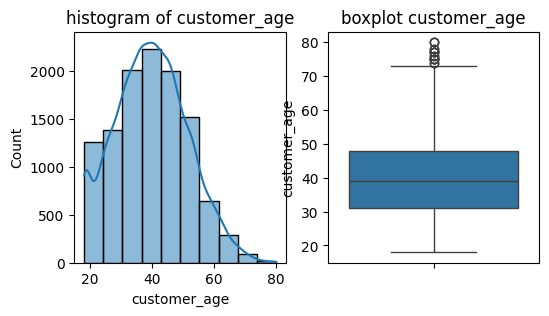

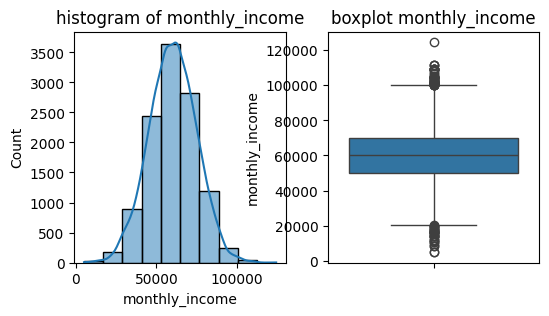

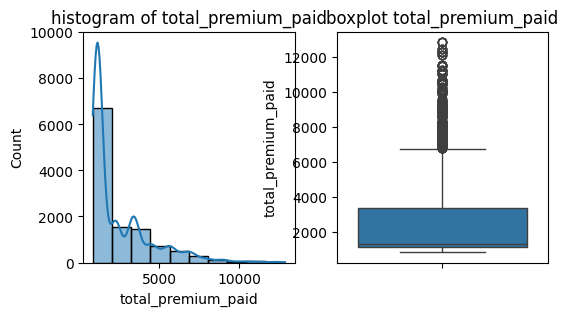

In [ ]:
num_cols = ['customer_age', 'monthly_income', 'total_premium_paid']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    plt.subplot(1,2,1)
    sns.histplot(df_seg[col], bins=10, kde=True)
    plt.title(f"histogram of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(y=df_seg[col])
    plt.title(f"boxplot {col}")
    plt.show()

### **Outlayers**

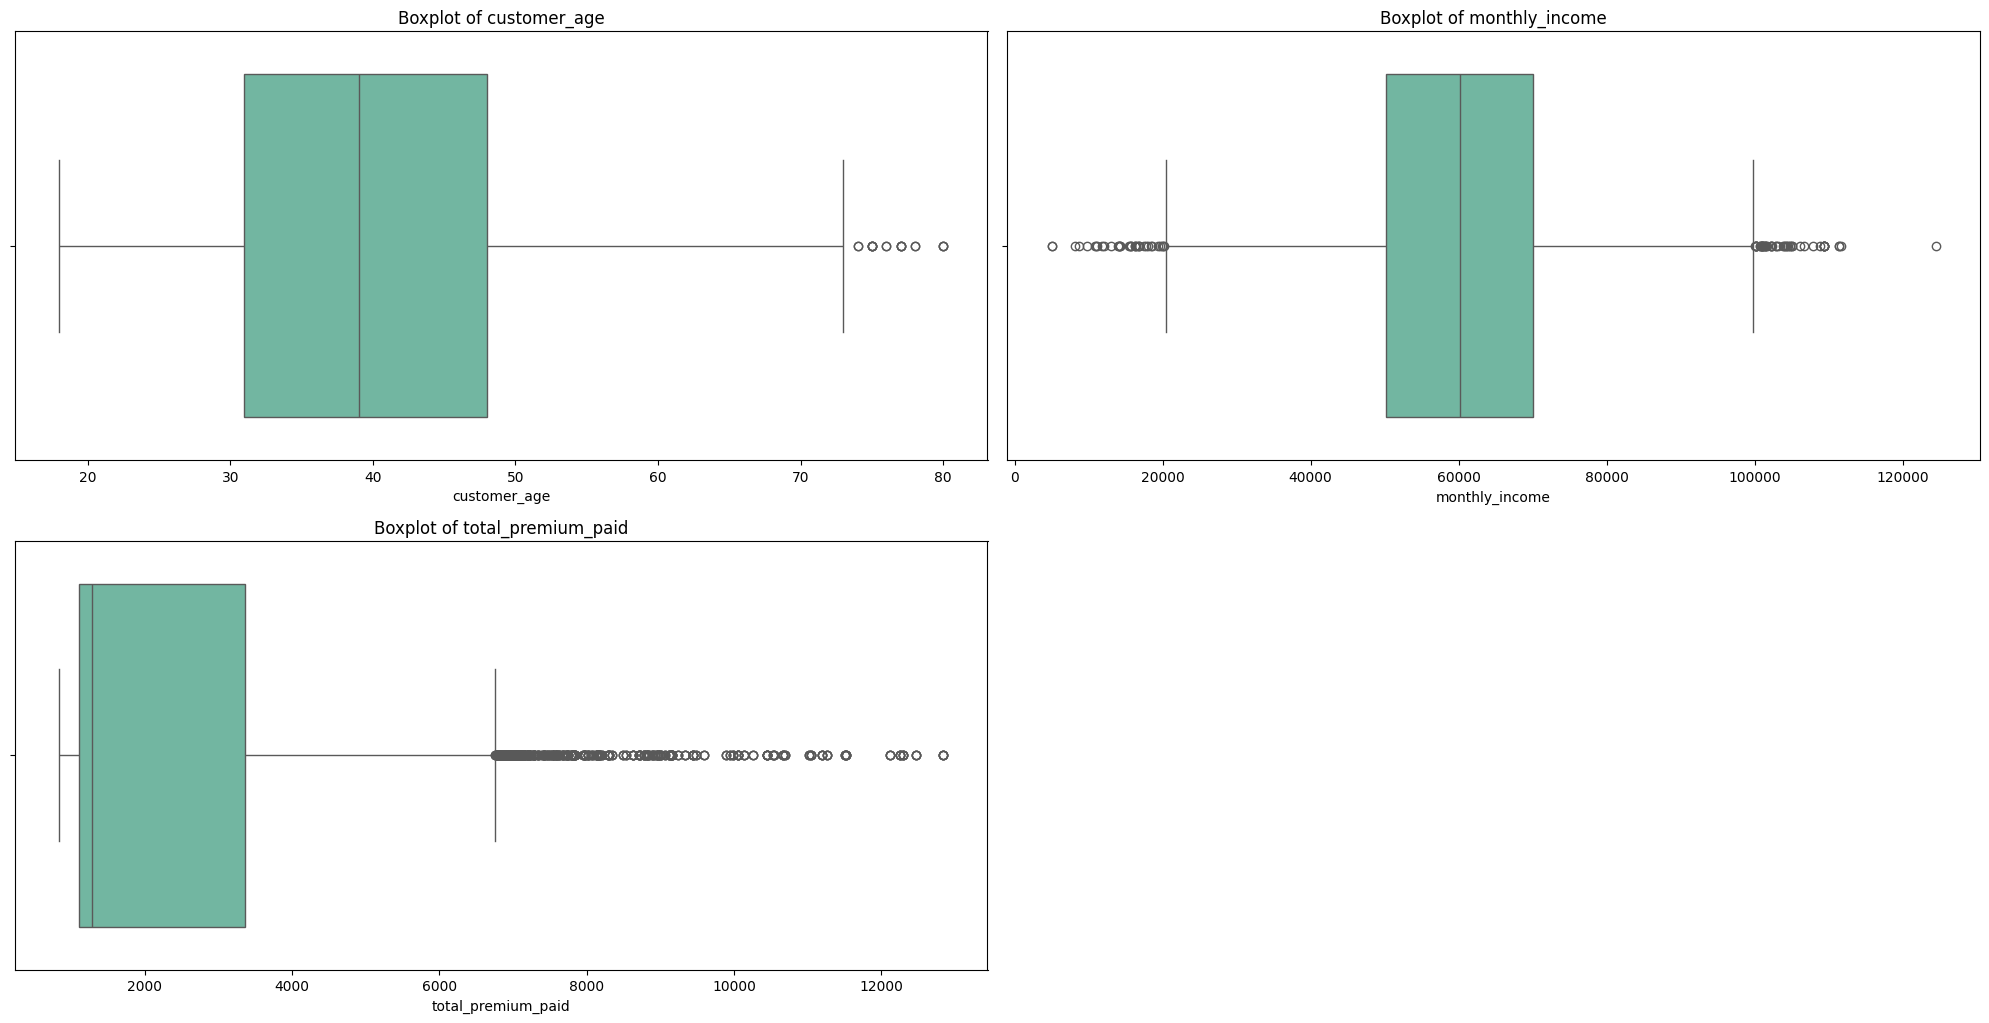

In [ ]:
numerical_cols = ['customer_age', 'monthly_income', 'total_premium_paid']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df_seg, x=col, palette='Set2')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### **Feature selection & Multivariate Analysis**


In [ ]:
numerical_cols = df_seg.select_dtypes(include=["int64","float64"]).columns
df[numerical_cols].corr()

customer_age  monthly_income  claim_history  \
customer_age             1.000000       -0.019635       0.008705   
monthly_income          -0.019635        1.000000       0.003073   
claim_history            0.008705        0.003073       1.000000   
policy_upgrade          -0.004456       -0.007962       0.009050   
total_premium_paid      -0.009431        0.016669       0.067154   
num_active_policies     -0.013790        0.017388       0.010064   

                     policy_upgrade  total_premium_paid  num_active_policies  
customer_age              -0.004456           -0.009431            -0.013790  
monthly_income            -0.007962            0.016669             0.017388  
claim_history              0.009050            0.067154             0.010064  
policy_upgrade             1.000000            0.000685            -0.000868  
total_premium_paid         0.000685            1.000000             0.994721  
num_active_policies       -0.000868            0.994721             1.000000

<Axes: >

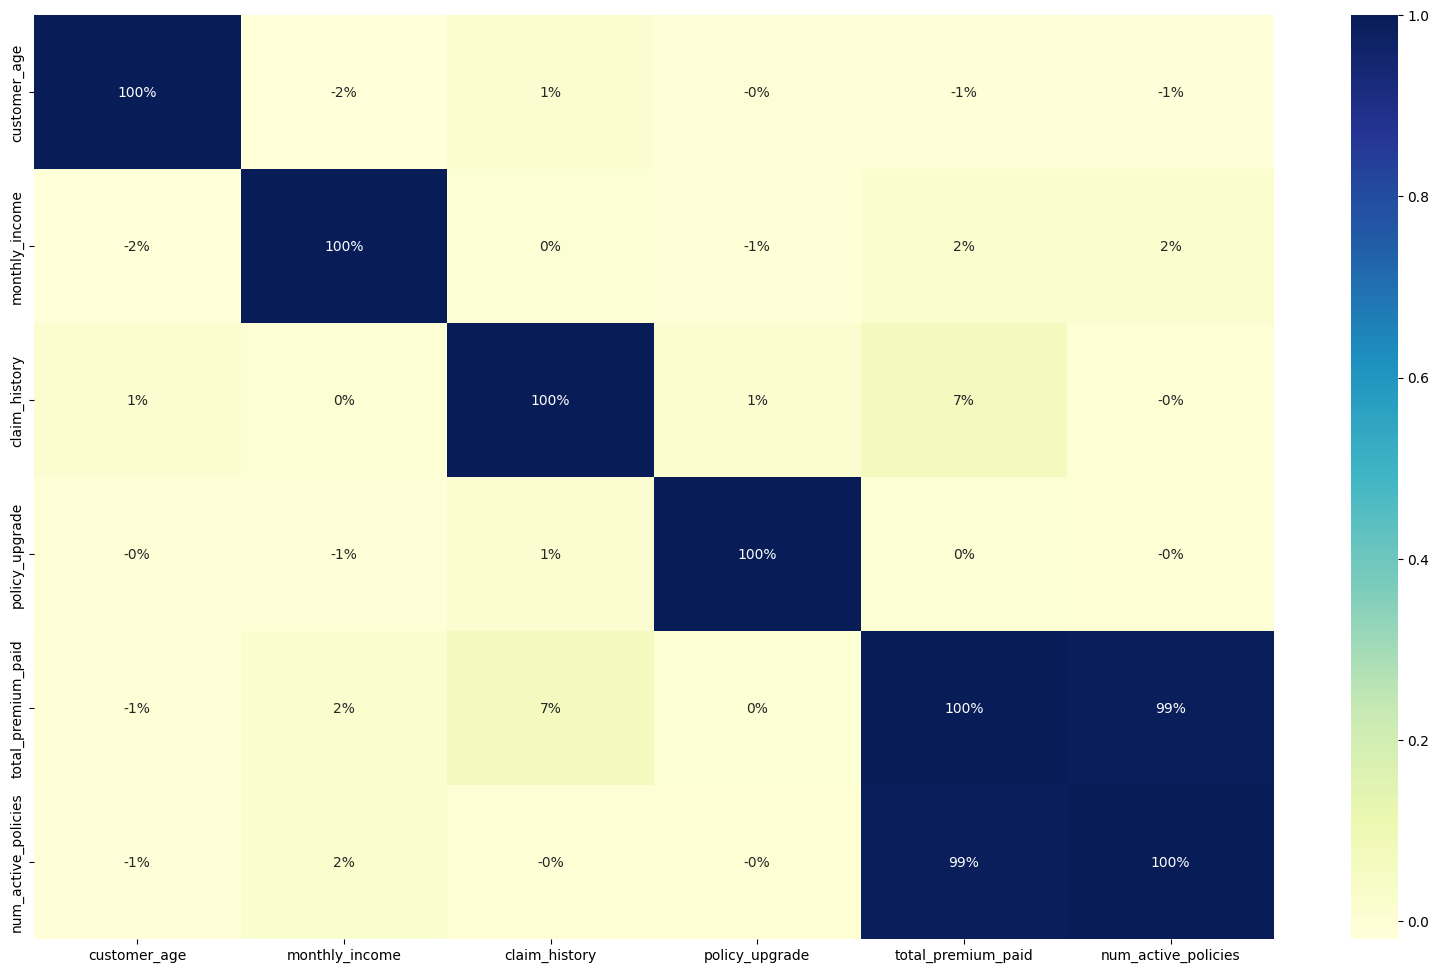

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df_seg[numerical_cols].corr(),annot=True,fmt='.0%', cmap='YlGnBu')

Strong positive correlation → as the number of active policies increases, total premium paid also increases proportionally

### **Model**

#### **KMeans - location - (5)**

In [ ]:
df_loc=df_seg.drop(columns=["total_premium_paid"])
df_loc.head()

customer_age  monthly_income  claim_history  policy_upgrade  \
0            45        57926.04              0               1   
1            52        52957.88              0               0   
2            27        64713.71              2               0   
3            33        50990.42              1               0   
4            24        76379.88              0               0   

   num_active_policies  location_Chicago  location_Dallas  location_Houston  \
0                    1              True            False             False   
1                    1              True            False             False   
2                    1              True            False             False   
3                    1             False            False              True   
4                    1             False            False              True   

   location_Los Angeles  location_New York  dbscan_cluster       PC1  \
0                 False              False               0 -0.596192   
1                 False              False               1 -0.958674   
2                 False              False               1  0.428349   
3                 False              False               1 -0.267318   
4                 False              False               1  1.342538   

        PC2       PC3  
0 -0.464653 -0.913423  
1 -1.643219  0.056035  
2 -0.057522  0.632862  
3 -0.838408 -0.079257  
4 -1.197601 -0.295193

In [ ]:
## Feature Scaling

scaler = StandardScaler()
x = scaler.fit_transform(df_loc)

##### **Elbow Method (SSE-based)**

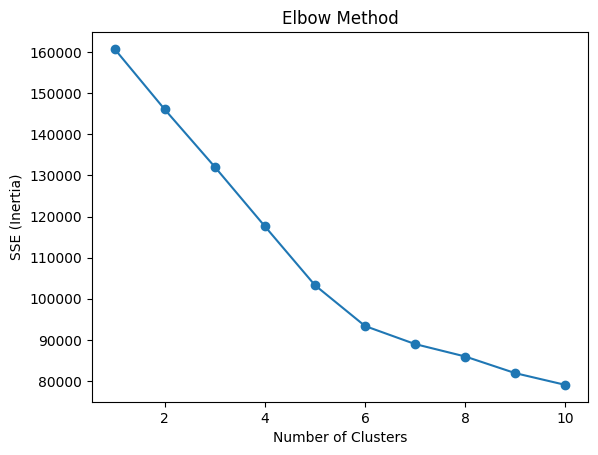

In [ ]:
# Measures the within-cluster sum of squared errors (SSE)

sse = [] #  sum of squared errors
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

# Now plot
plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.show()

##### **Silhouette Score Method**

Silhouette Score: [np.float64(0.08851361084485222), np.float64(0.15901847276619085), np.float64(0.2087609945064238), np.float64(0.2616593871819565), np.float64(0.27123863603850085), np.float64(0.25668096871676815), np.float64(0.22900902657331337), np.float64(0.22370982661632038), np.float64(0.22225358643889387)]


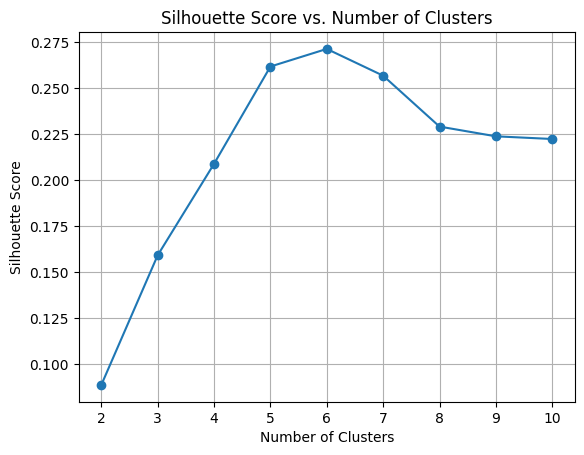

In [ ]:
# (Silhouette Score Method)

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    score = silhouette_score(x, labels)
    silhouette_scores.append(score)

print("Silhouette Score:",silhouette_scores)

# Plot Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

##### **K-Mean -based on location**

In [ ]:
# Use best k-5
kmeans = KMeans(n_clusters=5, random_state=42)
df_loc['segment'] = kmeans.fit_predict(x)
df_loc.groupby('segment').mean()

customer_age  monthly_income  claim_history  policy_upgrade  \
segment                                                                
0           39.762389    59820.129093       1.138938        0.616814   
1           39.368975    60568.969299       1.209904        0.622699   
2           39.684278    59890.079945       1.154666        0.579463   
3           39.331126    60218.230711       1.211479        0.602208   
4           39.857940    60139.082665       1.182833        0.613734   

         num_active_policies  location_Chicago  location_Dallas  \
segment                                                           
0                   2.085398               0.0              0.0   
1                   2.141981               0.0              0.0   
2                   2.123562               0.0              0.0   
3                   2.194260               0.0              1.0   
4                   2.200000               1.0              0.0   

         location_Houston  location_Los Angeles  location_New York  \
segment                                                              
0                     1.0                   0.0                0.0   
1                     0.0                   1.0                0.0   
2                     0.0                   0.0                1.0   
3                     0.0                   0.0                0.0   
4                     0.0                   0.0                0.0   

         dbscan_cluster       PC1       PC2       PC3  
segment                                                
0              0.634513 -0.035374 -0.022763 -0.035987  
1              0.708589  0.019637  0.040979  0.006716  
2              0.695782 -0.012805 -0.049116  0.005377  
3              0.699779  0.026718  0.021532  0.016645  
4              0.711159  0.002006  0.010487  0.006730

##### based on location
| Segment | Dominant Location | Income          | Claim Frequency | Upgrades      | Description          |
| ------- | ----------------- | --------------- | --------------- | ------------- | -------------------- |
| 0       | New York          | Medium          | Moderate        | Medium        | Balanced behavior    |
| 1       | Dallas            | Slightly higher | High            | Medium        | Possibly high-risk   |
| 2       | Chicago           | Average         | Medium          | Slightly high | Well-rounded         |
| 3       | Houston           | Slightly lower  | Low             | Highest       | Low engagement       |
| 4       | Los Angeles       | Highest         | High            | High          | High value customers |

region-specific promotions, premium pricing strategies, or localized service improvements.

**New York Region** -
Mid-income, mid-age customers with moderate claim and upgrade behavior. Offer loyalty bonuses or bundle offers.

**Dallas Region** -
Slightly higher income and premium payers. Target for upselling new coverage options or premium services.

**Chicago Region** -
Highly stable, well-paying customers with high policy engagement. Offer referral benefits and retention perks.

**Houston Region** -
Slightly lower total premiums, possibly due to fewer add-ons. Consider offering low-cost upgrades or discounts for upselling.

**Los Angeles Region** -
High-income urban customers with active policies. Promote premium lifestyle insurance products or convenience-based services.

In [ ]:
segment_map = {
    0: "New York(0)",
    1: "Dallas (1)",
    2: "Chicago(2)",
    3: "Houston(3)",
    4: "Los Angeles(4)"
}
df_loc['segment_label'] = df_loc['segment'].map(segment_map)

In [ ]:
# Group and sum the monthly income by segment
income_by_segment = df_loc.groupby('segment_label')['monthly_income'].sum().reset_index()

# Sort by income in descending order
income_by_segment = income_by_segment.sort_values(by='monthly_income', ascending=False)

# Create interactive Plotly bar chart
fig = px.bar(
    income_by_segment,
    x='segment_label',
    y='monthly_income',
    color='segment_label',
    title=" Total Monthly Income by Customer Segment (Descending)",
    labels={'segment_label': 'Segment', 'monthly_income': 'Total Monthly Income'},
    text_auto='.2s'
)

fig.update_layout(
    xaxis_title="Segment (Region-based)",
    yaxis_title="Total Monthly Income",
    showlegend=False,
    template='plotly_dark'
)

fig.show()

In [ ]:
# Count customers per location (from one-hot columns)
location_counts = df_seg[['location_Chicago', 'location_Dallas', 'location_Houston',
                          'location_Los Angeles', 'location_New York']].sum()

# Convert to DataFrame
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Customer_Count']

# Sort by Customer_Count in ascending order
location_df = location_df.sort_values(by='Customer_Count', ascending=True)

# Plotly bar chart
fig = px.bar(
    location_df,
    x='Location',
    y='Customer_Count',
    color='Location',
    title=' Number of Customers per Location (Ascending Order)',
    text_auto=True
)

fig.update_layout(
    xaxis_title="Location",
    yaxis_title="Number of Customers",
    template='plotly_white',
    showlegend=False
)

fig.show()

In [ ]:
# Prepare average premium data
tol_premium = {
    'Chicago': df_seg[df_seg['location_Chicago'] == 1]['total_premium_paid'].sum(),
    'Dallas': df_seg[df_seg['location_Dallas'] == 1]['total_premium_paid'].sum(),
    'Houston': df_seg[df_seg['location_Houston'] == 1]['total_premium_paid'].sum(),
    'Los Angeles': df_seg[df_seg['location_Los Angeles'] == 1]['total_premium_paid'].sum(),
    'New York': df_seg[df_seg['location_New York'] == 1]['total_premium_paid'].sum()
}

# Convert to DataFrame and sort descending
premium_df = pd.DataFrame(tol_premium.items(), columns=['City', 'Total_Premium_Paid'])
premium_df.sort_values(by='Total_Premium_Paid', ascending=False, inplace=True)

# Plotly horizontal bar chart
fig = px.bar(
    premium_df,
    y='City',
    x='Total_Premium_Paid',
    color='City',
    text_auto='.2s',
    orientation='h',
    title=' Total Premium Paid by City (Descending Order)'
)

fig.update_layout(
    yaxis_title="City",
    xaxis_title="Total Premium Paid",
    template='plotly_white',
    showlegend=False
)

fig.show()

In [ ]:
# Average Policy Upgrades per Location
sum_upgrades = {
    'Chicago': df_seg[df_seg['location_Chicago'] == 1]['policy_upgrade'].sum(),
    'Dallas': df_seg[df_seg['location_Dallas'] == 1]['policy_upgrade'].sum(),
    'Houston': df_seg[df_seg['location_Houston'] == 1]['policy_upgrade'].sum(),
    'Los Angeles': df_seg[df_seg['location_Los Angeles'] == 1]['policy_upgrade'].sum(),
    'New York': df_seg[df_seg['location_New York'] == 1]['policy_upgrade'].sum()
}

# Convert to DataFrame
upgrade_df = pd.DataFrame(sum_upgrades.items(), columns=['City', 'Sum_Policy_Upgrade'])

# Sort descending (optional)
upgrade_df = upgrade_df.sort_values(by='Sum_Policy_Upgrade', ascending=False)

# Plotly bar chart
fig = px.bar(
    upgrade_df,
    x='City',
    y='Sum_Policy_Upgrade',
    color='City',
    title=' Sum Policy Upgrades by City',
    text_auto='.2f'
)

fig.update_layout(
    xaxis_title="City",
    yaxis_title="Sum Policy Upgrade Count",
    template='plotly_white',
    showlegend=False
)

fig.show()

In [ ]:
# Count segments
segment_counts = df_loc['segment'].value_counts().sort_index()

# Labels for regions (mapped to segment 0–4)
labels = ['New York', 'Dallas', 'Chicago', 'Houston', 'Los Angeles']

# Prepare DataFrame for Plotly
segment_df = pd.DataFrame({
    'Region': labels,
    'Count': segment_counts.values
})

# Plotly pie chart
fig = px.pie(
    segment_df,
    names='Region',
    values='Count',
    title=' Customer Segment Share by Region',
    color_discrete_sequence=px.colors.qualitative.Set2,
    hole=0 )

fig.update_traces(textinfo='percent+label')
fig.update_layout(showlegend=False)

fig.show()

#### **KMeans - Behavior - (3)**

In [ ]:
columns_for_clustering = [
    'customer_age',
    'monthly_income',
    'claim_history',
    'policy_upgrade',
    'num_active_policies'
]

df_behavior = df_seg[columns_for_clustering].copy()
df_behavior.head()

customer_age  monthly_income  claim_history  policy_upgrade  \
0            45        57926.04              0               1   
1            52        52957.88              0               0   
2            27        64713.71              2               0   
3            33        50990.42              1               0   
4            24        76379.88              0               0   

   num_active_policies  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [ ]:
scaler = StandardScaler()
x_beh = scaler.fit_transform(df_behavior)

##### **Elbow Method (SSE-based)**

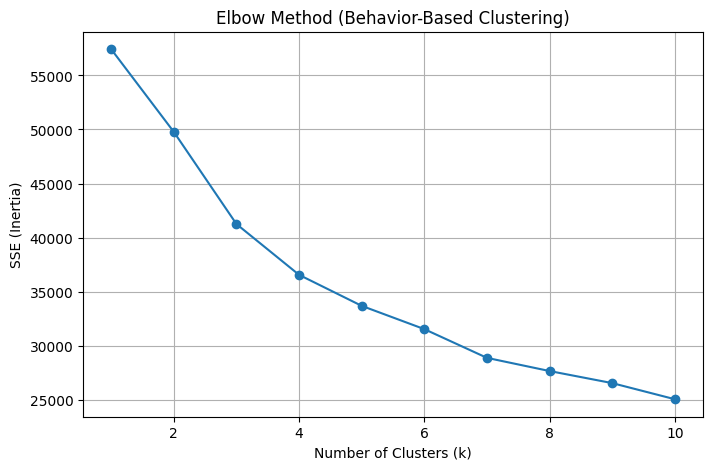

In [ ]:
# Measures the within-cluster sum of squared errors (SSE)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_beh)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method (Behavior-Based Clustering)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.grid(True)
plt.show()

##### **Silhouette Score Method**


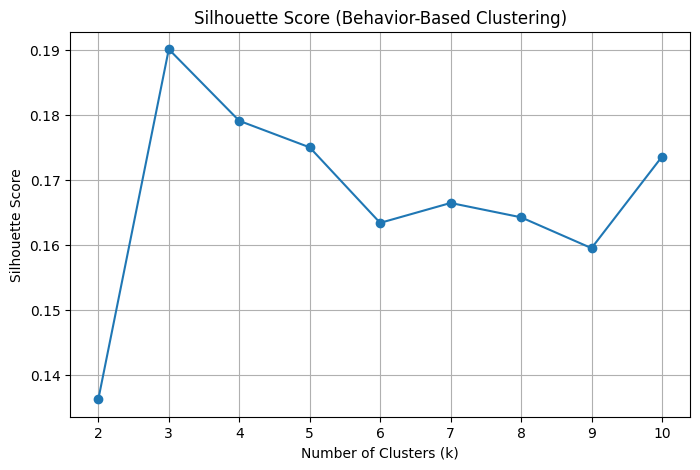

Silhouette Score: [np.float64(0.13623870208895017), np.float64(0.19010026742066108), np.float64(0.1790822250251902), np.float64(0.17499617191704567), np.float64(0.16337675406818114), np.float64(0.16644015409556573), np.float64(0.1642323061877437), np.float64(0.15948553995152304), np.float64(0.1735646194220185)]


In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_beh)
    score = silhouette_score(x_beh, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score (Behavior-Based Clustering)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

print("Silhouette Score:",silhouette_scores)

##### **K-Mean -based on behavior**

In [ ]:
# Use best k
kmeans= KMeans(n_clusters=3, random_state=42)
df_behavior['behavior_segment'] = kmeans.fit_predict(x_beh)

In [ ]:
df_behavior.groupby('behavior_segment')[['customer_age', 'monthly_income', 'claim_history', 'policy_upgrade', 'num_active_policies']].mean()

customer_age  monthly_income  claim_history  policy_upgrade  \
behavior_segment                                                                
0                    39.484630    60160.292555       1.178291        0.000000   
1                    39.352791    60044.715781       1.174603        0.580133   
2                    39.819485    60126.469171       1.182592        1.212297   

                  num_active_policies  
behavior_segment                       
0                            1.476150  
1                            5.401946  
2                            1.488990

##### based on other factors
| Segment | Age  | Income | Claims | Upgrades | Active Policies | Interpretation                                                               |
| ------- | ---- | ------ | ------ | -------- | --------------- | ---------------------------------------------------------------------------- |
| **0**   | 39.8 | 60,126 | 1.18   | **1.21** | 1.49            |  **Engaged Upgraders**<br>— moderate policies, very high upgrade activity  |
| **1**   | 39.4 | 60,045 | 1.17   | 0.58     | **5.40**        |  **Multi-Policy Holders**<br>— have many policies but low upgrade activity |
| **2**   | 39.5 | 60,160 | 1.17   | **0.00** | 1.48            |  **Low Engagement Customers**<br>— no upgrades, minimal policy holding     |

Segment 0: Engaged Upgraders
1.Moderate policy count
2.Upgrade score is very high (1.21)
3.Likely interested in new product offers

Segment 1: Multi-Policy Holders
1.5+ active policies!
2.But low upgrades — might be stable/loyal or unaware of new options

Segment 2: Low Engagement Users
1.Zero upgrades
2.Minimal policy engagement
3.May need retention offers

In [ ]:
segment_map = {
    0: "Engaged Upgraders (0)",
    1: "Multi-Policy Loyalists(1)",
    2: "Low Engagement Users(2)"
}
df_behavior['behavior_segment_label'] = df_behavior['behavior_segment'].map(segment_map)

In [ ]:
# Calculate sum
sum_values = df_behavior.groupby('behavior_segment_label')[['policy_upgrade', 'num_active_policies']].sum().reset_index()

# Melt into long format for grouped bar plot
sum_melted = sum_values.melt(
    id_vars='behavior_segment_label',
    value_vars=['policy_upgrade', 'num_active_policies'],
    var_name='Metric',
    value_name='Total'
)

# Plotly grouped bar chart
fig = px.bar(
    sum_melted,
    x='behavior_segment_label',
    y='Total',
    color='Metric',
    barmode='group',
    text_auto='.2s',
    title=" Total Policy Upgrades & Active Policies by Behavior Segment",
    labels={'behavior_segment_label': 'Behavior Segment'}
)

fig.update_layout(
    xaxis_title="Behavior Segment",
    yaxis_title="Total Count",
    template='plotly_white'
)

fig.show()

In [ ]:
# Calculate total (sum) claim history per segment
claim_history_sum = df_behavior.groupby('behavior_segment_label')[['claim_history']].sum().reset_index()

# Rename column for clarity
claim_history_sum.rename(columns={'claim_history': 'Total Claim History'}, inplace=True)

# Plot with Plotly
fig = px.bar(
    claim_history_sum,
    x='behavior_segment_label',
    y='Total Claim History',
    color='behavior_segment_label',
    text_auto='.2s',
    title=" Total Claim History by Behavior Segment"
)

fig.update_layout(
    xaxis_title="Behavior Segment",
    yaxis_title="Total Claim History",
    template='plotly_white',
    showlegend=False
)

fig.show()

In [ ]:
# Segment counts
segment_counts = df_behavior['behavior_segment'].value_counts().sort_index()

# Label mapping
labels = ['Engaged Upgraders [0]', 'Multi-Policy Loyalists [1]', 'Low Engagement Users [2]']

# Create DataFrame
pie_df = pd.DataFrame({
    'Segment': labels,
    'Count': segment_counts.values
})

# Plotly Pie Chart
fig = px.pie(
    pie_df,
    names='Segment',
    values='Count',
    title=" Customer Behavior Segment Distribution",
    color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# Count customers in each behavior segment
segment_counts = df_behavior['behavior_segment_label'].value_counts().reset_index()
segment_counts.columns = ['Behavior Segment', 'Customer Count']

# Sort by count (optional)
segment_counts = segment_counts.sort_values(by='Customer Count', ascending=False)

# Plot with Plotly
import plotly.express as px

fig = px.bar(
    segment_counts,
    x='Behavior Segment',
    y='Customer Count',
    color='Behavior Segment',
    text_auto=True,
    title=' Total Customers per Behavior Segment'
)

fig.update_layout(
    xaxis_title="Behavior Segment",
    yaxis_title="Number of Customers",
    template='plotly_white',
    showlegend=False
)

fig.show()

In [ ]:
# Count customers in each behavior segment
segment_counts = df_behavior['behavior_segment_label'].value_counts().sort_index()

# Display result
print("Total Customers per Behavior Segment:\n")
print(segment_counts)

Total Customers per Behavior Segment:

behavior_segment_label
Engaged Upgraders (0)        4717
Low Engagement Users(2)      4814
Multi-Policy Loyalists(1)    1953
Name: count, dtype: int64


#### **DBSCAN - (3)**

In [ ]:
columns_for_clustering = [
    'customer_age',
    'monthly_income',
    'claim_history',
    'policy_upgrade',
    'num_active_policies'
]

x_dbscan = df_seg[columns_for_clustering].copy()
x_dbscan.head()

customer_age  monthly_income  claim_history  policy_upgrade  \
0            45        57926.04              0               1   
1            52        52957.88              0               0   
2            27        64713.71              2               0   
3            33        50990.42              1               0   
4            24        76379.88              0               0   

   num_active_policies  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [ ]:
x_dbscan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11484 entries, 0 to 17481
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         11484 non-null  int64  
 1   monthly_income       11484 non-null  float64
 2   claim_history        11484 non-null  int64  
 3   policy_upgrade       11484 non-null  int64  
 4   num_active_policies  11484 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 538.3 KB


In [ ]:
scaler = StandardScaler()
x_dbscan = scaler.fit_transform(x_dbscan)

In [ ]:
for eps in [0.5, 0.8, 1.0, 1.2]:
    db = DBSCAN(eps=eps, min_samples=10).fit(x_dbscan)
    labels = db.labels_
    print(f"eps={eps} → clusters: {len(set(labels)) - (1 if -1 in labels else 0)}  | outliers: {(labels == -1).sum()}")

eps=0.5 → clusters: 67  | outliers: 3011
eps=0.8 → clusters: 19  | outliers: 694
eps=1.0 → clusters: 4  | outliers: 307
eps=1.2 → clusters: 3  | outliers: 107


In [ ]:
for eps in [1.5, 2.0, 2.5]:
    db = DBSCAN(eps=eps, min_samples=10).fit(x_dbscan)
    labels = db.labels_
    print(f"eps={eps} → clusters: {len(set(labels)) - (1 if -1 in labels else 0)}  | outliers: {(labels == -1).sum()}")

eps=1.5 → clusters: 3  | outliers: 37
eps=2.0 → clusters: 1  | outliers: 5
eps=2.5 → clusters: 1  | outliers: 5


In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
cluster_labels = dbscan.fit_predict(x_dbscan)

In [ ]:
df_seg['dbscan_cluster'] = cluster_labels
df_seg['dbscan_cluster'].value_counts().sort_index()

dbscan_cluster
-1      37
 0    4633
 1    5665
 2    1149
Name: count, dtype: int64

In [ ]:
df_seg.groupby('dbscan_cluster')[[
    'customer_age',
    'monthly_income',
    'claim_history',
    'policy_upgrade',
    'num_active_policies'
]].mean().round(2)

customer_age  monthly_income  claim_history  policy_upgrade  \
dbscan_cluster                                                                
-1                     41.05        75949.41           2.38            1.03   
 0                     39.74        59913.14           1.17            1.00   
 1                     39.58        60217.40           1.17            0.00   
 2                     39.10        60028.72           1.22            2.00   

                num_active_policies  
dbscan_cluster                       
-1                             7.65  
 0                             2.13  
 1                             2.14  
 2                             2.09

**cluster**

**-1** => Investigate these for fraud, VIP services, or outlier handling.(Higher income and more active policies.
Significantly higher claim history, suggesting these may be high-risk customers. May represent special cases (e.g., VIPs, fraud, or data noise)


**0** => Retain and upsell — moderate risk, stable behavior.(Moderate age, income, and standard claim history.
Has 1 policy upgrade on average. Could represent stable, average-risk customers.)


**1** => Focus on engagement programs, upgrade incentives. ( Similar to Cluster 0 in age, income, and claim history.
No policy upgrades — may indicate less engagement or basic policies only. Could be low-engagement customers.)


**2** => Strong candidates for loyalty rewards, premium services. ( Similar profile to 0 and 1 in age and income. Slightly higher claim history.2 policy upgrades on average — suggests higher engagement or cross-selling success. May represent loyal or highly engaged customers.)

In [ ]:
# Prepare data
cluster_counts = df_seg['dbscan_cluster'].value_counts().sort_index().reset_index()
cluster_counts.columns = ['Cluster', 'Customer_Count']

# Custom color map for clusters: adjust as needed
custom_colors = ['lightcoral', 'orange', 'pink', 'skyblue']

# Plotly bar chart
fig = px.bar(
    cluster_counts,
    x='Cluster',
    y='Customer_Count',
    title='Cluster Distribution (DBSCAN)',
    color='Cluster',
    color_discrete_sequence=custom_colors,
    text='Customer_Count'
)

fig.update_layout(
    xaxis_title='DBSCAN Cluster',
    yaxis_title='Number of Customers',
    template='plotly_white',
    showlegend=False
)

fig.show()

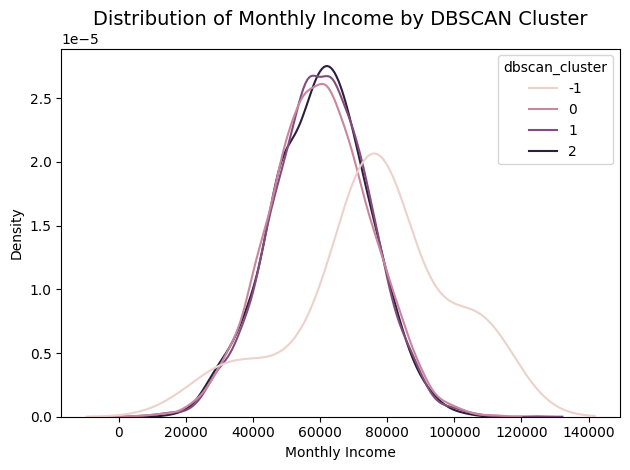

In [ ]:
sns.kdeplot(data=df_seg, x='monthly_income', hue='dbscan_cluster', common_norm=False)
plt.title("Distribution of Monthly Income by DBSCAN Cluster", fontsize=14)
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

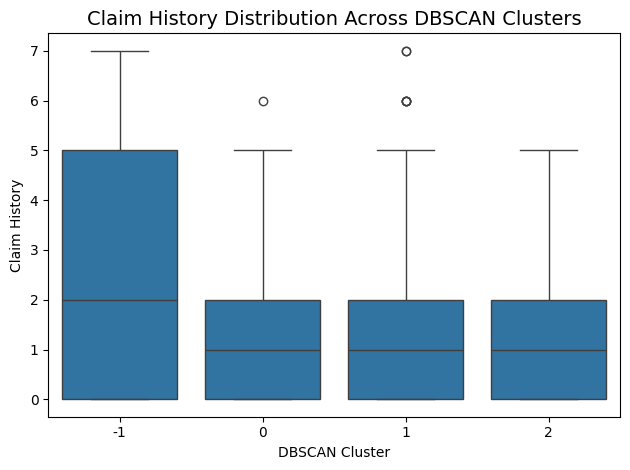

In [ ]:
sns.boxplot(data=df_seg, x='dbscan_cluster', y='claim_history')
plt.title("Claim History Distribution Across DBSCAN Clusters", fontsize=14)
plt.xlabel("DBSCAN Cluster")
plt.ylabel("Claim History")
plt.tight_layout()
plt.show()

-1(Outliers)   ==> Anomalous Heavy Users - High claims & high number of policies → possible over-claimers or outliers

0              ==> Engaged Customers - Moderate claims and upgrades, balanced engagement

1              ==> Passive Customers - Same claims & income, but (no upgrades)
                                    
2              ==> Upgrade Enthusiasts - Very high upgrade score — likely interested in new offers    

In [ ]:
df_seg.head()

customer_age  monthly_income  claim_history  policy_upgrade  \
0            45        57926.04              0               1   
1            52        52957.88              0               0   
2            27        64713.71              2               0   
3            33        50990.42              1               0   
4            24        76379.88              0               0   

   total_premium_paid  num_active_policies  location_Chicago  location_Dallas  \
0             1100.36                    1              True            False   
1             1038.41                    1              True            False   
2             1127.81                    1              True            False   
3             1086.71                    1             False            False   
4             1072.40                    1             False            False   

   location_Houston  location_Los Angeles  location_New York  dbscan_cluster  \
0             False                 False              False               0   
1             False                 False              False               1   
2             False                 False              False               1   
3              True                 False              False               1   
4              True                 False              False               1   

        PC1       PC2       PC3  
0 -0.596192 -0.464653 -0.913423  
1 -0.958674 -1.643219  0.056035  
2  0.428349 -0.057522  0.632862  
3 -0.267318 -0.838408 -0.079257  
4  1.342538 -1.197601 -0.295193

#### **PCA (Principal Component Analysis)**

In [ ]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
components = pca.fit_transform(x_dbscan)
df_seg['PC1'] = components[:, 0]
df_seg['PC2'] = components[:, 1]

fig = px.scatter(
    df_seg,
    x='PC1',
    y='PC2',
    color='dbscan_cluster',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title=' Customer Segments (KMeans Clusters - PCA)',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
    hover_data=['customer_age', 'monthly_income', 'claim_history']  # Optional
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(
    template='plotly_white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend_title="Behavior Segment"
)

fig.show()

In [ ]:
df_seg.head()

customer_age  monthly_income  claim_history  policy_upgrade  \
0            45        57926.04              0               1   
1            52        52957.88              0               0   
2            27        64713.71              2               0   
3            33        50990.42              1               0   
4            24        76379.88              0               0   

   total_premium_paid  num_active_policies  location_Chicago  location_Dallas  \
0             1100.36                    1              True            False   
1             1038.41                    1              True            False   
2             1127.81                    1              True            False   
3             1086.71                    1             False            False   
4             1072.40                    1             False            False   

   location_Houston  location_Los Angeles  location_New York  dbscan_cluster  \
0             False                 False              False               0   
1             False                 False              False               1   
2             False                 False              False               1   
3              True                 False              False               1   
4              True                 False              False               1   

        PC1       PC2       PC3  
0 -0.596192 -0.464653 -0.913423  
1 -0.958674 -1.643219  0.056035  
2  0.428349 -0.057522  0.632862  
3 -0.267318 -0.838408 -0.079257  
4  1.342538 -1.197601 -0.295193

In [ ]:
# Step 1: Apply PCA to reduce features to 3 components
pca = PCA(n_components=3)
components = pca.fit_transform(x_dbscan)  # x = your scaled feature matrix

# Step 2: Add PCA components to the DataFrame
df_seg['PC1'] = components[:, 0]
df_seg['PC2'] = components[:, 1]
df_seg['PC3'] = components[:, 2]

# Step 3: Create interactive 3D scatter plot
fig = px.scatter_3d(
    df_seg,
    x='PC1',
    y='PC2',
    z='PC3',
    color='dbscan_cluster',  # Cluster label
    title='Customer Segments in 3D (PCA + DBSCAN)',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    opacity=0.8
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(template='plotly_white', legend_title="Cluster")
fig.show()

In [ ]:
df_seg.head()

customer_age  monthly_income  claim_history  policy_upgrade  \
0            45        57926.04              0               1   
1            52        52957.88              0               0   
2            27        64713.71              2               0   
3            33        50990.42              1               0   
4            24        76379.88              0               0   

   total_premium_paid  num_active_policies  location_Chicago  location_Dallas  \
0             1100.36                    1              True            False   
1             1038.41                    1              True            False   
2             1127.81                    1              True            False   
3             1086.71                    1             False            False   
4             1072.40                    1             False            False   

   location_Houston  location_Los Angeles  location_New York  dbscan_cluster  \
0             False                 False              False               0   
1             False                 False              False               1   
2             False                 False              False               1   
3              True                 False              False               1   
4              True                 False              False               1   

        PC1       PC2       PC3  
0 -0.596192 -0.464653 -0.913423  
1 -0.958674 -1.643219  0.056035  
2  0.428349 -0.057522  0.632862  
3 -0.267318 -0.838408 -0.079257  
4  1.342538 -1.197601 -0.295193

#### **Train KNN Classifier**

In [ ]:
# Keep only points assigned to a real cluster
x_core = x_dbscan[cluster_labels != -1]
y_core = cluster_labels[cluster_labels != -1]

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_core, y_core)

KNeighborsClassifier()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_core, y_core, test_size=0.2, random_state=42)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9986899563318777

Confusion Matrix:
 [[ 921    3    0]
 [   0 1134    0]
 [   0    0  232]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00      1134
           2       1.00      1.00      1.00       232

    accuracy                           1.00      2290
   macro avg       1.00      1.00      1.00      2290
weighted avg       1.00      1.00      1.00      2290



### **Manual Prediction**

In [ ]:
# Example new input: age, income, claims, upgrade score, num_policies
new_customer = np.array([[37, 33949, 2, 1, 1]], dtype=float)

# Scale new input
new_customer_scaled = scaler.transform(new_customer)

# Predict DBSCAN-like cluster using KNN
predicted_cluster = knn_model.predict(new_customer_scaled)[0]
print(" Predicted Cluster (via KNN):", predicted_cluster)

# Interpret prediction
if predicted_cluster==0:
    print("Cluster Status:", predicted_cluster, "→ Engaged Upgraders")
elif predicted_cluster==1:
    print("Cluster Status:", predicted_cluster, "→ Passive Customers")
elif predicted_cluster==2:
    print("Cluster Status:", predicted_cluster, "→ Upgrade Enthusiasts")
else:
    print("Cluster Status:", predicted_cluster, "-1(Outliers)")

 Predicted Cluster (via KNN): 0
Cluster Status: 0 → Engaged Upgraders


In [ ]:
# Example new input: age, income, claims, upgrade score, num_policies
new_customer = np.array([[36,79106,1,0,6]], dtype=float)

# Scale new input
new_customer_scaled = scaler.transform(new_customer)

# Predict DBSCAN-like cluster using KNN
predicted_cluster = knn_model.predict(new_customer_scaled)[0]
print(" Predicted Cluster (via KNN):", predicted_cluster)

# Interpret prediction
if predicted_cluster==0:
    print("Cluster Status:", predicted_cluster, "→ Engaged Upgraders")
elif predicted_cluster==1:
    print("Cluster Status:", predicted_cluster, "→ Passive Customers")
elif predicted_cluster==2:
    print("Cluster Status:", predicted_cluster, "→ Upgrade Enthusiasts")
else:
    print("Cluster Status:", predicted_cluster, "-1(Outliers)")

 Predicted Cluster (via KNN): 1
Cluster Status: 1 → Passive Customers


In [ ]:
# Example new input: age, income, claims, upgrade score, num_policies
new_customer = np.array([[30,84919,0,2,1]], dtype=float)

# Scale new input
new_customer_scaled = scaler.transform(new_customer)

# Predict DBSCAN-like cluster using KNN
predicted_cluster = knn_model.predict(new_customer_scaled)[0]
print(" Predicted Cluster (via KNN):", predicted_cluster)

# Interpret prediction
if predicted_cluster==0:
    print("Cluster Status:", predicted_cluster, "→ Engaged Upgraders")
elif predicted_cluster==1:
    print("Cluster Status:", predicted_cluster, "→ Passive Customers")
elif predicted_cluster==2:
    print("Cluster Status:", predicted_cluster, "→ Upgrade Enthusiasts")
else:
    print("Cluster Status:", predicted_cluster, "-1(Outliers)")

 Predicted Cluster (via KNN): 2
Cluster Status: 2 → Upgrade Enthusiasts


### **Save the Model**

In [ ]:
with open('cus_seg_dbscan.pkl', 'wb') as file:
    pickle.dump(dbscan, file)

with open('cus_seg_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('cus_seg_knn_dbscan.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

In [ ]:
files.download('cus_seg_dbscan.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('cus_seg_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('cus_seg_knn_dbscan.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Open the Model and use it**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import pickle

In [ ]:
uploaded = files.upload()

Saving cus_seg_knn_dbscan.pkl to cus_seg_knn_dbscan (1).pkl
Saving cus_seg_scaler.pkl to cus_seg_scaler (1).pkl


In [ ]:
# Load saved models
with open('cus_seg_knn_dbscan.pkl', 'rb') as file:
    knn_model= pickle.load(file)

with open('cus_seg_scaler.pkl', 'rb') as file:
    scaler= pickle.load(file)

In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[18,41026,1,1,1]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

# Make prediction
prediction = knn_model.predict(new_customer_scaled)
cluster_status = prediction[0]

# Interpret result
if cluster_status == 0:
    print("Cluster Status:", cluster_status, "→ Engaged Upgraders")
elif cluster_status == 1:
    print("Cluster Status:", cluster_status, "→ Multi-Policy Loyalists")
elif cluster_status == 2:
    print("Cluster Status:", cluster_status, "→ Low Engagement Users")

Cluster Status: 0 → Engaged Upgraders


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[33,50990,1,0,1]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

# Make prediction
prediction = knn_model.predict(new_customer_scaled)
cluster_status = prediction[0]

# Interpret result
if cluster_status == 0:
    print("Cluster Status:", cluster_status, "→ Engaged Upgraders")
elif cluster_status == 1:
    print("Cluster Status:", cluster_status, "→ Multi-Policy Loyalists")
elif cluster_status == 2:
    print("Cluster Status:", cluster_status, "→ Low Engagement Users")

Cluster Status: 1 → Multi-Policy Loyalists


In [ ]:
# Input data: customer_age, monthly_income, claim_history, policy_upgrade, num_active_policies
input_data = np.array([[32,51114,0,2,1]], dtype=float)

# Convert to numpy array and reshape
new_customer_scaled = scaler.transform(input_data)

# Make prediction
prediction = knn_model.predict(new_customer_scaled)
cluster_status = prediction[0]

# Interpret result
if cluster_status == 0:
    print("Cluster Status:", cluster_status, "→ Engaged Upgraders")
elif cluster_status == 1:
    print("Cluster Status:", cluster_status, "→ Multi-Policy Loyalists")
elif cluster_status == 2:
    print("Cluster Status:", cluster_status, "→ Low Engagement Users")

Cluster Status: 2 → Low Engagement Users


## **Multilingual Policy**

### **Upload and load dataset**

In [ ]:
from google.colab import files
# upload the data

uploaded = files.upload()

Saving policy_texts_en.csv to policy_texts_en.csv


In [ ]:
# Create an empty dictionary to store dataframes
dataframes = {}

# Load each file into a separate DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    dataframes[file_name] = df
    print(f"Dataset '{file_name}' uploaded successfully!")

Dataset 'policy_texts_en.csv' uploaded successfully!


In [ ]:
df = dataframes["policy_texts_en.csv"]

### **Data set**

In [ ]:
df.head()

policy_id policy_type  premium_amount  monthly_income  \
0  POL100000    Property         1100.36        57926.04   
1  POL100001        Auto         1038.41        52957.88   
2  POL100002        Auto         1127.81        64713.71   
3  POL100003        Life         1086.71        50990.42   
4  POL100004        Life         1072.40        76379.88   

   vehicle_or_property_age  claim_history  num_active_policies  \
0                        6              0                    1   
1                        6              0                    1   
2                        3              2                    1   
3                        4              1                    1   
4                       10              0                    1   

                                      Policy_Text_EN  
0  Designed to protect against loss or damage to ...  
1  This policy provides comprehensive coverage fo...  
2  This policy provides comprehensive coverage fo...  
3  Designed to protect against the insured's fami...  
4  This policy provides comprehensive coverage fo...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15998 entries, 0 to 15997
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   policy_id                15998 non-null  object 
 1   policy_type              15998 non-null  object 
 2   premium_amount           15998 non-null  float64
 3   monthly_income           10000 non-null  float64
 4   vehicle_or_property_age  15998 non-null  int64  
 5   claim_history            15998 non-null  int64  
 6   num_active_policies      15998 non-null  int64  
 7   Policy_Text_EN           15998 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 1000.0+ KB


### **Import library & translaction**

In [ ]:
!pip install transformers sentencepiece --quiet

In [ ]:
from transformers import MarianMTModel, MarianTokenizer
import pandas as pd
import torch

In [ ]:
# 1. Select sample of 100 rows

df_sample = df.head(100).copy()  # Work only on first 100 rows
df_sample = df_sample.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample['Policy_Text_FR'] = translate_texts(df_sample['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample['Policy_Text_HI'] = translate_texts(df_sample['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample['Policy_Text_ES'] = translate_texts(df_sample['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample.to_csv("insurance_translated_sample.csv", index=False)
print("✅ Translation for 100 rows completed and saved to insurance_translated_sample.csv")

pytorch_model.bin:  70%|######9   | 210M/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

✅ Translation for 100 rows completed and saved to insurance_translated_sample.csv


In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   policy_id                100 non-null    object 
 1   policy_type              100 non-null    object 
 2   premium_amount           100 non-null    float64
 3   monthly_income           66 non-null     float64
 4   vehicle_or_property_age  100 non-null    int64  
 5   claim_history            100 non-null    int64  
 6   num_active_policies      100 non-null    int64  
 7   Policy_Text_EN           100 non-null    object 
 8   Policy_Text_FR           100 non-null    object 
 9   Policy_Text_HI           100 non-null    object 
 10  Policy_Text_ES           100 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 8.7+ KB


In [ ]:
# 1. Select rows 101 to 200

df_sample1 = df.iloc[100:201].copy()  # rows 100–201
df_sample1 = df_sample1.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample1['Policy_Text_FR'] = translate_texts(df_sample1['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample1['Policy_Text_HI'] = translate_texts(df_sample1['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample1['Policy_Text_ES'] = translate_texts(df_sample1['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample1.to_csv("insurance_translated_sample1.csv", index=False)
print("✅ Translation for 101 rows completed and saved to insurance_translated_sample1.csv")

✅ Translation for 100 rows completed and saved to insurance_translated_sample.csv


In [ ]:
# 1. Select rows 201 to 401

df_sample2 = df.iloc[201:401].copy()  # rows 201-401
df_sample2 = df_sample2.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample2['Policy_Text_FR'] = translate_texts(df_sample2['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample2['Policy_Text_HI'] = translate_texts(df_sample2['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample2['Policy_Text_ES'] = translate_texts(df_sample2['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample2.to_csv("insurance_translated_sample2.csv", index=False)
print("✅ Translation for 200 rows completed and saved to insurance_translated_sample2.csv")

✅ Translation for 200 rows completed and saved to insurance_translated_sample2.csv


In [ ]:
# 1. Select rows 401 to 701

df_sample3 = df.iloc[401:701].copy()  # rows 401-701
df_sample3 = df_sample3.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample3['Policy_Text_FR'] = translate_texts(df_sample3['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample3['Policy_Text_HI'] = translate_texts(df_sample3['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample3['Policy_Text_ES'] = translate_texts(df_sample3['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample3.to_csv("insurance_translated_sample3.csv", index=False)
print("✅ Translation for 300 rows completed and saved to insurance_translated_sample3.csv")

✅ Translation for 300 rows completed and saved to insurance_translated_sample3.csv


In [ ]:
# 1. Select rows 701 to 1101

df_sample4 = df.iloc[701:1101].copy()  # rows 701-1101
df_sample4 = df_sample4.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample4['Policy_Text_FR'] = translate_texts(df_sample4['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample4['Policy_Text_HI'] = translate_texts(df_sample4['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample4['Policy_Text_ES'] = translate_texts(df_sample4['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample4.to_csv("insurance_translated_sample4.csv", index=False)
print("✅ Translation for 400 rows completed and saved to insurance_translated_sample4.csv")

✅ Translation for 400 rows completed and saved to insurance_translated_sample4.csv


In [ ]:
# 1. Select rows 1101 to 1601

df_sample5 = df.iloc[1101:1601].copy()  # rows 1101-1601
df_sample5 = df_sample5.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample5['Policy_Text_FR'] = translate_texts(df_sample5['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample5['Policy_Text_HI'] = translate_texts(df_sample5['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample5['Policy_Text_ES'] = translate_texts(df_sample5['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample5.to_csv("insurance_translated_sample5.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample5.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample5.csv


In [ ]:
# 1. Select rows 1601 to 2001

df_sample6 = df.iloc[1601:2001].copy()  # rows 1601-2001
df_sample6 = df_sample6.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample6['Policy_Text_FR'] = translate_texts(df_sample6['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample6['Policy_Text_HI'] = translate_texts(df_sample6['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample6['Policy_Text_ES'] = translate_texts(df_sample6['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample6.to_csv("insurance_translated_sample6.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample6.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample6.csv


In [ ]:
# 1. Select rows 2001 to 2301

df_sample7 = df.iloc[2001:2301].copy()  # rows 2001-2301
df_sample7 = df_sample7.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample7['Policy_Text_FR'] = translate_texts(df_sample7['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample7['Policy_Text_HI'] = translate_texts(df_sample7['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample7['Policy_Text_ES'] = translate_texts(df_sample7['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample7.to_csv("insurance_translated_sample7.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample7.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample7.csv


In [ ]:
# 1. Select rows 2301 to 2601

df_sample8 = df.iloc[2301:2601].copy()  # rows 2301-2601
df_sample8 = df_sample8.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample8['Policy_Text_FR'] = translate_texts(df_sample8['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample8['Policy_Text_HI'] = translate_texts(df_sample8['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample8['Policy_Text_ES'] = translate_texts(df_sample8['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample8.to_csv("insurance_translated_sample8.csv", index=False)
print("✅ Translation for 300 rows completed and saved to insurance_translated_sample8.csv")

✅ Translation for 300 rows completed and saved to insurance_translated_sample8.csv


In [ ]:
# 1. Select rows 2601 to 3001

df_sample9 = df.iloc[2601:3001].copy()  # rows 2601-3001
df_sample9 = df_sample9.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample9['Policy_Text_FR'] = translate_texts(df_sample9['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample9['Policy_Text_HI'] = translate_texts(df_sample9['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample9['Policy_Text_ES'] = translate_texts(df_sample9['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample9.to_csv("insurance_translated_sample9.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample9.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample9.csv


In [ ]:
# 1. Select rows 3001 to 3301

df_sample10 = df.iloc[3001:3301].copy()  # rows 3001-3301
df_sample10 = df_sample10.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample10['Policy_Text_FR'] = translate_texts(df_sample10['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample10['Policy_Text_HI'] = translate_texts(df_sample10['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample10['Policy_Text_ES'] = translate_texts(df_sample10['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample10.to_csv("insurance_translated_sample10.csv", index=False)
print("✅ Translation for 300 rows completed and saved to insurance_translated_sample10.csv")

✅ Translation for 300 rows completed and saved to insurance_translated_sample10.csv


In [ ]:
# 1. Select rows 3301 to 3601

df_sample11 = df.iloc[3301:3601].copy()  # rows 3301-3601
df_sample11 = df_sample11.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample11['Policy_Text_FR'] = translate_texts(df_sample11['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample11['Policy_Text_HI'] = translate_texts(df_sample11['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample11['Policy_Text_ES'] = translate_texts(df_sample11['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample11.to_csv("insurance_translated_sample11.csv", index=False)
print("✅ Translation for 300 rows completed and saved to insurance_translated_sample11.csv")

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

✅ Translation for 300 rows completed and saved to insurance_translated_sample11.csv


In [ ]:
# 1. Select rows 3601 to 4001

df_sample12 = df.iloc[3601:4001].copy()  # rows 3601-4001
df_sample12 = df_sample12.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample12['Policy_Text_FR'] = translate_texts(df_sample12['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample12['Policy_Text_HI'] = translate_texts(df_sample12['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample12['Policy_Text_ES'] = translate_texts(df_sample12['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample12.to_csv("insurance_translated_sample12.csv", index=False)
print("✅ Translation for 400 rows completed and saved to insurance_translated_sample12.csv")

✅ Translation for 400 rows completed and saved to insurance_translated_sample12.csv


In [ ]:
# 1. Select rows 4001 to 4401

df_sample13 = df.iloc[4001:4401].copy()  # rows 4001-4401
df_sample13 = df_sample13.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample13['Policy_Text_FR'] = translate_texts(df_sample13['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample13['Policy_Text_HI'] = translate_texts(df_sample13['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample13['Policy_Text_ES'] = translate_texts(df_sample13['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample13.to_csv("insurance_translated_sample13.csv", index=False)
print("✅ Translation for 400 rows completed and saved to insurance_translated_sample13.csv")

✅ Translation for 400 rows completed and saved to insurance_translated_sample13.csv


In [ ]:
# 1. Select rows 4401 to 4701

df_sample14 = df.iloc[4401:4701].copy()  # rows 4401-4701
df_sample14 = df_sample14.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample14['Policy_Text_FR'] = translate_texts(df_sample14['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample14['Policy_Text_HI'] = translate_texts(df_sample14['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample14['Policy_Text_ES'] = translate_texts(df_sample14['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample14.to_csv("insurance_translated_sample14.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample14.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample14.csv


In [ ]:
# 1. Select rows 4701 to 5001

df_sample15 = df.iloc[4701:5001].copy()  # rows 4701-5001
df_sample15 = df_sample15.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample15['Policy_Text_FR'] = translate_texts(df_sample15['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample15['Policy_Text_HI'] = translate_texts(df_sample15['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample15['Policy_Text_ES'] = translate_texts(df_sample15['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample15.to_csv("insurance_translated_sample15.csv", index=False)
print("✅ Translation for 300 rows completed and saved to insurance_translated_sample15.csv")

✅ Translation for 300 rows completed and saved to insurance_translated_sample15.csv


In [ ]:
 # 1. Select rows 5001 to 5501

df_sample16 = df.iloc[5001:5501].copy()  # rows 5001-5501
df_sample16 = df_sample16.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample16['Policy_Text_FR'] = translate_texts(df_sample16['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample16['Policy_Text_HI'] = translate_texts(df_sample16['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample16['Policy_Text_ES'] = translate_texts(df_sample16['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample16.to_csv("insurance_translated_sample16.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample16.csv")

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

✅ Translation for 500 rows completed and saved to insurance_translated_sample16.csv


In [ ]:
# 1. Select rows 5501 to 6001

df_sample17 = df.iloc[5501:6001].copy()  # rows 5501-6001
df_sample17 = df_sample17.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample17['Policy_Text_FR'] = translate_texts(df_sample17['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample17['Policy_Text_HI'] = translate_texts(df_sample17['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample17['Policy_Text_ES'] = translate_texts(df_sample17['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample17.to_csv("insurance_translated_sample17.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample17.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample17.csv


In [ ]:
# 1. Select rows 6001 to 6501

df_sample18 = df.iloc[6001:6501].copy()  # rows 6001-6501
df_sample18 = df_sample18.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample18['Policy_Text_FR'] = translate_texts(df_sample18['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample18['Policy_Text_HI'] = translate_texts(df_sample18['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample18['Policy_Text_ES'] = translate_texts(df_sample18['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample18.to_csv("insurance_translated_sample18.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample18.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample18.csv


In [ ]:
# 1. Select rows 6501 to 7001

df_sample19 = df.iloc[6501:7001].copy()  # rows 6501-7001
df_sample19 = df_sample19.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample19['Policy_Text_FR'] = translate_texts(df_sample19['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample19['Policy_Text_HI'] = translate_texts(df_sample19['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample19['Policy_Text_ES'] = translate_texts(df_sample19['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample19.to_csv("insurance_translated_sample19.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample19.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample19.csv


In [ ]:
# 1. Select rows 7001 to 7501

df_sample20 = df.iloc[7001:7501].copy()  # rows 7001-7501
df_sample20 = df_sample20.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample20['Policy_Text_FR'] = translate_texts(df_sample20['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample20['Policy_Text_HI'] = translate_texts(df_sample20['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample20['Policy_Text_ES'] = translate_texts(df_sample20['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample20.to_csv("insurance_translated_sample20.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample20.csv")

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

✅ Translation for 500 rows completed and saved to insurance_translated_sample20.csv


In [ ]:
# 1. Select rows 7501 to 8001

df_sample21 = df.iloc[7501:8001].copy()  # rows 7501-8001
df_sample21 = df_sample21.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample21['Policy_Text_FR'] = translate_texts(df_sample21['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample21['Policy_Text_HI'] = translate_texts(df_sample21['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample21['Policy_Text_ES'] = translate_texts(df_sample21['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample21.to_csv("insurance_translated_sample21.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample21.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample21.csv


In [ ]:
# 1. Select rows 8001 to 8501

df_sample22 = df.iloc[8001:8501].copy()  # rows 8001-8501
df_sample22 = df_sample22.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample22['Policy_Text_FR'] = translate_texts(df_sample22['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample22['Policy_Text_HI'] = translate_texts(df_sample22['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample22['Policy_Text_ES'] = translate_texts(df_sample22['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample22.to_csv("insurance_translated_sample22.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample22.csv")

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

✅ Translation for 500 rows completed and saved to insurance_translated_sample22.csv


In [ ]:
# 1. Select rows 8501 to 9001

df_sample23 = df.iloc[8501:9001].copy()  # rows 8501-9001
df_sample23 = df_sample23.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample23['Policy_Text_FR'] = translate_texts(df_sample23['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample23['Policy_Text_HI'] = translate_texts(df_sample23['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample23['Policy_Text_ES'] = translate_texts(df_sample23['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample23.to_csv("insurance_translated_sample23.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample23.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample23.csv


In [ ]:
# 1. Select rows 9001 to 9501

df_sample24 = df.iloc[9001:9501].copy()  # rows 9001-9501
df_sample24 = df_sample24.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample24['Policy_Text_FR'] = translate_texts(df_sample24['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample24['Policy_Text_HI'] = translate_texts(df_sample24['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample24['Policy_Text_ES'] = translate_texts(df_sample24['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample24.to_csv("insurance_translated_sample24.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample24.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample24.csv


In [ ]:
# 1. Select rows 9501 to 10001

df_sample25 = df.iloc[9501:10001].copy()  # rows 9501-10001
df_sample25 = df_sample25.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample25['Policy_Text_FR'] = translate_texts(df_sample25['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample25['Policy_Text_HI'] = translate_texts(df_sample25['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample25['Policy_Text_ES'] = translate_texts(df_sample25['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample25.to_csv("insurance_translated_sample25.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample25.csv")

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

✅ Translation for 500 rows completed and saved to insurance_translated_sample25.csv


In [ ]:
# 1. Select rows 10001 to 10501

df_sample26 = df.iloc[10001:10501].copy()  # rows 10001-10501
df_sample26 = df_sample26.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample26['Policy_Text_FR'] = translate_texts(df_sample26['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample26['Policy_Text_HI'] = translate_texts(df_sample26['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample26['Policy_Text_ES'] = translate_texts(df_sample26['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample26.to_csv("insurance_translated_sample26.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample26.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample26.csv


In [ ]:
# 1. Select rows 10501 to 11001

df_sample27 = df.iloc[10501:11001].copy()  # rows 10501-11001
df_sample27 = df_sample27.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample27['Policy_Text_FR'] = translate_texts(df_sample27['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample27['Policy_Text_HI'] = translate_texts(df_sample27['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample27['Policy_Text_ES'] = translate_texts(df_sample27['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample27.to_csv("insurance_translated_sample27.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample27.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample27.csv


In [ ]:
# 1. Select rows 11001 to 11501

df_sample28 = df.iloc[11001:11501].copy()  # rows 11001-11501
df_sample28 = df_sample28.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample28['Policy_Text_FR'] = translate_texts(df_sample28['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample28['Policy_Text_HI'] = translate_texts(df_sample28['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample28['Policy_Text_ES'] = translate_texts(df_sample28['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample28.to_csv("insurance_translated_sample28.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample28.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample28.csv


In [ ]:
# 1. Select rows 11501 to 12001

df_sample29 = df.iloc[11501:12001].copy()  # rows 11501-12001
df_sample29 = df_sample29.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample29['Policy_Text_FR'] = translate_texts(df_sample29['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample29['Policy_Text_HI'] = translate_texts(df_sample29['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample29['Policy_Text_ES'] = translate_texts(df_sample29['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample29.to_csv("insurance_translated_sample29.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample29.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample29.csv


In [ ]:
# 1. Select rows 12001 to 12501

df_sample30 = df.iloc[12001:12501].copy()  # rows 12001-12501
df_sample30 = df_sample30.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample30['Policy_Text_FR'] = translate_texts(df_sample30['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample30['Policy_Text_HI'] = translate_texts(df_sample30['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample30['Policy_Text_ES'] = translate_texts(df_sample30['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample30.to_csv("insurance_translated_sample30.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample30.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample30.csv


In [ ]:
# 1. Select rows 12501 to 13001

df_sample31 = df.iloc[12501:13001].copy()  # rows 12501-13001
df_sample31 = df_sample31.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample31['Policy_Text_FR'] = translate_texts(df_sample31['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample31['Policy_Text_HI'] = translate_texts(df_sample31['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample31['Policy_Text_ES'] = translate_texts(df_sample31['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample31.to_csv("insurance_translated_sample31.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample31.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample31.csv


In [ ]:
# 1. Select rows 13001 to 13501

df_sample32 = df.iloc[13001:13501].copy()  # rows 13001-13501
df_sample32 = df_sample32.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample32['Policy_Text_FR'] = translate_texts(df_sample32['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample32['Policy_Text_HI'] = translate_texts(df_sample32['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample32['Policy_Text_ES'] = translate_texts(df_sample32['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample32.to_csv("insurance_translated_sample32.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample32.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample32.csv


In [ ]:
# 1. Select rows 13501 to 14001

df_sample33 = df.iloc[13501:14001].copy()  # rows 13501-14001
df_sample33 = df_sample33.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample33['Policy_Text_FR'] = translate_texts(df_sample33['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample33['Policy_Text_HI'] = translate_texts(df_sample33['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample33['Policy_Text_ES'] = translate_texts(df_sample33['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample33.to_csv("insurance_translated_sample33.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample33.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample33.csv


In [ ]:
# 1. Select rows 14001 to 14501

df_sample34 = df.iloc[14001:14501].copy()  # rows 14001-14501
df_sample34 = df_sample34.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample34['Policy_Text_FR'] = translate_texts(df_sample34['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample34['Policy_Text_HI'] = translate_texts(df_sample34['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample34['Policy_Text_ES'] = translate_texts(df_sample34['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample34.to_csv("insurance_translated_sample34.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample34.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample34.csv


In [ ]:
# 1. Select rows 14501 to 15001

df_sample35 = df.iloc[14501:15001].copy()  # rows 14501-15001
df_sample35 = df_sample35.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample35['Policy_Text_FR'] = translate_texts(df_sample35['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample35['Policy_Text_HI'] = translate_texts(df_sample35['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample35['Policy_Text_ES'] = translate_texts(df_sample35['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample35.to_csv("insurance_translated_sample35.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample35.csv")

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

✅ Translation for 500 rows completed and saved to insurance_translated_sample35.csv


In [ ]:
# 1. Select rows 15001 to 15501

df_sample36 = df.iloc[15001:15501].copy()  # rows 15001-15501
df_sample36 = df_sample36.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample36['Policy_Text_FR'] = translate_texts(df_sample36['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample36['Policy_Text_HI'] = translate_texts(df_sample36['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample36['Policy_Text_ES'] = translate_texts(df_sample36['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")

# 4. Save sample translations

df_sample36.to_csv("insurance_translated_sample36.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample36.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample36.csv


In [ ]:
# 1. Select rows 15501 to 16000

df_sample37 = df.iloc[15501:].copy()  # rows 15501-15999
df_sample37 = df_sample37.dropna(subset=['Policy_Text_EN']).reset_index(drop=True)


# 2. Function to translate using MarianMT

def translate_texts(texts, model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translations = []
    batch_size = 8  # adjust for speed/memory
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**encoded)
        decoded = [tokenizer.decode(t, skip_special_tokens=True) for t in generated]
        translations.extend(decoded)
    return translations


# 3. Translate to French, Hindi, Spanish

df_sample37['Policy_Text_FR'] = translate_texts(df_sample37['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-fr")
df_sample37['Policy_Text_HI'] = translate_texts(df_sample37['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-hi")
df_sample37['Policy_Text_ES'] = translate_texts(df_sample37['Policy_Text_EN'].tolist(), "Helsinki-NLP/opus-mt-en-es")


# 4. Save sample translations

df_sample37.to_csv("insurance_translated_sample37.csv", index=False)
print("✅ Translation for 500 rows completed and saved to insurance_translated_sample37.csv")

✅ Translation for 500 rows completed and saved to insurance_translated_sample37.csv


### **Data policy Merge**

In [ ]:
from google.colab import files
# upload the data

uploaded = files.upload()

Saving insurance_af_cus_seg.csv to insurance_af_cus_seg.csv
Saving policy_text_translation.csv to policy_text_translation.csv


In [ ]:
# Create an empty dictionary to store dataframes
dataframes = {}

# Load each file into a separate DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    dataframes[file_name] = df
    print(f"Dataset '{file_name}' uploaded successfully!")

Dataset 'insurance_af_cus_seg.csv' uploaded successfully!
Dataset 'policy_text_translation.csv' uploaded successfully!


In [ ]:
df = dataframes["insurance_af_cus_seg.csv"]

In [ ]:
df_1 = dataframes["policy_text_translation.csv"]

In [ ]:
df.head()

claim_id  claim_date customer_id  policy_id  customer_age  gender  \
0        NaN         NaN  CUST100000  POL100000          45.0    Male   
1  CLM105285  2024-08-05  CUST100001  POL100001          52.0    Male   
2  CLM104276  2024-09-26  CUST100002  POL100002          27.0  Female   
3  CLM105586  2023-08-24  CUST100003  POL100003          33.0    Male   
4  CLM104969  2023-11-14  CUST100004  POL100004          24.0  Female   

  policy_type  monthly_income  vehicle_or_property_age  claim_history  \
0    Property        57926.04                        6              0   
1        Auto        52957.88                        6              0   
2        Auto        64713.71                        3              2   
3        Life        50990.42                        4              1   
4        Life        76379.88                       10              0   

   fraudulent_claim  premium_amount  claim_amount risk_score location  \
0                 0         1100.36        719.87        Low  Chicago   
1                 0         1038.41       1483.60        Low  Chicago   
2                 0         1127.81       2247.89        Low  Chicago   
3                 0         1086.71       3012.94        Low  Houston   
4                 1         1072.40       2710.86     Medium  Houston   

   policy_upgrade  total_premium_paid  num_active_policies  
0             1.0             1100.36                    1  
1             0.0             1038.41                    1  
2             0.0             1127.81                    1  
3             0.0             1086.71                    1  
4             0.0             1072.40                    1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17482 entries, 0 to 17481
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              17482 non-null  object 
 3   policy_id                17482 non-null  object 
 4   customer_age             11484 non-null  float64
 5   gender                   11484 non-null  object 
 6   policy_type              17482 non-null  object 
 7   monthly_income           11484 non-null  float64
 8   vehicle_or_property_age  17482 non-null  int64  
 9   claim_history            17482 non-null  int64  
 10  fraudulent_claim         17482 non-null  int64  
 11  premium_amount           17482 non-null  float64
 12  claim_amount             11484 non-null  float64
 13  risk_score               11484 non-null  object 
 14  location              

In [ ]:
df["policy_id"].nunique()

15998

In [ ]:
df_1.head()

policy_id policy_type  premium_amount  monthly_income  \
0  POL100000    Property         1100.36        57926.04   
1  POL100001        Auto         1038.41        52957.88   
2  POL100002        Auto         1127.81        64713.71   
3  POL100003        Life         1086.71        50990.42   
4  POL100004        Life         1072.40        76379.88   

   vehicle_or_property_age  claim_history  num_active_policies  \
0                        6              0                    1   
1                        6              0                    1   
2                        3              2                    1   
3                        4              1                    1   
4                       10              0                    1   

                                      Policy_Text_EN  \
0  Designed to protect against loss or damage to ...   
1  This policy provides comprehensive coverage fo...   
2  This policy provides comprehensive coverage fo...   
3  Designed to protect against the insured's fami...   
4  This policy provides comprehensive coverage fo...   

                                      Policy_Text_FR  \
0  Conçu pour protéger contre la perte ou l'endom...   
1  Cette politique prévoit une couverture complèt...   
2  Cette politique prévoit une couverture complèt...   
3  Conçu pour protéger la famille de l'assuré con...   
4  Cette police offre une protection complète à l...   

                                      Policy_Text_HI  \
0  आग, बिजली, विस्फोट, और कुछ प्राकृतिक विपत्तियो...   
1  यह नीति वाहन नुकसान के लिए व्यापक विस्तार प्रद...   
2  यह नीति वाहन नुकसान के लिए व्यापक विस्तार प्रद...   
3  जीवन की हानि के खिलाफ कैद के परिवार से बचने के...   
4  यह नीति जीवन की हानि के खिलाफ ली गई परिवार के ...   

                                      Policy_Text_ES  
0  Diseñado para proteger contra pérdidas o daños...  
1  Esta política proporciona una cobertura comple...  
2  Esta política proporciona una cobertura comple...  
3  Diseñado para proteger contra la familia del a...  
4  Esta política proporciona una cobertura comple...

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15998 entries, 0 to 15997
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   policy_id                15998 non-null  object 
 1   policy_type              15998 non-null  object 
 2   premium_amount           15998 non-null  float64
 3   monthly_income           10000 non-null  float64
 4   vehicle_or_property_age  15998 non-null  int64  
 5   claim_history            15998 non-null  int64  
 6   num_active_policies      15998 non-null  int64  
 7   Policy_Text_EN           15998 non-null  object 
 8   Policy_Text_FR           15998 non-null  object 
 9   Policy_Text_HI           15998 non-null  object 
 10  Policy_Text_ES           15998 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.3+ MB


In [ ]:
# Keep only policy_id and Policy_Text_EN in the second DataFrame
df_2 = df_1[["policy_id", "Policy_Text_EN", "Policy_Text_FR", "Policy_Text_HI", "Policy_Text_ES"]]

# Merge cleanly (no _x, _y duplicates)
df_3 = pd.merge(df, df_2, on='policy_id', how='left')

In [ ]:
df_3.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_3.columns

Index(['claim_id', 'claim_date', 'customer_id', 'policy_id', 'customer_age',
       'gender', 'policy_type', 'monthly_income', 'vehicle_or_property_age',
       'claim_history', 'fraudulent_claim', 'premium_amount', 'claim_amount',
       'risk_score', 'location', 'policy_upgrade', 'total_premium_paid',
       'num_active_policies', 'policy_text_en', 'policy_text_fr',
       'policy_text_hi', 'policy_text_es'],
      dtype='object')

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17482 entries, 0 to 17481
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              17482 non-null  object 
 3   policy_id                17482 non-null  object 
 4   customer_age             11484 non-null  float64
 5   gender                   11484 non-null  object 
 6   policy_type              17482 non-null  object 
 7   monthly_income           11484 non-null  float64
 8   vehicle_or_property_age  17482 non-null  int64  
 9   claim_history            17482 non-null  int64  
 10  fraudulent_claim         17482 non-null  int64  
 11  premium_amount           17482 non-null  float64
 12  claim_amount             11484 non-null  float64
 13  risk_score               11484 non-null  object 
 14  location              

In [ ]:
df_3.to_csv("insurance_af_policy_text.csv", index=False)

In [ ]:
files.download('insurance_af_policy_text.csv')

## **NLP**

In [ ]:
# Stopwords
nltk.download("stopwords")

# Tokenizer
nltk.download("punkt")
nltk.download('punkt_tab')

# For Lemmatizer
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### **Upload and load dataset**

In [ ]:
from google.colab import files
# upload the data

uploaded = files.upload()

Saving insurance_reviews.csv to insurance_reviews.csv


In [ ]:
# Create an empty dictionary to store dataframes
dataframes = {}

# Load each file into a separate DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    dataframes[file_name] = df
    print(f"Dataset '{file_name}' uploaded successfully!")

Dataset 'insurance_reviews.csv' uploaded successfully!


In [ ]:
df_1 = dataframes["insurance_af_policy_text.csv"]

In [ ]:
df = dataframes["insurance_reviews.csv"]

### **Data policy Merge**

In [ ]:
df_1.head()

claim_id  claim_date customer_id  policy_id  customer_age  gender  \
0        NaN         NaN  CUST100000  POL100000          45.0    Male   
1  CLM105285  2024-08-05  CUST100001  POL100001          52.0    Male   
2  CLM104276  2024-09-26  CUST100002  POL100002          27.0  Female   
3  CLM105586  2023-08-24  CUST100003  POL100003          33.0    Male   
4  CLM104969  2023-11-14  CUST100004  POL100004          24.0  Female   

  policy_type  monthly_income  vehicle_or_property_age  claim_history  ...  \
0    Property        57926.04                        6              0  ...   
1        Auto        52957.88                        6              0  ...   
2        Auto        64713.71                        3              2  ...   
3        Life        50990.42                        4              1  ...   
4        Life        76379.88                       10              0  ...   

   claim_amount  risk_score  location policy_upgrade total_premium_paid  \
0        719.87         Low   Chicago            1.0            1100.36   
1       1483.60         Low   Chicago            0.0            1038.41   
2       2247.89         Low   Chicago            0.0            1127.81   
3       3012.94         Low   Houston            0.0            1086.71   
4       2710.86      Medium   Houston            0.0            1072.40   

   num_active_policies                                     policy_text_en  \
0                    1  Designed to protect against loss or damage to ...   
1                    1  This policy provides comprehensive coverage fo...   
2                    1  This policy provides comprehensive coverage fo...   
3                    1  Designed to protect against the insured's fami...   
4                    1  This policy provides comprehensive coverage fo...   

                                      policy_text_fr  \
0  Conçu pour protéger contre la perte ou l'endom...   
1  Cette politique prévoit une couverture complèt...   
2  Cette politique prévoit une couverture complèt...   
3  Conçu pour protéger la famille de l'assuré con...   
4  Cette police offre une protection complète à l...   

                                      policy_text_hi  \
0  आग, बिजली, विस्फोट, और कुछ प्राकृतिक विपत्तियो...   
1  यह नीति वाहन नुकसान के लिए व्यापक विस्तार प्रद...   
2  यह नीति वाहन नुकसान के लिए व्यापक विस्तार प्रद...   
3  जीवन की हानि के खिलाफ कैद के परिवार से बचने के...   
4  यह नीति जीवन की हानि के खिलाफ ली गई परिवार के ...   

                                      policy_text_es  
0  Diseñado para proteger contra pérdidas o daños...  
1  Esta política proporciona una cobertura comple...  
2  Esta política proporciona una cobertura comple...  
3  Diseñado para proteger contra la familia del a...  
4  Esta política proporciona una cobertura comple...  

[5 rows x 22 columns]

In [ ]:
df_1.shape

(17482, 22)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17482 entries, 0 to 17481
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6000 non-null   object 
 1   claim_date               6000 non-null   object 
 2   customer_id              17482 non-null  object 
 3   policy_id                17482 non-null  object 
 4   customer_age             11484 non-null  float64
 5   gender                   11484 non-null  object 
 6   policy_type              17482 non-null  object 
 7   monthly_income           11484 non-null  float64
 8   vehicle_or_property_age  17482 non-null  int64  
 9   claim_history            17482 non-null  int64  
 10  fraudulent_claim         17482 non-null  int64  
 11  premium_amount           17482 non-null  float64
 12  claim_amount             11484 non-null  float64
 13  risk_score               11484 non-null  object 
 14  location              

In [ ]:
df.head()

Review_ID Customer_ID                                Review_Text  \
0    R00001  CUST101136         Service was okay, nothing special.   
1    R00002  CUST106710          Had to wait weeks for a response.   
2    R00003  CUST100055  Average experience, neither good nor bad.   
3    R00004  CUST100825         Support was fine, not exceptional.   
4    R00005  CUST104860      Bought the policy without any issues.   

  Sentiment_Label  Rating      Service_Type  
0         Neutral       3   Policy Purchase  
1        Negative       2   Policy Purchase  
2         Neutral       3   Policy Purchase  
3         Neutral       3             Claim  
4         Neutral       3  Customer Support

In [ ]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['review_id', 'customer_id', 'review_text', 'sentiment_label', 'rating',
       'service_type'],
      dtype='object')

In [ ]:
df.shape

(5000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_id        5000 non-null   object
 1   customer_id      5000 non-null   object
 2   review_text      5000 non-null   object
 3   sentiment_label  5000 non-null   object
 4   rating           5000 non-null   int64 
 5   service_type     5000 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [ ]:
df["customer_id"].nunique() # 3962 unique customer have made reviews

3962

In [ ]:
df["review_id"].nunique() # 5000 unique review have been received

5000

In [ ]:
df_merged=pd.merge(df_1,df, left_on="customer_id", right_on="customer_id", how="left" )
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19303 entries, 0 to 19302
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6637 non-null   object 
 1   claim_date               6637 non-null   object 
 2   customer_id              19303 non-null  object 
 3   policy_id                19303 non-null  object 
 4   customer_age             12674 non-null  float64
 5   gender                   12674 non-null  object 
 6   policy_type              19303 non-null  object 
 7   monthly_income           12674 non-null  float64
 8   vehicle_or_property_age  19303 non-null  int64  
 9   claim_history            19303 non-null  int64  
 10  fraudulent_claim         19303 non-null  int64  
 11  premium_amount           19303 non-null  float64
 12  claim_amount             12674 non-null  float64
 13  risk_score               12674 non-null  object 
 14  location              

In [ ]:
print(df_merged.duplicated().sum())

0


In [ ]:
df_merged.isnull().sum()

claim_id                   12666
claim_date                 12666
customer_id                    0
policy_id                      0
customer_age                6629
gender                      6629
policy_type                    0
monthly_income              6629
vehicle_or_property_age        0
claim_history                  0
fraudulent_claim               0
premium_amount                 0
claim_amount                6629
risk_score                  6629
location                    6629
policy_upgrade              6629
total_premium_paid             0
num_active_policies            0
policy_text_en                 0
policy_text_fr                 0
policy_text_hi                 0
policy_text_es                 0
review_id                  10448
review_text                10448
sentiment_label            10448
rating                     10448
service_type               10448
dtype: int64

In [ ]:
df_merged.to_csv("insurance_af_reviews.csv", index=False)

In [ ]:
files.download('insurance_af_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Data cleaning & Preprocessing**

In [ ]:
df.head()

review_id customer_id                                review_text  \
0    R00001  CUST101136         Service was okay, nothing special.   
1    R00002  CUST106710          Had to wait weeks for a response.   
2    R00003  CUST100055  Average experience, neither good nor bad.   
3    R00004  CUST100825         Support was fine, not exceptional.   
4    R00005  CUST104860      Bought the policy without any issues.   

  sentiment_label  rating      service_type  
0         Neutral       3   Policy Purchase  
1        Negative       2   Policy Purchase  
2         Neutral       3   Policy Purchase  
3         Neutral       3             Claim  
4         Neutral       3  Customer Support

In [ ]:
df.shape

(5000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_id        5000 non-null   object
 1   customer_id      5000 non-null   object
 2   review_text      5000 non-null   object
 3   sentiment_label  5000 non-null   object
 4   rating           5000 non-null   int64 
 5   service_type     5000 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.isnull().sum()

review_id          0
customer_id        0
review_text        0
sentiment_label    0
rating             0
service_type       0
dtype: int64

In [ ]:
df.describe(include="all")

review_id customer_id                         review_text  \
count       5000        5000                                5000   
unique      5000        3962                                  15   
top       R05000  CUST103857  Service was okay, nothing special.   
freq           1           4                                 368   
mean         NaN         NaN                                 NaN   
std          NaN         NaN                                 NaN   
min          NaN         NaN                                 NaN   
25%          NaN         NaN                                 NaN   
50%          NaN         NaN                                 NaN   
75%          NaN         NaN                                 NaN   
max          NaN         NaN                                 NaN   

       sentiment_label      rating     service_type  
count             5000  5000.00000             5000  
unique               3         NaN                3  
top           Negative         NaN  Policy Purchase  
freq              1706         NaN             1695  
mean               NaN     2.98240              NaN  
std                NaN     1.29183              NaN  
min                NaN     1.00000              NaN  
25%                NaN     2.00000              NaN  
50%                NaN     3.00000              NaN  
75%                NaN     4.00000              NaN  
max                NaN     5.00000              NaN

In [ ]:
assert pd.notnull(df).all().all()

In [ ]:
df["rating"].value_counts()

rating
3    1642
2     858
1     848
4     838
5     814
Name: count, dtype: int64

In [ ]:
df["service_type"].value_counts()

service_type
Policy Purchase     1695
Customer Support    1687
Claim               1618
Name: count, dtype: int64

In [ ]:
df["sentiment_label"].value_counts()

sentiment_label
Negative    1706
Positive    1652
Neutral     1642
Name: count, dtype: int64

In [ ]:
df[["review_text"]]

review_text
0                   Service was okay, nothing special.
1                    Had to wait weeks for a response.
2            Average experience, neither good nor bad.
3                   Support was fine, not exceptional.
4                Bought the policy without any issues.
...                                                ...
4995           It was a typical insurance interaction.
4996  My claim was denied unfairly. Very disappointed.
4997           Great customer support. Very satisfied.
4998      The policy terms were not clearly explained.
4999             Everything went better than expected.

[5000 rows x 1 columns]

In [ ]:
df.drop(columns=["review_id", "customer_id"], inplace=True)
df.head()

review_text sentiment_label  rating  \
0         Service was okay, nothing special.         Neutral       3   
1          Had to wait weeks for a response.        Negative       2   
2  Average experience, neither good nor bad.         Neutral       3   
3         Support was fine, not exceptional.         Neutral       3   
4      Bought the policy without any issues.         Neutral       3   

       service_type  
0   Policy Purchase  
1   Policy Purchase  
2   Policy Purchase  
3             Claim  
4  Customer Support

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Convert the txt expand (can't)
    text = contractions.fix(text)

    # Remove extra spaces
    text = re.sub(' +', ' ', text)

    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)

    # Remove newline characters
    text = re.sub(r'\n', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove special characters and numbers (if any remain)
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove digits
    text = re.sub(r"\d+", "", text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords + lemmatize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["review_text"].apply(clean_text)

# View the cleaned reviews
df[['review_text', 'clean_text']].head()

review_text  \
0         Service was okay, nothing special.   
1          Had to wait weeks for a response.   
2  Average experience, neither good nor bad.   
3         Support was fine, not exceptional.   
4      Bought the policy without any issues.   

                            clean_text  
0         service okay nothing special  
1                   wait week response  
2  average experience neither good bad  
3             support fine exceptional  
4          bought policy without issue

### **EDA**

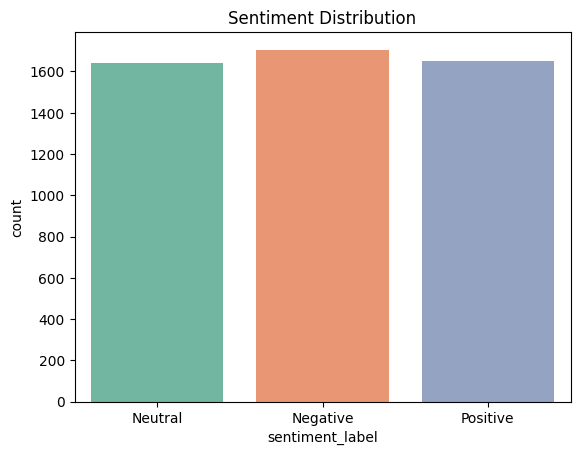

In [ ]:
# Sentiment Label

sns.countplot(data=df, x="sentiment_label", palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

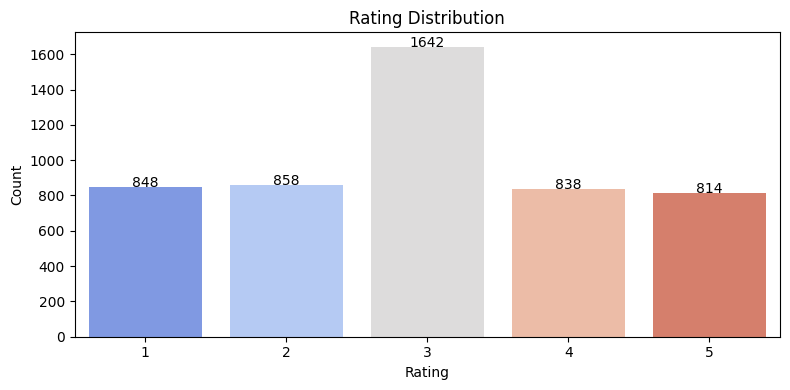

In [ ]:
# Rating

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='rating', palette='coolwarm')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center")

plt.tight_layout()
plt.show()

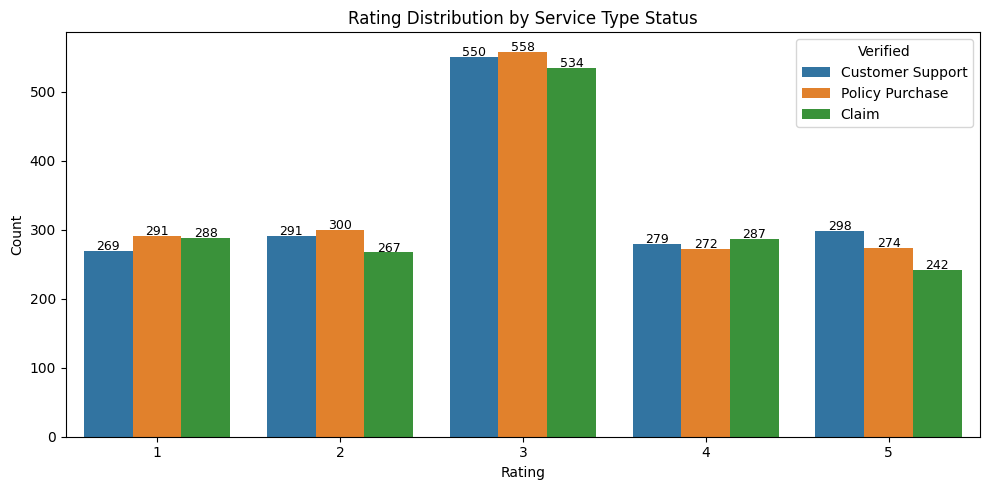

In [ ]:
# Rating vs Service Type

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='rating', hue='service_type')

plt.title('Rating Distribution by Service Type Status')
plt.xlabel('Rating')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center", fontsize=9)

plt.legend(title='Verified')
plt.tight_layout()
plt.show()

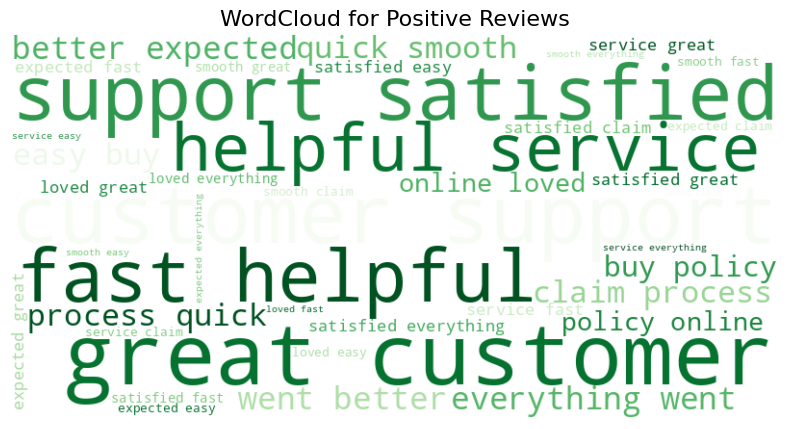

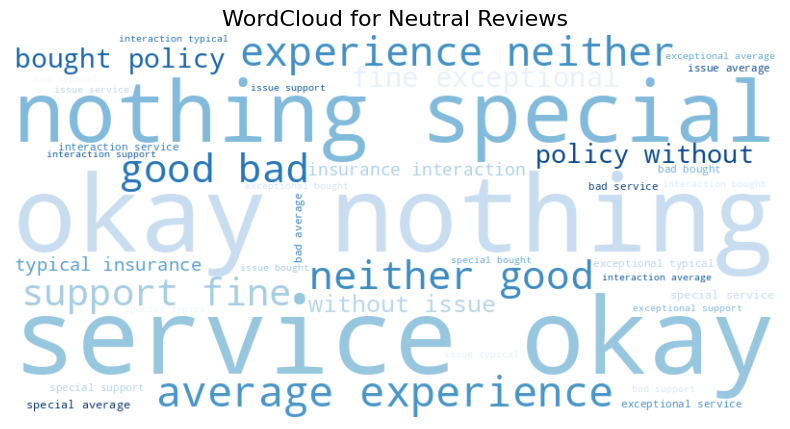

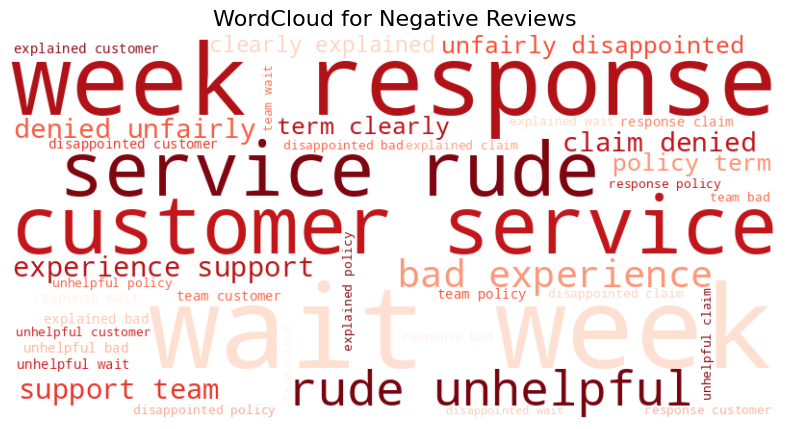

In [ ]:
# Most Mentioned Words in Sentimental label

def plot_wordcloud(sentiment, color="viridis"):
    text = " ".join(df[df["sentiment_label"] == sentiment]["clean_text"])
    wc = WordCloud(width=800, height=400, background_color="white",
                   colormap=color, max_words=200).generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Reviews", fontsize=16)
    plt.show()

# Generate WordClouds
plot_wordcloud("Positive", color="Greens")
plot_wordcloud("Neutral", color="Blues")
plot_wordcloud("Negative", color="Reds")

### **Encoding**

In [ ]:
# Count Vectorizer – Bag of Words (BoW)

# Use the cleaned review column (no punctuation)
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(df['clean_text'])

# To view feature names
print(vectorizer.get_feature_names_out())

# Shape of vectorized features
print(X_count.shape)

['average' 'bad' 'better' 'bought' 'buy' 'claim' 'clearly' 'customer'
 'denied' 'disappointed' 'easy' 'everything' 'exceptional' 'expected'
 'experience' 'explained' 'fast' 'fine' 'good' 'great' 'helpful'
 'insurance' 'interaction' 'issue' 'loved' 'neither' 'nothing' 'okay'
 'online' 'policy' 'process' 'quick' 'response' 'rude' 'satisfied'
 'service' 'smooth' 'special' 'support' 'team' 'term' 'typical' 'unfairly'
 'unhelpful' 'wait' 'week' 'went' 'without']
(5000, 48)


In [ ]:
# TF-IDF Vectorizer – Frequency with importance
# normal
tfidf_vectorizer1 = TfidfVectorizer()
x_tfidf = tfidf_vectorizer1.fit_transform(df['clean_text'])

# To view TF-IDF feature names
print(tfidf_vectorizer1.get_feature_names_out())

# Shape of TF-IDF features
print(x_tfidf.shape)

['average' 'bad' 'better' 'bought' 'buy' 'claim' 'clearly' 'customer'
 'denied' 'disappointed' 'easy' 'everything' 'exceptional' 'expected'
 'experience' 'explained' 'fast' 'fine' 'good' 'great' 'helpful'
 'insurance' 'interaction' 'issue' 'loved' 'neither' 'nothing' 'okay'
 'online' 'policy' 'process' 'quick' 'response' 'rude' 'satisfied'
 'service' 'smooth' 'special' 'support' 'team' 'term' 'typical' 'unfairly'
 'unhelpful' 'wait' 'week' 'went' 'without']
(5000, 48)


In [ ]:
# ngram(1,2)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

# To view TF-IDF feature names
print(tfidf_vectorizer.get_feature_names_out())

# Shape of TF-IDF features
print(X_tfidf.shape)

['average' 'average experience' 'bad' 'bad experience' 'better'
 'better expected' 'bought' 'bought policy' 'buy' 'buy policy' 'claim'
 'claim denied' 'claim process' 'clearly' 'clearly explained' 'customer'
 'customer service' 'customer support' 'denied' 'denied unfairly'
 'disappointed' 'easy' 'easy buy' 'everything' 'everything went'
 'exceptional' 'expected' 'experience' 'experience neither'
 'experience support' 'explained' 'fast' 'fast helpful' 'fine'
 'fine exceptional' 'good' 'good bad' 'great' 'great customer' 'helpful'
 'helpful service' 'insurance' 'insurance interaction' 'interaction'
 'issue' 'loved' 'neither' 'neither good' 'nothing' 'nothing special'
 'okay' 'okay nothing' 'online' 'online loved' 'policy' 'policy online'
 'policy term' 'policy without' 'process' 'process quick' 'quick'
 'quick smooth' 'response' 'rude' 'rude unhelpful' 'satisfied' 'service'
 'service okay' 'service rude' 'smooth' 'special' 'support' 'support fine'
 'support satisfied' 'support team' 'tea

### **Train Test Split**

In [ ]:
# normal

x = x_tfidf
Y = df['sentiment_label']

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [ ]:
# ngram(1,2)

X =X_tfidf
y = df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Smote**

In [ ]:
# normal
# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train, Y_train = smote.fit_resample(x_train, Y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(Y_train))

Before SMOTE: Counter({'Negative': 1367, 'Positive': 1341, 'Neutral': 1292})
After SMOTE: Counter({'Positive': 1367, 'Negative': 1367, 'Neutral': 1367})


In [ ]:
# ngram(1,2)
# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train))

Before SMOTE: Counter({'Negative': 1367, 'Positive': 1341, 'Neutral': 1292})
After SMOTE: Counter({'Positive': 1367, 'Negative': 1367, 'Neutral': 1367})


### **Model**

#### **LogisticRegression**

In [ ]:
# normal
log_model = LogisticRegression()

#Train the model
log_model.fit(x_train, Y_train)
# Predictions
Y_pred = log_model.predict(x_test)

print('Logitic Regression')
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = log_model.score(x_train, Y_train)
test_acc = log_model.score(x_test, Y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Logitic Regression
Accuracy: 1.00
Train Accuracy: 1.0000
Test Accuracy: 1.0000

Confusion Matrix:
 [[339   0   0]
 [  0 350   0]
 [  0   0 311]]
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       339
     Neutral       1.00      1.00      1.00       350
    Positive       1.00      1.00      1.00       311

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
cv_scores = cross_val_score(log_model, x_train, Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [ ]:
# ngram(1,2)
log = LogisticRegression()

#Train the model
log.fit(X_train, y_train)
# Predictions
y_pred = log.predict(X_test)

print('Logitic Regression')
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = log.score(X_train, y_train)
test_acc = log.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred))

Logitic Regression
Accuracy: 1.00
Train Accuracy: 1.0000
Test Accuracy: 1.0000

Confusion Matrix:
 [[339   0   0]
 [  0 350   0]
 [  0   0 311]]
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       339
     Neutral       1.00      1.00      1.00       350
    Positive       1.00      1.00      1.00       311

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
cv_scores = cross_val_score(log, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


#### **Decision Tree Classifier**

In [ ]:
# normal
dt_model = DecisionTreeClassifier(random_state=42)

#Train the model
dt_model.fit(x_train, Y_train)
# Predictions
Y_pred_dt = dt_model.predict(x_test)

print('Decision Tree Classifier')
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = dt_model.score(x_train, Y_train)
test_acc = dt_model.score(x_test, Y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(Y_test, Y_pred_dt))

Decision Tree Classifier
Accuracy: 1.00
Train Accuracy: 1.0000
Test Accuracy: 1.0000

Confusion Matrix:
 [[339   0   0]
 [  0 350   0]
 [  0   0 311]]
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       339
     Neutral       1.00      1.00      1.00       350
    Positive       1.00      1.00      1.00       311

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
cv_scores = cross_val_score(dt_model, x_train, Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [ ]:
# ngram(1,2)
dt = DecisionTreeClassifier(random_state=42)

#Train the model
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

print('Decision Tree Classifier')
# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier
Accuracy: 1.00
Train Accuracy: 1.0000
Test Accuracy: 1.0000

Confusion Matrix:
 [[339   0   0]
 [  0 350   0]
 [  0   0 311]]
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       339
     Neutral       1.00      1.00      1.00       350
    Positive       1.00      1.00      1.00       311

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
cv_scores = cross_val_score(dt, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


#### **Random Forest**

In [ ]:
# normal
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(x_train, Y_train)

# Predictions
Y_pred_rf = rf_model.predict(x_test)

print('Random Forest Classifier')
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = rf_model.score(x_train, Y_train)
test_acc = rf_model.score(x_test, Y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(Y_test, Y_pred_rf))

Random Forest Classifier
Accuracy: 1.00
Train Accuracy: 1.0000
Test Accuracy: 1.0000

Confusion Matrix:
 [[339   0   0]
 [  0 350   0]
 [  0   0 311]]
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       339
     Neutral       1.00      1.00      1.00       350
    Positive       1.00      1.00      1.00       311

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
cv_scores = cross_val_score(rf_model, x_train, Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [ ]:
# ngram(1,2)
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

print('Random Forest Classifier')
# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 1.00
Train Accuracy: 1.0000
Test Accuracy: 1.0000

Confusion Matrix:
 [[339   0   0]
 [  0 350   0]
 [  0   0 311]]
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       339
     Neutral       1.00      1.00      1.00       350
    Positive       1.00      1.00      1.00       311

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


### **Best Model**

In [ ]:
print("log_model, log")

log_model, log


### **Manual Testing**

In [ ]:
def predict_sentiment1(new_text):
    cleaned_words = clean_text(new_text)
    x_tfidf = tfidf_vectorizer1.transform([cleaned_words])
    pred = log_model.predict(x_tfidf)[0]
    return pred

In [ ]:
def predict_sentiment(new_text):
    cleaned_words = clean_text(new_text)
    x_tfidf = tfidf_vectorizer.transform([cleaned_words])
    pred = log.predict(x_tfidf)[0]
    return pred

In [ ]:
new_text = "insurance is helpful"
print("Prediction:", predict_sentiment(new_text))

Prediction: Positive


In [ ]:
new_text = "insurance is helpful"
print("Prediction:", predict_sentiment1(new_text))

Prediction: Positive


In [ ]:
new_text = "insurance is not special"
print("Prediction:", predict_sentiment(new_text))

Prediction: Neutral


In [ ]:
new_text = "insurance is not special"
print("Prediction:", predict_sentiment1(new_text))

Prediction: Neutral


In [ ]:
new_text = "insurance is week response"
print("Prediction:", predict_sentiment(new_text))

Prediction: Negative


In [ ]:
new_text = "insurance is week response"
print("Prediction:", predict_sentiment1(new_text))

Prediction: Negative


### **Save the model**

In [ ]:
# Model
with open('nlp_model.pkl', 'wb') as file:
    pickle.dump(log, file)

# Vectorizer
with open('vectorizer_nlp.pkl', 'wb') as f:
  pickle.dump(tfidf_vectorizer, f)

In [ ]:
files.download('nlp_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('vectorizer_nlp.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Open & use it**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import pickle

# Stopwords
nltk.download("stopwords")

# Tokenizer
nltk.download("punkt")
nltk.download('punkt_tab')

# For Lemmatizer
nltk.download("wordnet")
nltk.download('omw-1.4')

In [ ]:
uploaded = files.upload()

Saving vectorizer_nlp.pkl to vectorizer_nlp (1).pkl
Saving nlp_model.pkl to nlp_model (1).pkl


In [ ]:
# Load saved models
with open('nlp_model.pkl', 'rb') as file:
    loaded_model= pickle.load(file)

with open('vectorizer_nlp.pkl', 'rb') as file:
   tfidf_vectorize= pickle.load(file)

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Convert the txt expand (can't)
    text = contractions.fix(text)

    # Remove extra spaces
    text = re.sub(' +', ' ', text)

    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)

    # Remove newline characters
    text = re.sub(r'\n', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove special characters and numbers (if any remain)
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove digits
    text = re.sub(r"\d+", "", text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords + lemmatize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

In [ ]:
def predict_sentiment(new_text):
    cleaned_words = clean_text(new_text)
    x_tfidf = tfidf_vectorize.transform([cleaned_words])
    pred = loaded_model.predict(x_tfidf)[0]
    return pred

In [ ]:
new_text = "service is useful"
print("Prediction:", predict_sentiment(new_text))

Prediction: Positive


In [ ]:
new_text = "service is easy"
print("Prediction:", predict_sentiment(new_text))

Prediction: Positive


In [ ]:
new_text = "service is good"
print("Prediction:", predict_sentiment(new_text))

Prediction: Neutral


In [ ]:
new_text = "service is okay"
print("Prediction:", predict_sentiment(new_text))

Prediction: Neutral


In [ ]:
new_text = "service is rude"
print("Prediction:", predict_sentiment(new_text))

Prediction: Negative


In [ ]:
new_text = "service is bad"
print("Prediction:", predict_sentiment(new_text))

Prediction: Negative


## **Chatbot Dataset**

### **Upload and load dataset**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    filename = fn

df = pd.read_csv(filename)
print("DataFrame loaded with shape:", df.shape)

Saving insurance_af_reviews.csv to insurance_af_reviews.csv
DataFrame loaded with shape: (19303, 27)


In [ ]:
df.head(20)

claim_id  claim_date customer_id  policy_id  customer_age  gender  \
0         NaN         NaN  CUST100000  POL100000          45.0    Male   
1   CLM105285  2024-08-05  CUST100001  POL100001          52.0    Male   
2   CLM104276  2024-09-26  CUST100002  POL100002          27.0  Female   
3   CLM105586  2023-08-24  CUST100003  POL100003          33.0    Male   
4   CLM104969  2023-11-14  CUST100004  POL100004          24.0  Female   
5         NaN         NaN  CUST100005  POL100005          42.0  Female   
6         NaN         NaN  CUST100006  POL200725           NaN     NaN   
7   CLM100479  2024-07-22  CUST100006  POL100006          46.0    Male   
8         NaN         NaN  CUST100007  POL100007          51.0  Female   
9         NaN         NaN  CUST100008  POL100008          44.0  Female   
10  CLM100152  2023-07-03  CUST100009  POL100009          36.0  Female   
11        NaN         NaN  CUST100009  POL200226           NaN     NaN   
12        NaN         NaN  CUST100010  POL100010          46.0    Male   
13        NaN         NaN  CUST100011  POL204651           NaN     NaN   
14        NaN         NaN  CUST100011  POL205345           NaN     NaN   
15  CLM105472  2024-05-25  CUST100011  POL100011          36.0    Male   
16        NaN         NaN  CUST100011  POL204650           NaN     NaN   
17  CLM103568  2024-09-27  CUST100011  POL100011          36.0    Male   
18  CLM103101  2023-03-04  CUST100011  POL100011          36.0    Male   
19        NaN         NaN  CUST100012  POL100012          38.0    Male   

   policy_type  monthly_income  vehicle_or_property_age  claim_history  ...  \
0     Property        57926.04                        6              0  ...   
1         Auto        52957.88                        6              0  ...   
2         Auto        64713.71                        3              2  ...   
3         Life        50990.42                        4              1  ...   
4         Life        76379.88                       10              0  ...   
5       Health        44863.72                        1              0  ...   
6     Property             NaN                        6              0  ...   
7         Life        73316.23                        6              0  ...   
8         Auto        57334.02                        4              1  ...   
9         Life        83070.55                        4              1  ...   
10      Health        73552.99                        5              0  ...   
11        Auto             NaN                        5              5  ...   
12      Health        77372.80                        5              0  ...   
13        Life             NaN                        6              2  ...   
14        Life             NaN                        5              1  ...   
15    Property        79106.00                        4              1  ...   
16        Auto             NaN                        3              1  ...   
17    Property        79106.00                        4              1  ...   
18    Property        79106.00                        4              1  ...   
19        Auto        66060.76                        8              3  ...   

    num_active_policies                                     policy_text_en  \
0                     1  Designed to protect against loss or damage to ...   
1                     1  This policy provides comprehensive coverage fo...   
2                     1  This policy provides comprehensive coverage fo...   
3                     1  Designed to protect against the insured's fami...   
4                     1  This policy provides comprehensive coverage fo...   
5                     1  This policy provides comprehensive coverage fo...   
6                     2  This policy provides comprehensive coverage fo...   
7                     2  This insurance covers the insured's family aga...   
8                     1  Designed to protect against vehicle damage due...   
9         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19303 entries, 0 to 19302
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6637 non-null   object 
 1   claim_date               6637 non-null   object 
 2   customer_id              19303 non-null  object 
 3   policy_id                19303 non-null  object 
 4   customer_age             12674 non-null  float64
 5   gender                   12674 non-null  object 
 6   policy_type              19303 non-null  object 
 7   monthly_income           12674 non-null  float64
 8   vehicle_or_property_age  19303 non-null  int64  
 9   claim_history            19303 non-null  int64  
 10  fraudulent_claim         19303 non-null  int64  
 11  premium_amount           19303 non-null  float64
 12  claim_amount             12674 non-null  float64
 13  risk_score               12674 non-null  object 
 14  location              

In [ ]:
# Columns we want to forward-fill within each customer_id group
personal_cols = ["customer_age", "gender", "monthly_income", "risk_score", "location", "policy_upgrade"]

# Fill missing personal info with the first available non-null value per customer
df[personal_cols] = df.groupby("customer_id")[personal_cols].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# ✅ Check for your specific customer
print(df[df["customer_id"] == "CUST100029"][["customer_id","policy_id","customer_age","gender","monthly_income","risk_score","location", "policy_upgrade"]])

/tmp/ipython-input-2620410793.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[personal_cols] = df.groupby("customer_id")[personal_cols].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))
/tmp/ipython-input-2620410793.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[personal_cols] = df.groupby("customer_id")[personal_cols].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


   customer_id  policy_id  customer_age gender  monthly_income risk_score  \
48  CUST100029  POL205406          51.0   Male        65659.44        Low   
49  CUST100029  POL205406          51.0   Male        65659.44        Low   
50  CUST100029  POL205405          51.0   Male        65659.44        Low   
51  CUST100029  POL205405          51.0   Male        65659.44        Low   
52  CUST100029  POL100029          51.0   Male        65659.44        Low   
53  CUST100029  POL100029          51.0   Male        65659.44        Low   

   location  policy_upgrade  
48  Chicago             0.0  
49  Chicago             0.0  
50  Chicago             0.0  
51  Chicago             0.0  
52  Chicago             0.0  
53  Chicago             0.0  


In [ ]:
df.head(20)

claim_id  claim_date customer_id  policy_id  customer_age  gender  \
0         NaN         NaN  CUST100000  POL100000          45.0    Male   
1   CLM105285  2024-08-05  CUST100001  POL100001          52.0    Male   
2   CLM104276  2024-09-26  CUST100002  POL100002          27.0  Female   
3   CLM105586  2023-08-24  CUST100003  POL100003          33.0    Male   
4   CLM104969  2023-11-14  CUST100004  POL100004          24.0  Female   
5         NaN         NaN  CUST100005  POL100005          42.0  Female   
6         NaN         NaN  CUST100006  POL200725          46.0    Male   
7   CLM100479  2024-07-22  CUST100006  POL100006          46.0    Male   
8         NaN         NaN  CUST100007  POL100007          51.0  Female   
9         NaN         NaN  CUST100008  POL100008          44.0  Female   
10  CLM100152  2023-07-03  CUST100009  POL100009          36.0  Female   
11        NaN         NaN  CUST100009  POL200226          36.0  Female   
12        NaN         NaN  CUST100010  POL100010          46.0    Male   
13        NaN         NaN  CUST100011  POL204651          36.0    Male   
14        NaN         NaN  CUST100011  POL205345          36.0    Male   
15  CLM105472  2024-05-25  CUST100011  POL100011          36.0    Male   
16        NaN         NaN  CUST100011  POL204650          36.0    Male   
17  CLM103568  2024-09-27  CUST100011  POL100011          36.0    Male   
18  CLM103101  2023-03-04  CUST100011  POL100011          36.0    Male   
19        NaN         NaN  CUST100012  POL100012          38.0    Male   

   policy_type  monthly_income  vehicle_or_property_age  claim_history  ...  \
0     Property        57926.04                        6              0  ...   
1         Auto        52957.88                        6              0  ...   
2         Auto        64713.71                        3              2  ...   
3         Life        50990.42                        4              1  ...   
4         Life        76379.88                       10              0  ...   
5       Health        44863.72                        1              0  ...   
6     Property        73316.23                        6              0  ...   
7         Life        73316.23                        6              0  ...   
8         Auto        57334.02                        4              1  ...   
9         Life        83070.55                        4              1  ...   
10      Health        73552.99                        5              0  ...   
11        Auto        73552.99                        5              5  ...   
12      Health        77372.80                        5              0  ...   
13        Life        79106.00                        6              2  ...   
14        Life        79106.00                        5              1  ...   
15    Property        79106.00                        4              1  ...   
16        Auto        79106.00                        3              1  ...   
17    Property        79106.00                        4              1  ...   
18    Property        79106.00                        4              1  ...   
19        Auto        66060.76                        8              3  ...   

    num_active_policies                                     policy_text_en  \
0                     1  Designed to protect against loss or damage to ...   
1                     1  This policy provides comprehensive coverage fo...   
2                     1  This policy provides comprehensive coverage fo...   
3                     1  Designed to protect against the insured's fami...   
4                     1  This policy provides comprehensive coverage fo...   
5                     1  This policy provides comprehensive coverage fo...   
6                     2  This policy provides comprehensive coverage fo...   
7                     2  This insurance covers the insured's family aga...   
8                     1  Designed to protect against vehicle damage due...   
9         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19303 entries, 0 to 19302
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 6637 non-null   object 
 1   claim_date               6637 non-null   object 
 2   customer_id              19303 non-null  object 
 3   policy_id                19303 non-null  object 
 4   customer_age             19303 non-null  float64
 5   gender                   19303 non-null  object 
 6   policy_type              19303 non-null  object 
 7   monthly_income           19303 non-null  float64
 8   vehicle_or_property_age  19303 non-null  int64  
 9   claim_history            19303 non-null  int64  
 10  fraudulent_claim         19303 non-null  int64  
 11  premium_amount           19303 non-null  float64
 12  claim_amount             12674 non-null  float64
 13  risk_score               19303 non-null  object 
 14  location              

In [ ]:
df.to_csv("insurance.csv", index=False)

In [ ]:
files.download("insurance.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **LLM ((Large Language Model)) and RAG (Retrieval-Augmented Generation)**

LLM model used → google/flan-t5-base

RAG system used → SentenceTransformer("all-MiniLM-L6-v2") + FAISS + flan-t5-base together

In [ ]:
# Import

import pandas as pd
import numpy as np
import faiss
import pickle
from sentence_transformers import SentenceTransformer
from transformers import pipeline
import torch

In [ ]:
# Data load

from google.colab import files
uploaded = files.upload()

csv_path = "insurance.csv"
df = pd.read_csv(csv_path)
df = df.fillna("")
df['premium_amount'] = pd.to_numeric(df['premium_amount'], errors='coerce')
df['claim_amount'] = pd.to_numeric(df['claim_amount'], errors='coerce')

print(df.shape)
print(df.head(3))

Saving insurance.csv to insurance.csv
(19303, 27)
    claim_id  claim_date customer_id  policy_id  customer_age  gender  \
0                         CUST100000  POL100000          45.0    Male   
1  CLM105285  2024-08-05  CUST100001  POL100001          52.0    Male   
2  CLM104276  2024-09-26  CUST100002  POL100002          27.0  Female   

  policy_type  monthly_income  vehicle_or_property_age  claim_history  ...  \
0    Property        57926.04                        6              0  ...   
1        Auto        52957.88                        6              0  ...   
2        Auto        64713.71                        3              2  ...   

   num_active_policies                                     policy_text_en  \
0                    1  Designed to protect against loss or damage to ...   
1                    1  This policy provides comprehensive coverage fo...   
2                    1  This policy provides comprehensive coverage fo...   

                                   

In [ ]:
# Prepare embeddings

embedder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Build row -> text with rich metadata (optimized for RAG + search)

def row_to_text(row):
    # --- Mappings ---
    risk_map = {"high": "High Risk", "medium": "Medium Risk", "low": "Low Risk"}
    fraud_flag = "Fraudulent Claim" if row['fraudulent_claim'] == 1 else "Non-Fraudulent Claim"
    sentiment_map = {
        "positive": "😊 Positive",
        "negative": "😞 Negative",
        "neutral": "😐 Neutral"
    }

    # --- Lookups ---
    risk_level = risk_map.get(str(row['risk_score']).lower(), str(row['risk_score']))
    sentiment_text = sentiment_map.get(str(row['sentiment_label']).lower(), str(row['sentiment_label']))

    # --- Concise but rich searchable text ---
    doc = f"""
    Claim {row['claim_id']} | Customer {row['customer_id']} ({row['gender']}, {row['customer_age']} yrs, {row['location']})
    Policy {row['policy_id']} | Type: {row['policy_type']}
    Premium: {row['premium_amount']} | Claim Amount: {row['claim_amount']}
    Risk: {risk_level} | Fraud: {fraud_flag}
    Upgrade: {row['policy_upgrade']} | Active Policies: {row['num_active_policies']}
    Review: {row['review_text']} | Sentiment: {sentiment_text} | Rating: {row['rating']}
    Policy EN: {row['policy_text_en']}
    """
    return " ".join(doc.split())  # flatten whitespace for clean embeddings

# Generate documents for embeddings
docs = df.apply(row_to_text, axis=1).tolist()

# Encode with embeddings
embeddings = embedder.encode(docs, convert_to_numpy=True, show_progress_bar=True)

print(f"✅ Built {len(docs)} documents and embeddings of shape {embeddings.shape}")

Batches:   0%|          | 0/604 [00:00<?, ?it/s]

✅ Built 19303 documents and embeddings of shape (19303, 384)


In [ ]:
# Build FAISS Index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)
print("✅ FAISS index built with", index.ntotal, "documents")

# Save index
faiss.write_index(index, "faiss_index.bin")

# Load Hugging Face model
qa_model = pipeline(
    "text2text-generation",
    model="google/flan-t5-base",
    device=0 if torch.cuda.is_available() else -1
)

✅ FAISS index built with 19303 documents


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
# Translation pipelines
translator_hi = pipeline("translation", model="Helsinki-NLP/opus-mt-en-hi")
translator_fr = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")
translator_es = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
def chatbot_query(query, top_k=3):
    """
    Enhanced chatbot:
    - Direct ID match
    - Stats engine for unique counts
    - Semantic search + LLM
    - Auto translation (Hindi, French, Spanish)
    """
    query_clean = query.strip().lower()
    query_upper = query.strip().upper()

    # --- Case 1: Direct ID Search ---
    if query_upper.startswith("CUST"):
        match = df[df['customer_id'].str.upper() == query_upper]

        # 🔥 If customer has multiple policies → list them
        if not match.empty:
            policies = match['policy_id'].unique().tolist()
            answer = f"Customer {query_upper} has {len(policies)} policy(s): {', '.join(policies)}"
        else:
            answer = f"No records found for Customer {query_upper}."

    elif query_upper.startswith("CLM"):
        match = df[df['claim_id'].str.upper() == query_upper]
        if not match.empty:
            docs_to_summarize = [row_to_text(row) for _, row in match.iterrows()]
            context = "\n\n".join(docs_to_summarize)
            llm_input = f"Summarize this claim info:\n{context}"
            answer = qa_model(llm_input, max_new_tokens=200)[0]['generated_text']
        else:
            answer = f"No records found for Claim {query_upper}."

    elif query_upper.startswith("POL"):
      # Extract only the policy ID (first word like "POL100006")
      policy_id = query_upper.split()[0]

      match = df[df['policy_id'].str.upper() == policy_id]
      if not match.empty:
          # --- Language check ---
          if "hindi" in query_clean or "हिंदी" in query_clean:
              answer = f"Policy {policy_id} (Hindi):\n{match.iloc[0]['policy_text_hi']}"
          elif "french" in query_clean or "français" in query_clean:
              answer = f"Policy {policy_id} (French):\n{match.iloc[0]['policy_text_fr']}"
          elif "spanish" in query_clean or "español" in query_clean:
              answer = f"Policy {policy_id} (Spanish):\n{match.iloc[0]['policy_text_es']}"
          else:
              # Default → English summary
              docs_to_summarize = [row_to_text(row) for _, row in match.iterrows()]
              context = "\n\n".join(docs_to_summarize)
              llm_input = f"Summarize this policy info:\n{context}"
              answer = qa_model(llm_input, max_new_tokens=200)[0]['generated_text']
      else:
          answer = f"No records found for Policy {policy_id}."

    else:

        # --- Case 2: Stats Queries ---
        if "unique customer" in query_clean:
            answer = f"There are {df['customer_id'].nunique()} unique customers."
        elif "unique policy" in query_clean:
            answer = f"There are {df['policy_id'].nunique()} unique policies."
        elif "unique claim" in query_clean:
            answer = f"There are {df['claim_id'].nunique()} unique claims."
        elif "fraudulent" in query_clean:
            fraud_count = df[df['fraudulent_claim'] == 1].shape[0]
            nonfraud_count = df[df['fraudulent_claim'] == 0].shape[0]
            answer = f"There are {fraud_count} fraudulent claims and {nonfraud_count} non-fraudulent claims."
        elif "average premium" in query_clean:
            avg_premium = df['premium_amount'].mean()
            answer = f"The average premium amount is {avg_premium:.2f}."
        elif "average claim" in query_clean or "average claim amount" in query_clean:
            avg_claim = df['claim_amount'].mean()
            answer = f"The average claim amount is {avg_claim:.2f}."
        elif "total premium" in query_clean:
            total_premium = df['premium_amount'].sum()
            answer = f"The total premium collected is {total_premium:.2f}."
        elif "total claim" in query_clean:
            total_claim = df['claim_amount'].sum()
            answer = f"The total claim amount is {total_claim:.2f}."

        # --- New: Risk-level statistics ---
        elif "risk breakdown" in query_clean:
            stats = []
            for risk in ["Low", "Medium", "High"]:
                sub = df[df['risk_score'].str.lower() == risk.lower()]
                frauds = sub[sub['fraudulent_claim'] == 1].shape[0]
                nonfrauds = sub[sub['fraudulent_claim'] == 0].shape[0]
                total_premium = sub['premium_amount'].sum()
                total_claim = sub['claim_amount'].sum()
                stats.append(
                    f"{risk} Risk → {frauds} fraudulent, {nonfrauds} non-fraudulent, "
                    f"Total Premium: {total_premium:.2f}, Total Claim: {total_claim:.2f}"
                )
            answer = "Risk Level Breakdown:\n" + "\n".join(stats)

        else:

            # --- Case 3: Semantic Search ---
            query_embedding = embedder.encode([query], convert_to_numpy=True)
            D, I = index.search(query_embedding, top_k)
            retrieved_docs = [docs[idx] for idx in I[0] if idx < len(docs)]
            context = "\n\n".join(retrieved_docs)
            llm_input = f"Answer based on this context:\n{context}\n\nUser query: {query}"
            answer = qa_model(llm_input, max_new_tokens=200)[0]['generated_text']

    # --- Language Detection --- (remove translation if already in target lang)
    if ("hindi" in query_clean or "हिंदी" in query_clean) and not query_upper.startswith("POL"):
        return "HI " + translator_hi(answer)[0]['translation_text']
    elif ("french" in query_clean or "français" in query_clean) and not query_upper.startswith("POL"):
        return "FR " + translator_fr(answer)[0]['translation_text']
    elif ("spanish" in query_clean or "español" in query_clean) and not query_upper.startswith("POL"):
        return "ES " + translator_es(answer)[0]['translation_text']
    else:
        return "EN " + answer

### **Query**

In [ ]:
print(chatbot_query("How many unique customers in Hindi"))

HI 10000 अद्वितीय ग्राहक हैं।


In [ ]:
print(chatbot_query("Give me fraudulent and non-fraudulent claim counts"))

EN There are 3988 fraudulent claims and 15315 non-fraudulent claims.


In [ ]:
print(chatbot_query("CUST100001"))

EN Customer CUST100001 has 1 policy(s): POL100001


In [ ]:
print(chatbot_query("How many unique policy exist?"))

EN There are 15998 unique policies.


In [ ]:
print(chatbot_query("POL100006"))

EN POL100006 is a life insurance policy that covers the insured's family against loss of life, providing a death benefit of up to $136,599. Optional critical illness benefit: lump-sum up to $71,420 for specified conditions.


In [ ]:
print(chatbot_query("POL100006 in hindi"))

EN Policy POL100006 (Hindi):
यह बीमा जीवन की हानि के खिलाफ गर्भ के परिवार को कवर करता है, और एक मृत्यु का लाभ प्रदान करता है $१,५99. वैकल्पिक गंभीर बीमारी के लाभ: निर्धारित परिस्थितियों के लिए $१,४२०.


In [ ]:
print(chatbot_query("POL100006 in french"))

EN Policy POL100006 (French):
Cette assurance couvre la famille de l'assurée contre la perte de sa vie, lui accordant une prestation de décès pouvant aller jusqu'à 136 599 $.


In [ ]:
print(chatbot_query("POL100006 in español "))

EN Policy POL100006 (Spanish):
Este seguro cubre a la familia del asegurado contra la pérdida de la vida, proporcionando un beneficio de muerte de hasta 136.599 dólares.


In [ ]:
print(chatbot_query("CLM103101"))

EN A customer in Dallas, Texas, has a policy with a premium of 1038.88 and a premium of 813.28.


In [ ]:
print(chatbot_query("CUST100029"))

EN Customer CUST100029 has 3 policy(s): POL205406, POL205405, POL100029


In [ ]:
print(chatbot_query("Give me average premium"))

EN The average premium amount is 1139.12.


In [ ]:
print(chatbot_query("Give me average premium in french"))

FR Le montant moyen des primes est de 1139.12.


In [ ]:
print(chatbot_query("CLM100452"))

EN POL100027 (male, 32.0 yrs, Los Angeles) Policy POL100027 (type: Health Premium: 1188.97 | Claim Amount: 758.61 Risk: Low Risk | Fraud: Non-Fraudulent Claim Upgrade: 0.0 | Active Policies: 3 Review: | Sentiment: | | Rating: | Policy EN: Designed to protect against medical expenses including hospitalization, surgery, and day-care procedures. Sum insured: up to $100,000; in-patient treatment covered up to $82,870; day-care & outpatient limits: up to $14,692 depending on treatment type. Optional riders: maternity cover, critical illness rider, and pre/post-hospitalization benefits.


In [ ]:
print(chatbot_query("Show me risk breakdown by Low, Medium, High"))

EN Risk Level Breakdown:
Low Risk → 808 fraudulent, 11031 non-fraudulent, Total Premium: 13291049.85, Total Claim: 13617610.47
Medium Risk → 2526 fraudulent, 3690 non-fraudulent, Total Premium: 7169468.85, Total Claim: 9118776.60
High Risk → 654 fraudulent, 594 non-fraudulent, Total Premium: 1527845.95, Total Claim: 2384544.91


In [ ]:
print(chatbot_query("Tell me total claim in español"))

ES La cantidad total reclamada es de 25120931,98.


In [ ]:
print(chatbot_query("Give me average premium in french"))

FR Le montant moyen des primes est de 1139.12.


In [ ]:
print(chatbot_query("Summarize customer reviews with negative sentiment."))

EN The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer serv

In [ ]:
print(chatbot_query("Summarize customer reviews with positive sentiment."))

EN This is a great place to go for a quick bite to eat. It's not a fast food joint, but it's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for


In [ ]:
print(chatbot_query("Summarize customer reviews with neutral sentiment."))

EN I'm not sure if it's a good deal or if it's a bad deal, but I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal


### **Save it**

In [ ]:
# Save docs and embeddings
with open("chatbot_store.pkl", "wb") as f:
    pickle.dump({"docs": docs, "embeddings": embeddings}, f)

# Save FAISS index
faiss.write_index(index, "chatbot_index.faiss")

print("✅ Saved docs, embeddings, and FAISS index")

✅ Saved docs, embeddings, and FAISS index


In [ ]:
# --- Save ---
store = {
    "docs": docs,
    "embeddings": embeddings
}
with open("chatbot_store.pkl", "wb") as f:
    pickle.dump(store, f)

faiss.write_index(index, "faiss_index.bin")
print("✅ Saved chatbot store + FAISS index")

✅ Saved chatbot store + FAISS index


In [ ]:
files.download("chatbot_store.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("chatbot_index.faiss")

In [ ]:
files.download("faiss_index.bin")

### **Reload and Test it**

In [79]:
from google.colab import files
uploaded = files.upload()

Saving chatbot_index.faiss to chatbot_index.faiss
Saving chatbot_store.pkl to chatbot_store.pkl
Saving faiss_index.bin to faiss_index.bin


In [80]:
# Reload

# Load docs + embeddings
with open("chatbot_store.pkl", "rb") as f:
    store = pickle.load(f)

docs = store["docs"]
embeddings = store["embeddings"]

# Load FAISS index
index = faiss.read_index("chatbot_index.faiss")

print(f"✅ Reloaded {len(docs)} docs and embeddings of shape {embeddings.shape}")

✅ Reloaded 19303 docs and embeddings of shape (19303, 384)


In [81]:
# Prepare embeddings

embedder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [82]:
# --- Reload QA model + translators ---
qa_model = pipeline("text2text-generation", model="google/flan-t5-base")
translator_hi = pipeline("translation", model="Helsinki-NLP/opus-mt-en-hi")
translator_fr = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")
translator_es = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")

print("✅ Reloaded QA + Translators")

Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu


✅ Reloaded QA + Translators


In [78]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [83]:
df = pd.read_csv("insurance.csv")
df = df.fillna("")
df['premium_amount'] = pd.to_numeric(df['premium_amount'], errors='coerce')
df['claim_amount'] = pd.to_numeric(df['claim_amount'], errors='coerce')

In [84]:
# Build row -> text with rich metadata (optimized for RAG + search)

def row_to_text(row):
    # --- Mappings ---
    risk_map = {"high": "High Risk", "medium": "Medium Risk", "low": "Low Risk"}
    fraud_flag = "Fraudulent Claim" if row['fraudulent_claim'] == 1 else "Non-Fraudulent Claim"
    sentiment_map = {
        "positive": "😊 Positive",
        "negative": "😞 Negative",
        "neutral": "😐 Neutral"
    }

    # --- Lookups ---
    risk_level = risk_map.get(str(row['risk_score']).lower(), str(row['risk_score']))
    sentiment_text = sentiment_map.get(str(row['sentiment_label']).lower(), str(row['sentiment_label']))

    # --- Concise but rich searchable text ---
    doc = f"""
    Claim {row['claim_id']} | Customer {row['customer_id']} ({row['gender']}, {row['customer_age']} yrs, {row['location']})
    Policy {row['policy_id']} | Type: {row['policy_type']}
    Premium: {row['premium_amount']} | Claim Amount: {row['claim_amount']}
    Risk: {risk_level} | Fraud: {fraud_flag}
    Upgrade: {row['policy_upgrade']} | Active Policies: {row['num_active_policies']}
    Review: {row['review_text']} | Sentiment: {sentiment_text} | Rating: {row['rating']}
    Policy EN: {row['policy_text_en']}
    """
    return " ".join(doc.split())  # flatten whitespace for clean embeddings

In [85]:
def chatbot_query(query, top_k=3):
    """
    Enhanced chatbot:
    - Direct ID match
    - Stats engine for unique counts
    - Semantic search + LLM
    - Auto translation (Hindi, French, Spanish)
    """
    query_clean = query.strip().lower()
    query_upper = query.strip().upper()

    # --- Case 1: Direct ID Search ---
    if query_upper.startswith("CUST"):
        match = df[df['customer_id'].str.upper() == query_upper]

        # 🔥 If customer has multiple policies → list them
        if not match.empty:
            policies = match['policy_id'].unique().tolist()
            answer = f"Customer {query_upper} has {len(policies)} policy(s): {', '.join(policies)}"
        else:
            answer = f"No records found for Customer {query_upper}."

    elif query_upper.startswith("CLM"):
        match = df[df['claim_id'].str.upper() == query_upper]
        if not match.empty:
            docs_to_summarize = [row_to_text(row) for _, row in match.iterrows()]
            context = "\n\n".join(docs_to_summarize)
            llm_input = f"Summarize this claim info:\n{context}"
            answer = qa_model(llm_input, max_new_tokens=200)[0]['generated_text']
        else:
            answer = f"No records found for Claim {query_upper}."

    elif query_upper.startswith("POL"):
      # Extract only the policy ID (first word like "POL100006")
      policy_id = query_upper.split()[0]

      match = df[df['policy_id'].str.upper() == policy_id]
      if not match.empty:
          # --- Language check ---
          if "hindi" in query_clean or "हिंदी" in query_clean:
              answer = f"Policy {policy_id} (Hindi):\n{match.iloc[0]['policy_text_hi']}"
          elif "french" in query_clean or "français" in query_clean:
              answer = f"Policy {policy_id} (French):\n{match.iloc[0]['policy_text_fr']}"
          elif "spanish" in query_clean or "español" in query_clean:
              answer = f"Policy {policy_id} (Spanish):\n{match.iloc[0]['policy_text_es']}"
          else:
              # Default → English summary
              docs_to_summarize = [row_to_text(row) for _, row in match.iterrows()]
              context = "\n\n".join(docs_to_summarize)
              llm_input = f"Summarize this policy info:\n{context}"
              answer = qa_model(llm_input, max_new_tokens=200)[0]['generated_text']
      else:
          answer = f"No records found for Policy {policy_id}."

    else:

        # --- Case 2: Stats Queries ---
        if "unique customer" in query_clean:
            answer = f"There are {df['customer_id'].nunique()} unique customers."
        elif "unique policy" in query_clean:
            answer = f"There are {df['policy_id'].nunique()} unique policies."
        elif "unique claim" in query_clean:
            answer = f"There are {df['claim_id'].nunique()} unique claims."
        elif "fraudulent" in query_clean:
            fraud_count = df[df['fraudulent_claim'] == 1].shape[0]
            nonfraud_count = df[df['fraudulent_claim'] == 0].shape[0]
            answer = f"There are {fraud_count} fraudulent claims and {nonfraud_count} non-fraudulent claims."
        elif "average premium" in query_clean:
            avg_premium = df['premium_amount'].mean()
            answer = f"The average premium amount is {avg_premium:.2f}."
        elif "average claim" in query_clean or "average claim amount" in query_clean:
            avg_claim = df['claim_amount'].mean()
            answer = f"The average claim amount is {avg_claim:.2f}."
        elif "total premium" in query_clean:
            total_premium = df['premium_amount'].sum()
            answer = f"The total premium collected is {total_premium:.2f}."
        elif "total claim" in query_clean:
            total_claim = df['claim_amount'].sum()
            answer = f"The total claim amount is {total_claim:.2f}."

        # --- New: Risk-level statistics ---
        elif "risk breakdown" in query_clean:
            stats = []
            for risk in ["Low", "Medium", "High"]:
                sub = df[df['risk_score'].str.lower() == risk.lower()]
                frauds = sub[sub['fraudulent_claim'] == 1].shape[0]
                nonfrauds = sub[sub['fraudulent_claim'] == 0].shape[0]
                total_premium = sub['premium_amount'].sum()
                total_claim = sub['claim_amount'].sum()
                stats.append(
                    f"{risk} Risk → {frauds} fraudulent, {nonfrauds} non-fraudulent, "
                    f"Total Premium: {total_premium:.2f}, Total Claim: {total_claim:.2f}"
                )
            answer = "Risk Level Breakdown:\n" + "\n".join(stats)

        else:

            # --- Case 3: Semantic Search ---
            query_embedding = embedder.encode([query], convert_to_numpy=True)
            D, I = index.search(query_embedding, top_k)
            retrieved_docs = [docs[idx] for idx in I[0] if idx < len(docs)]
            context = "\n\n".join(retrieved_docs)
            llm_input = f"Answer based on this context:\n{context}\n\nUser query: {query}"
            answer = qa_model(llm_input, max_new_tokens=200)[0]['generated_text']

    # --- Language Detection --- (remove translation if already in target lang)
    if ("hindi" in query_clean or "हिंदी" in query_clean) and not query_upper.startswith("POL"):
        return "HI " + translator_hi(answer)[0]['translation_text']
    elif ("french" in query_clean or "français" in query_clean) and not query_upper.startswith("POL"):
        return "FR " + translator_fr(answer)[0]['translation_text']
    elif ("spanish" in query_clean or "español" in query_clean) and not query_upper.startswith("POL"):
        return "ES " + translator_es(answer)[0]['translation_text']
    else:
        return "EN " + answer

In [86]:
print(chatbot_query("Summarize customer reviews with neutral sentiment."))

EN I'm not sure if it's a good deal or if it's a bad deal, but I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal. I'm not sure if it's a good deal or if it's a bad deal


In [87]:
print(chatbot_query("Summarize customer reviews with positive sentiment."))

EN This is a great place to go for a quick bite to eat. It's not a fast food joint, but it's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for a quick bite to eat. It's a great place to go for


In [88]:
print(chatbot_query("Summarize customer reviews with negative sentiment."))

EN The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer service was terrible. The customer serv

In [90]:
print(chatbot_query("Give me average premium in french"))

FR Le montant moyen des primes est de 1139.12.


In [91]:
print(chatbot_query("Tell me total claim in español"))

ES La cantidad total reclamada es de 25120931,98.


In [92]:
print(chatbot_query("Show me risk breakdown by Low, Medium, High"))

EN Risk Level Breakdown:
Low Risk → 808 fraudulent, 11031 non-fraudulent, Total Premium: 13291049.85, Total Claim: 13617610.47
Medium Risk → 2526 fraudulent, 3690 non-fraudulent, Total Premium: 7169468.85, Total Claim: 9118776.60
High Risk → 654 fraudulent, 594 non-fraudulent, Total Premium: 1527845.95, Total Claim: 2384544.91


In [93]:
print(chatbot_query("CLM100452"))

EN POL100027 (male, 32.0 yrs, Los Angeles) Policy POL100027 (type: Health Premium: 1188.97 | Claim Amount: 758.61 Risk: Low Risk | Fraud: Non-Fraudulent Claim Upgrade: 0.0 | Active Policies: 3 Review: | Sentiment: | | Rating: | Policy EN: Designed to protect against medical expenses including hospitalization, surgery, and day-care procedures. Sum insured: up to $100,000; in-patient treatment covered up to $82,870; day-care & outpatient limits: up to $14,692 depending on treatment type. Optional riders: maternity cover, critical illness rider, and pre/post-hospitalization benefits.


In [94]:
print(chatbot_query("Give me average premium in french"))

FR Le montant moyen des primes est de 1139.12.


In [95]:
print(chatbot_query("Give me average premium"))

EN The average premium amount is 1139.12.


In [96]:
print(chatbot_query("CUST100029"))

EN Customer CUST100029 has 3 policy(s): POL205406, POL205405, POL100029


In [97]:
print(chatbot_query("CLM103101"))

EN A customer in Dallas, Texas, has a policy with a premium of 1038.88 and a premium of 813.28.


In [98]:
print(chatbot_query("POL100006 in español "))

EN Policy POL100006 (Spanish):
Este seguro cubre a la familia del asegurado contra la pérdida de la vida, proporcionando un beneficio de muerte de hasta 136.599 dólares.


In [99]:
print(chatbot_query("POL100006 in french"))

EN Policy POL100006 (French):
Cette assurance couvre la famille de l'assurée contre la perte de sa vie, lui accordant une prestation de décès pouvant aller jusqu'à 136 599 $.


In [100]:
print(chatbot_query("How many unique policy exist?"))

EN There are 15998 unique policies.


In [101]:
print(chatbot_query("CUST100001"))

EN Customer CUST100001 has 1 policy(s): POL100001
